In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)


In [2]:
import pandas as pd
from pandas import DataFrame

# Yalnızca bir kere patch et
if not hasattr(DataFrame, "_orig_repr_html_"):
    DataFrame._orig_repr_html_ = DataFrame._repr_html_

    def _scrollable_repr_html(self):
        html = DataFrame._orig_repr_html_(self)  # sınıftaki orijinale sabitle
        return (
            '<div style="width:100%; height:400px; overflow:auto; '
            'border:1px solid #eee; border-radius:8px; padding:8px;">'
            f'{html}</div>'
        )

    DataFrame._repr_html_ = _scrollable_repr_html

# Prophet
y(t)=Trend(t)+Seasonality(t)+Holiday(t)+Error(t)

y(t)=g(t)×(1+s(t)+h(t))+εt

y(t)=g(t)+s(t)+h(t)+εt​




## Extra regressörler

### Servis Verisi

In [3]:
df_servis_canter=pd.read_csv("2022-2023-2024 İŞ EMRİ RAPORU_CANTER.csv")

C:\Users\Asus\AppData\Local\Temp\ipykernel_5908\3324615020.py:1: DtypeWarning: Columns (0,10,11,17,28,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_servis_canter=pd.read_csv("2022-2023-2024 İŞ EMRİ RAPORU_CANTER.csv")


In [4]:
df_servis_canter

,Kodu,Adı,İş Emri Tar.,Kapanış Tar.,İş Emri No,Durum,KM,İş Emrini Açan,Mess Üyesi,Adı.1,Telefon,TCKN/VKN,Model Adı,Model Yılı,İşlem Türü,Kaynak,İşlem Kodu,Güncel Kod,Açıklama,Birim Fiyat,Miktar,İndirim,Tutar,Kmp. No,Bakım ?,Fatura ?,Filo ?,E.S ?,Personel Adı,Teknisten Adı,Fatura Türü,Kategori,Şasi,Plaka,Motor No,Temsa Aracı mı?,Teslim Alan,Telefon.1,Garantide mi?,Unnamed: 39
0,600030,Bayraktar,1.01.2022,1.01.2022,101465,Kapalı,182104,FATMA CİHAN,False,ÜÇYILDIZ MOBİLYA İMALAT İTHALAT İHRACAT SAN.VE TİC.LTD.ŞTİ.,905495485461.0,9050236374.0,CANTER,2015,Parça,Temsa Dışı,MY5W30C2,MY5W30C2,5W30 MOTOR YAĞI,₺80.00,6.5,0.0,₺520.00,NaN,False,True,False,False,NaN,NaN,Müşteri,Mekanik,NLTFEB21C01000536,54BF351,2357529,Temsa Aracı,AYDIN BAŞARAN,905495485461,Hayır,NaN
1,600030,Bayraktar,1.01.2022,1.01.2022,101465,Kapalı,182104,FATMA CİHAN,False,ÜÇYILDIZ MOBİLYA İMALAT İTHALAT İHRACAT SAN.VE TİC.LTD.ŞTİ.,905495485461.0,9050236374.0,CANTER,2015,Parça,Temsa,QC000001Y,QC000001Y,"FILTRE, YAG",₺74.45,1.0,10.0,₺67.00,NaN,False,True,False,False,NaN,NaN,Müşteri,Mekanik,NLTFEB21C01000536,54BF351,2357529,Temsa Aracı,AYDIN BAŞARAN,905495485461,Hayır,NaN
2,600030,Bayraktar,1.01.2022,1.01.2022,101465,Kapalı,182104,FATMA CİHAN,False,ÜÇYILDIZ MOBİLYA İMALAT İTHALAT İHRACAT SAN.VE TİC.LTD.ŞTİ.,905495485461.0,9050236374.0,CANTER,2015,Parça,Temsa Dışı,ML239124.,ML239124.,"FİLTRE, YAKIT",₺110.19,1.0,10.0,₺99.17,NaN,False,True,False,False,NaN,NaN,Müşteri,Mekanik,NLTFEB21C01000536,54BF351,2357529,Temsa Aracı,AYDIN BAŞARAN,905495485461,Hayır,NaN
3,600030,Bayraktar,1.01.2022,1.01.2022,101465,Kapalı,182104,FATMA CİHAN,False,ÜÇYILDIZ MOBİLYA İMALAT İTHALAT İHRACAT SAN.VE TİC.LTD.ŞTİ.,905495485461.0,9050236374.0,CANTER,2015,Parça,Temsa Dışı,ML242294.,ML242294.,HAVA FİLTRESİ,₺263.60,1.0,9.9,₺237.50,NaN,False,True,False,False,NaN,NaN,Müşteri,Mekanik,NLTFEB21C01000536,54BF351,2357529,Temsa Aracı,AYDIN BAŞARAN,905495485461,Hayır,NaN
4,600030,Bayraktar,1.01.2022,4.01.2022,101464,Kapalı,384036,FATMA CİHAN,False,MEHTİ DUMAN,905352353928.0,34624629422.0,CANTER,2008,Parça,Temsa,TE215002Y,TE215002Y,"FİLTRE,YAĞ",₺103.69,1.0,10.0,₺93.32,NaN,False,True,False,False,NaN,NaN,Müşteri,Mekanik,NLTFE85PG01001421,11AAK250,4D34-L51783,Temsa Aracı,İHSAN DUMAN,905352353928,Hayır,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372391,601109,Yıldızlar,28.02.2025,28.02.2025,110084,Kapalı,21089,MURAT ÇETİNDERE,False,ESLAB KAHVE GIDA SANAYİ VE TİCARET ANONİM ŞİRKETİ,905078746449.0,3800537841.0,CANTER,2024,Parça,Temsa Dışı,AMP1,NaN,AMPUL,₺125.00,4.0,5.0,₺475.00,NaN,False,True,False,False,NaN,NaN,Müşteri,Mekanik,NLTTECX1G01001927,34MEF141,4629085,Temsa Aracı,YILMAZ ÖZTÜRK,905384944336.0,Evet,NaN
372392,601109,Yıldızlar,28.02.2025,28.02.2025,110083,Kapalı,98195,MURAT ÇETİNDERE,False,BEDA ENERJİ DAĞITIM VE PERAKENDE SATIŞ HİZMETLERİ ANONİM ŞİRKETİ,905074255677.0,1600670174.0,CANTER,2021,Parça,Temsa Dışı,MK580527-ALT,NaN,FAR ÜSTÜ SİNYAL SOL,"₺1,500.00",1.0,10.0,"₺1,350.00",NaN,False,True,True,False,NaN,NaN,Müşteri,Mekanik,NLTTEB91G01000521,06CKZ884,4026366,Temsa Aracı,ÜMİT TOPRAK,905544840815.0,Hayır,NaN
372393,601109,Yıldızlar,28.02.2025,28.02.2025,110083,Kapalı,98195,MURAT ÇETİNDERE,False,BEDA ENERJİ DAĞITIM VE PERAKENDE SATIŞ HİZMETLERİ ANONİM ŞİRKETİ,905074255677.0,1600670174.0,CANTER,2021,Parça,Temsa,MK486111,NaN,AYNA ISITMALI,"₺2,880.71",1.0,10.0,"₺2,592.64",NaN,False,True,True,False,NaN,NaN,Müşteri,Mekanik,NLTTEB91G01000521,06CKZ884,4026366,Temsa Aracı,ÜMİT TOPRAK,905544840815.0,Hayır,NaN
372394,601109,Yıldızlar,28.02.2025,28.02.2025,110083,Kapalı,98195,MURAT ÇETİNDERE,False,BEDA ENERJİ DAĞITIM VE PERAKENDE SATIŞ HİZMETLERİ ANONİM ŞİRKETİ,905074255677.0,1600670174.0,CANTER,2021,Parça,Temsa,FE802165Y,NaN,E5 STOP SAĞ SOL,"₺2,925.88",2.0,10.0,"₺5,266.58",NaN,False,True,True,False,NaN,NaN,Müşteri,Mekanik,NLTTEB91G01000521,06CKZ884,4026366,Temsa Aracı,ÜMİT TOPRAK,905544840815.0,Hay

In [5]:
df_servis_canter=df_servis_canter.drop(["Kodu","Adı","Kapanış Tar.","İş Emri No","Durum","KM","İş Emrini Açan","Mess Üyesi","Adı.1","Telefon","TCKN/VKN","Model Adı","Model Yılı","İşlem Türü","Kaynak","Güncel Kod","Açıklama","Birim Fiyat","İndirim","Tutar","Kmp. No","Bakım ?","Fatura ?","Filo ?","E.S ?","Personel Adı","Teknisten Adı","Fatura Türü","Kategori","Şasi","Plaka","Motor No","Temsa Aracı mı?","Teslim Alan","Telefon.1","Garantide mi?","Unnamed: 39"],axis=1)

In [6]:
df_servis_canter = df_servis_canter.rename(columns={
    "İş Emri Tar.": "Çıkış Tarihi",
    "İşlem Kodu": "Parça Kodu",
    "Miktar": "Verilen Miktar"
})


In [7]:
df_servis_canter

,Çıkış Tarihi,Parça Kodu,Verilen Miktar
0,1.01.2022,MY5W30C2,6.5
1,1.01.2022,QC000001Y,1.0
2,1.01.2022,ML239124.,1.0
3,1.01.2022,ML242294.,1.0
4,1.01.2022,TE215002Y,1.0
...,...,...,...
372391,28.02.2025,AMP1,4.0
372392,28.02.2025,MK580527-ALT,1.0
372393,28.02.2025,MK486111,1.0
372394,28.02.2025,FE802165Y,2.0


In [8]:
df_servis_otob=pd.read_csv("2022-2023-2024 İŞ EMRİ RAPORU_OTOBB.csv")

In [9]:
df_servis_otob=df_servis_otob.drop(["Bayi Kod","Şase No","İş Emri","Km","Yıl","Ay","İ.E.Tip","Temsa / Temsa dışı","Temsa Kodu","Temsa Güncel Kod","Garanti Dışı","Firma Adı","Fiyat","Model Adı","Unnamed: 18","Ana Model","Model Yıl","Model Kod","Bayi Adı","Giriş Tarihi","Plaka"],axis=1)

In [11]:
df_servis_otob

,Çıkış Tarihi,Parça Kodu,Verilen Miktar
0,30.06.2022,0001231016-ALT,1.0
1,24.05.2023,0001231016-ALT,1.0
2,15.02.2023,0001261069,1.0
3,15.08.2024,0001261085,1.0
4,2.08.2023,0001261087,1.0
...,...,...,...
655000,12.03.2025,D2000085-ALT01,NaN
655001,12.03.2025,D2203568-ALT01,1.0
655002,12.03.2025,D2206218-ALT01,NaN
655003,12.03.2025,D2317876-ALT01,NaN


In [12]:
servis= pd.concat([df_servis_otob, df_servis_canter], ignore_index=True)


In [13]:
servis["Çıkış Tarihi"]=pd.to_datetime(servis["Çıkış Tarihi"])
servis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027401 entries, 0 to 1027400
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Çıkış Tarihi    1015077 non-null  datetime64[ns]
 1   Parça Kodu      1027401 non-null  object        
 2   Verilen Miktar  995335 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.5+ MB


C:\Users\Asus\AppData\Local\Temp\ipykernel_5908\1732944805.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  servis["Çıkış Tarihi"]=pd.to_datetime(servis["Çıkış Tarihi"])


### Yıllık Tüfe Verisi

In [14]:
tüfe=pd.read_excel("Başlıksız e-tablo.xlsx")
tüfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           91 non-null     datetime64[ns]
 1   tüfe yıllık  91 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.6+ KB


In [15]:
tüfe["ds"]=pd.to_datetime(tüfe["ds"])
tüfe["ds"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 91 entries, 0 to 90
Series name: ds
Non-Null Count  Dtype         
--------------  -----         
91 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 860.0 bytes


In [16]:
tüfe

,ds,tüfe yıllık
0,2025-07-01,33.52
1,2025-06-01,35.05
2,2025-05-01,35.41
3,2025-04-01,37.86
4,2025-03-01,38.10
...,...,...
86,2018-05-01,12.15
87,2018-04-01,10.85
88,2018-03-01,10.23
89,2018-02-01,10.26


#### USD_TRY Geçmiş Veriler

In [17]:
dolar=pd.read_csv("USD_TRY Geçmiş Verileri (1).xls")
dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tarih   1980 non-null   object 
 1   Şimdi   1980 non-null   object 
 2   Açılış  1980 non-null   object 
 3   Yüksek  1980 non-null   object 
 4   Düşük   1980 non-null   object 
 5   Hac.    0 non-null      float64
 6   Fark %  1980 non-null   object 
dtypes: float64(1), object(6)
memory usage: 108.4+ KB


In [18]:
dolar["Tarih"]=pd.to_datetime(dolar["Tarih"])
dolar["Tarih"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1980 entries, 0 to 1979
Series name: Tarih
Non-Null Count  Dtype         
--------------  -----         
1980 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.6 KB


C:\Users\Asus\AppData\Local\Temp\ipykernel_5908\1386394435.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dolar["Tarih"]=pd.to_datetime(dolar["Tarih"])


### Motorin

In [19]:
motorin=pd.read_csv("akaryakıt - Sayfa1.csv")

In [20]:
def turkce_tarih_cevir(series):
    aylar = {
        "Ocak": "01", "Şubat": "02", "Mart": "03", "Nisan": "04", "Mayıs": "05", "Haziran": "06",
        "Temmuz": "07", "Ağustos": "08", "Eylül": "09", "Ekim": "10", "Kasım": "11", "Aralık": "12"
    }
    for turkce, num in aylar.items():
        series = series.str.replace(turkce, num, regex=False)
    return pd.to_datetime(series, format="%d %m %Y")

motorin["TARİH"] = turkce_tarih_cevir(motorin["TARİH"])


In [21]:
motorin["TARİH"]=pd.to_datetime(motorin["TARİH"])
motorin["TARİH"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 978 entries, 0 to 977
Series name: TARİH
Non-Null Count  Dtype         
--------------  -----         
978 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


In [22]:
motorin

,TARİH,MOTORİN (TL/LT)
0,2017-09-06,"4,56"
1,2017-09-08,"4,62"
2,2017-09-27,"4,75"
3,2017-10-03,"4,75"
4,2017-10-14,"4,75"
...,...,...
973,2025-07-25,"53,55"
974,2025-08-07,"51,78"
975,2025-08-09,"51,86"
976,2025-08-19,"51,86"


In [23]:
import pandas as pd


motorin["TARİH"] = pd.to_datetime(motorin["TARİH"], dayfirst=True, errors="coerce")


motorin["MOTORİN (TL/LT)"] = (
    motorin["MOTORİN (TL/LT)"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .astype(float)
)


df_motorin_monthly = (
    motorin.groupby(motorin["TARİH"].dt.to_period("M"))["MOTORİN (TL/LT)"]
    .mean()
    .to_timestamp()
    .reset_index()
    .rename(columns={"TARİH": "ds", "MOTORİN (TL/LT)": "motorin_aylik"})
)

df_motorin_monthly

,ds,motorin_aylik
0,2017-09-01,4.643333
1,2017-10-01,4.780000
2,2017-11-01,4.985000
3,2017-12-01,5.040000
4,2018-01-01,5.095714
...,...,...
91,2025-04-01,45.003000
92,2025-05-01,45.206667
93,2025-06-01,49.270000
94,2025-07-01,52.826667


### Kampanya

In [24]:
otob_kampanya=pd.read_excel("Yurt içi kampanya otobüs satış (1).xlsx",skiprows=6)

In [25]:
otob_kampanya = otob_kampanya.dropna(how="all")


In [26]:
otob_kampanya

,Müşteri,KşTü,Koşul türü,Unnamed: 3,Unnamed: 4,Malzeme,Malzeme.1,Tutar,Birim,Brm.,ÖB,Bşl.tarihi,Gçrl.sonu,Müşteri adı
2,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,0734-317-276,YAG TUTUCU,-2.0,%,NaN,NaN,2021-09-30,2021-09-30 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
3,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,1001000000135Y,"RADYATOR,DEFROSTER",-7.0,%,NaN,NaN,2022-01-07,2022-01-10 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
4,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,1001000000188Y,"AL.BRAZZING PETEK,DEFROSTER",-5.0,%,NaN,NaN,2022-01-07,2022-01-10 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
5,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,11117856CY,"KLİMA SOĞUTMA HORTUMU,NW25 90/0 7,1/7,1",-27.8,%,NaN,NaN,2020-11-17,2020-11-17 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
6,600017.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,11117857CY,"KLİMA SOĞUTMA HORTUMU,NW25 90/0 7,1/7,1",-27.8,%,NaN,NaN,2020-11-17,2020-11-17 00:00:00,ARAZ OTOMOTİV SAN. VE TİC. LTD.ŞTİ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,10038718.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,525949900,YAG KECESI,-4.9,%,NaN,NaN,2024-02-20,2024-02-21 00:00:00,ÖZUÇURAN YEDEK PARÇA OTO ELEKTRİK İ
16705,10038718.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,NK113121,ARKA AMORTISOR (KONI),-4.5,%,NaN,NaN,2025-03-20,2025-03-21 00:00:00,ÖZUÇURAN YEDEK PARÇA OTO ELEKTRİK İ
16706,10038718.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,NK215100Y,SU DEVIR POMPASI,-4.0,%,NaN,NaN,2024-02-26,2024-02-27 00:00:00,ÖZUÇURAN YEDEK PARÇA OTO ELEKTRİK İ
16707,10038718.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,NK267179Y,GENLESME TANKI,-5.0,%,NaN,NaN,2023-09-21,2023-09-25 00:00:00,ÖZUÇURAN YEDEK PARÇA OTO ELEKTRİK İ


### Sipariş Ana verisi

In [27]:
df = pd.read_csv("13_09_siparis_with_replacibility.csv")

In [28]:
mapping = {
    "001": "Temsilcinin ziyaretleri",
    "002": "Fuar etkinlikleri",
    "003": "Televizyon reklâmları",
    "004": "Müşteri tavsiyesi",
    "005": "Gazete ilânları",
    "006": "Uygun fiyat",
    "007": "Hemen teslimat",
    "008": "(TKLF) WEB'den GELEN - Back Order-NORMAL",
    "009": "TELEFON İLE YAPILAN SATIŞLAR",
    "010": "BANKODAN YAPILAN SATIŞLAR",
    "011": "(TKLF) NORMAL",
    "012": "(TKLF) IHALE",
    "013": "(TKLF) WEB'den GELEN",
    "014": "(TKLF) WEB'den GELEN - Lost Sale",
    "015": "(TKLF) WEB'den GELEN - Back Order-ACİL",
    "016": "(TKLF) WEB'den GELEN -Lost S.& Back Ord.",
    "017": "ATIL  PARÇA SATIŞ",
    "018": "HURDA PARÇA SATIŞ",
    "019": "İLERİYE DÖNÜK KAMPANYA",
    "020": "İHALE  SATIŞ",
    "021": "SSH TALEPLERİ",
    "022": "OTOBÜS SATIŞ  MD TALEBİ",
    "023": "OTOMOTİV SATIŞ MD TALEBİ",
    "024": "OVERSTOK SATIŞI",
    "025": "İADE=KATALOG HATASI",
    "026": "İADE=HATALI SİPARİŞ KARŞILAMA",
    "027": "İADE=HATALI SİPARİŞ",
    "028": "İADE=HATALI PARÇA (MİKTAR /PARÇA NO)",
    "029": "İADE=DENEMEK İÇİN İSTENEN PARÇA",
    "02A": "İADE = YANLIŞ BİLDİRİLEN PARÇA",
    "02B": "İADE = PARÇA İYİLEŞTİRMESİ",
    "02C": "İADE = STOK GENÇLEŞTİRME",
    "02D": "İADE = BAYİ DEN İADE ALIM",
    "02E": "İADE = FİYAT FARKI",
    "02F": "GEÇMİŞ YILLARDAN İADE",
    "02G": "Kamu İhale Satış - KDV' siz",
    "02H": "İADE = TRANSİT PARÇA",
    "02I": "İADE = BAYİDEN STOK İÇİN İADE ALIM",
    "02K": "İADE = MÜCBİR SEBEP İLE İADE ALIMI",
    "030": "İLERİYE DÖNÜK KAMPANYA SİPARİŞİ",
    "031": "TOPLU SİPARİŞ",
    "033": "AKSİGORTA",
    "034": "Makine Teslim Bakımı",
    "035": "Tedarikçi Claim İadesi",
    "036": "Bedelsiz (MISIR)",
    "038": "Komnet Program Bakım Güncelleme Bedeli",
    "039": "Forklift Leasing Satış",
    "040": "Teklif Değerlendirme",
    "100": "Fiyat farkı: Fiyat çok yüksek",
    "101": "Parça uyumsuzluğu ve fonksiyonel hatalar",
    "102": "Parçanın hasarlı teslimatı",
    "103": "Miktar farkı",
    "104": "Bozuk mal",
    "105": "Numune",
    "200": "Fiyat farkı: Fiyat çok düşük",
    "900": "(BAYİ) Acil Sipariş",
    "901": "(BAYİ) Normal Sipariş",
    "902": "(BAYİ) Tavsiye Sipariş",
    "903": "(BAYİ) Garanti Sipariş",
    "A01": "Bakım sözleşmesi",
    "B13": "Bedelsiz (913 Hareketi) satış MasrafYeri",
    "B15": "Bedelsiz (915 Hereketi) Arge MasrafYeri",
    "B17": "Bedelsiz (917 Hareketi) End.Üre Masrafye",
    "B30": "Pert Araç Kurtama",
    "B42": "Modifikasyon yurtiçi çıkış (Z42)",
    "B44": "Modifikasyon yurtdışı çıkış (Z44)",
    "B47": "Yurtdışı İyi Niyet (Z47)",
    "B53": "Bedelsiz yurtiçi çıkış (953)",
    "B55": "Bedelsiz yurtdışı çıkış (955)",
    "B65": "Yurtdışı garanti (965)",
    "B87": "Yurtiçi garanti (987)",
    "BE1": "101 Financial Problems",
    "BE2": "102 Quality Problems",
    "BZ5": "Yurtiçi iyi niyet (Z15)",
    "DDS": "Direkt Dağıtım Sistemi",
    "EDI": "Alacak dekontu yöntemi",
    "FC1": "301 FOC - Warranty",
    "FC2": "302 FOC - Modifications",
    "FC3": "303 FOC - Goodwill",
    "FC4": "304 FOC - PDI",
    "FC5": "Goodwill/sales",
    "FC6": "Goodwill/ ET",
    "FC7": "General Costs",
    "I01": "(ISMK) POLİTİK (OMG)",
    "I02": "(ISMK) POLİTİK (DIECI)",
    "I03": "(ISMK) POLİTİK (BEKO)",
    "I04": "(ISMK) POLİTİK ATAŞMAN",
    "I05": "(ISMK) POLİTİK KOVA ARIZA",
    "I06": "(ISMK) POLİTİK YEDEK PARÇA GARANTİ",
    "I07": "(ISMK) POLİTİK İŞ MAKİNASI EKSTRAya",
    "I08": "(ISMK) POLİTİK FORKLİFT EKSTRA",
    "I09": "(ISMK) NORMAL GARANTİ FORKLİFT",
    "I10": "(ISMK) NORMAL GARANTİ OMG",
    "I11": "(ISMK) NORMAL GARANTİ DIECI",
    "I12": "(ISMK) NORMAL GARANTİ İŞ MAKİNASI",
    "I13": "(ISMK) NORMAL GARANTİ BEKO",
    "I14": "(ISMK) FİRMA EK GARANTİ",
    "I15": "(ISMK) MODİFİKASYON FORKLİFT",
    "I16": "(ISMK) MODİFİKASYON İŞ MAKİNASI",
    "I17": "SARF MALZEME SİPARİŞİ",
    "IM0": "(ISMK) Kova Garanti",
    "IM1": "(ISMK) Kırıcı Garanti",
    "IM2": "(ISMK) Modifikasyon garanti",
    "IM3": "(ISMK) Normal garanti",
    "IM4": "(ISMK) Yedek parça  garanti",
    "IM5": "(ISMK) Politik satış forklift",
    "IM7": "(ISMK) Politik satış İş makinesi",
    "IM8": "(ISMK) Yeni Makina kiralama",
    "IM9": "(ISMK) PDI Masraf",
    "IMX": "(ISMK) Expertiz",
    "MYS": "Motor Yenileme Siparişi",
    "W01": "Garanti(Warranty)",
    "YP0": "Servis stok planlama",
    "YP1": "(OTOB-YP) Alternatif Satış",
    "YP2": "(OTOB-YP) İhale Satış",
    "YP3": "(OTOB-YP) Kampanya Satış",
    "YP4": "(OTOB-YP) ATIL Satış",
    "YP5": "(OTOB-YP) Çekirdek Stok Satış",
    "YP6": "(OTOB-YP) EMANET PARÇA ÇIKIŞ",
    "YP7": "(OTOB-YP) Hareketi Azalan Parça Satışı",
    "YP8": "(OTOB-YP) HURDA Satışı",
    "YP9": "(OTOB-YP) NON-BUS Satışı",
    "Z49": "İkinci el araçlar için parça gönderimi",
    "Z50": "İkinci El Satış",
    "Z63": "Servis Bülten Satış Yurtiçi (Z63)",
    "Z65": "Servis Bülten Satış Yurtdışı (Z65)"
}


In [29]:
df["Sipariş nedeni"] = df["Sipariş nedeni"].replace(mapping)

In [54]:
df["Sipariş nedeni"].value_counts()

Sipariş nedeni
(BAYİ) Normal Sipariş                       459730
(BAYİ) Acil Sipariş                          66497
(OTOB-YP) Çekirdek Stok Satış                23350
(OTOB-YP) Kampanya Satış                     12337
Yurtiçi garanti (987)                        11613
Servis stok planlama                         10868
Modifikasyon yurtiçi çıkış (Z42)              9390
(OTOB-YP) Alternatif Satış                    8369
Bedelsiz yurtiçi çıkış (953)                  6457
Bedelsiz yurtdışı çıkış (955)                 5134
Modifikasyon yurtdışı çıkış (Z44)             3402
(OTOB-YP) İhale Satış                         2418
SARF MALZEME SİPARİŞİ                         1201
(OTOB-YP) Hareketi Azalan Parça Satışı        1155
Servis Bülten Satış Yurtdışı (Z65)             791
Pert Araç Kurtama                              653
Servis Bülten Satış Yurtiçi (Z63)              335
Yurtdışı İyi Niyet (Z47)                       181
(BAYİ) Garanti Sipariş                         165
(OTOB-YP) ATIL S

In [30]:
df["Yaratma tarihi"]=pd.to_datetime(df["Yaratma tarihi"])
df["Yaratma tarihi"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 629543 entries, 0 to 629542
Series name: Yaratma tarihi
Non-Null Count   Dtype         
--------------   -----         
629543 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.8 MB


In [31]:
teklif_kodları = ["TKLF", "MTEK", "PBLT", "PTBE", "PTEK", "STEK", "VTEK", "WKAM", "WPAK", "WTEK", "ZTKL","IADE"]
df = df[(~ df["Satış belgesi türü"].isin(teklif_kodları))]


In [79]:
df["Satış belgesi türü"].value_counts()

Satış belgesi türü
YPSP    276287
ZIHY     97717
ZBED     12593
YPAS      6894
ZBUL      2177
IHTK        74
YPDS        13
Name: count, dtype: int64

In [55]:
df["Yaratma tarihi"] = pd.to_datetime(df["Yaratma tarihi"])
df = df[df["Yaratma tarihi"] >= "2021-01-01"].copy()

In [57]:
df.sort_values(by="Yaratma tarihi",ascending=True)

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi,GuncelMalzeme
233788,4000,1107963417,2021-01-03,1,22:07:17,MA00,YS,PY,10,600998,GÜNERİ OTOMOTİV TURZ.İNŞ.SAN.TİC.LT,ME011867KP,KRANK ARKA KECESI,NaN,0,10.0,2.0,2.0,Normal,2021-01-04,2021-01-03,22:07:18,6.2018,6.2025,0,1.00,1.00,1.00,2021-01-03,2021-01-03,22:07:18,2.0,YPSP,(BAYİ) Normal Sipariş,NaN,PRESTIJ E2,SKT,H,0,Y,0,NaN,NaN,ME011867KP
233840,5000,1107963394,2021-01-03,1,21:46:17,OTOB,BS,OY,70,600863,OLCAY ÖREN- DENİZ OTOMOTİV,MK667171,"CONTA,EGR BORUSU",NaN,0,10.0,2.0,2.0,Normal,2021-01-04,2021-01-03,21:46:26,6.2018,6.2025,0,1.00,1.00,1.00,2021-01-03,2021-01-03,21:46:26,2.0,YPSP,(BAYİ) Normal Sipariş,NaN,CANTER S-E,MFTBC,X,0,I,0,NaN,NaN,MK667171
233839,5000,1107963394,2021-01-03,1,21:46:16,OTOB,BS,OY,60,600863,OLCAY ÖREN- DENİZ OTOMOTİV,5802874105,"CONTA,EMME MANIFOLDU",5802102149,1,10.0,3.0,3.0,Normal,2021-01-04,2021-01-03,21:46:26,6.2018,6.2025,0,0.00,0.00,1.00,2021-01-05,2021-01-05,20:05:43,3.0,YPSP,(BAYİ) Normal Sipariş,NaN,PRESTIJ E6,FPT,P,0,I,0,NaN,NaN,"['MK667152AG', '5802102149', '5802874105']"
233838,5000,1107963394,2021-01-03,1,21:46:16,OTOB,BS,OY,50,600863,OLCAY ÖREN- DENİZ OTOMOTİV,504161187,VALF KAPAK CONTASI,NaN,0,10.0,3.0,3.0,Normal,2021-01-04,2021-01-03,21:46:26,6.2018,6.2025,0,1.00,1.00,1.00,2021-01-03,2021-01-03,21:46:26,3.0,YPSP,(BAYİ) Normal Sipariş,NaN,PRESTIJ E6,FPT,O,0,I,0,NaN,NaN,"['MK667137AG', '504161187']"
233837,5000,1107963394,2021-01-03,1,21:46:15,OTOB,BS,OY,40,600863,OLCAY ÖREN- DENİZ OTOMOTİV,504093499,CONTA,NaN,0,10.0,2.0,2.0,Normal,2021-01-04,2021-01-03,21:46:26,6.2018,6.2025,0,0.00,0.00,1.00,2021-01-05,2021-01-05,20:05:43,2.0,YPSP,(BAYİ) Normal Sipariş,NaN,PRESTIJ E6,FPT,O,0,I,0,NaN,NaN,"['MK667098AG', '504093499']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629287,4000,1108064039,2025-06-30,6,09:12:26,MA00,YS,PY,50,600753,ARSLANKAYA OTOMOTİV İNŞAAT,QC000001,"FİLTRE,YAG",NaN,0,10.0,5.0,5.0,Normal,2025-06-30,2025-06-30,09:12:29,6.2018,6.2025,0,1.00,1.00,1.00,2025-06-30,2025-06-30,09:12:29,5.0,YPSP,(BAYİ) Normal Sipariş,NaN,CANTER S-E,MFTBC,B,0,I,0,NaN,NaN,QC000001
629286,5000,1108064063,2025-06-30,6,11:33:27,OTOB,DS,OY,10,600828,GİRGİNLER SERVİS HİZMETLERİ,5801466143,"UZUN BLOK,MOTOR,E5",NaN,0,10.0,1.0,1.0,Normal,2025-06-30,2025-06-30,11:34:09,6.2018,6.2025,0,1.00,1.00,1.00,2025-06-30,2025-06-30,11:34:09,1.0,YPSP,(BAYİ) Normal Sipariş,NaN,FEB91E,FPT,K,0,I,0,NaN,NaN,5801466143
629285,5000,1108064064,2025-06-30,6,11:37:05,OTOB,BS,OY,11,600088,ÖZ İKİZLER OTOMOTİV NAK.İNŞ.,D1861616,TERMOSTAT,NaN,0,10.0,2.0,2.0,Normal,2025-06-30,2025-06-30,11:37:08,6.2018,6.2025,0,1.00,1.00,1.00,2025-06-30,2025-06-30,11:37:08,2.0,YPSP,(BAYİ) Normal Sipariş,NaN,MARATON E6,DAF,K,0,I,0,NaN,NaN,D1861616
629294,5000,1108064022,2025-06-30,6,09:03:09,OTOB,BS,OY,10,600863,OLCAY ÖREN- DENİZ OTOMOTİV,ME203255,"LASTIK,SUPAP",NaN,0,10.0,32.0,30.0,Normal,2025-06-30,2025-06-30,09:03:24,6.2018,6.2025,0,0.94,0.94,0.94,NaN,2025-06-30,09:03:24,30.0,YPSP,Servis stok planlama,NaN,PRESTIJ E4,MFTBC,R,0,I,0,NaN,NaN,ME203255


#######

In [97]:
 df_canter = pd.read_csv(r"Partvision - Canter - Sipariş no - Güncel.csv")
 df_otob = pd.read_csv(r"Partvision - Otobüs - Sipariş no_22_07_2025.csv")
 df_merged = pd.concat([df_canter, df_otob], ignore_index=True)
df_merged['Yaratma tarihi'] = pd.to_datetime(df_merged['Yaratma tarihi'], errors='coerce')
 df_merged = df_merged.sort_values(by='Yaratma tarihi', ascending=True).reset_index(drop=True)

 df_merged.to_csv("siparis_data_merged_22_07.csv", index=False)

C:\Users\drkgl\AppData\Local\Temp\ipykernel_12992\3847231742.py:1: DtypeWarning: Columns (20,28,29,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_canter = pd.read_csv(r"Partvision - Canter - Sipariş no - Güncel.csv")


In [581]:
df = pd.read_csv(r"siparis_data_merged_22_07.csv")

In [5]:
df = df[[ "Satış organizasyonu", "Dağıtım kanalı", "Satış belgesi türü", "Satış belgesi", "Yaratma tarihi",  "Müşteri", "Malzeme", "Malzeme kısa metni", "Sipariş miktarı", "Orta. Bul", "Sipariş nedeni", "Ret nedeni","Sipariş Kriteri","Tedarik Türü", "Sonraki SD belgesi"]]

In [583]:
df

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi
0,5000,1002763582,2018-06-30,6,03:06:52 PM,OTOB,BS,OY,50,800000,AKYÜZLER OTOMOTİV DIŞ,LF16519,YAĞ FİLTRESİ,LF16015VE,1,10.0,2.0,2.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,AVENUE E6,CUMMINS,B,0,I,0.0,NaN,NaN
1,5000,1002763575,2018-06-30,6,12:21:33 PM,OTOB,BS,OY,10,600241,BOLU AS OTOMOTİV TUR. NAK.,TM187142Y,HAVA KOMPRESORU,NaN,0,10.0,2.0,0.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,PRESTIJ E6,FILKAR,K,0,Y,0.0,NaN,NaN
2,5000,1002763576,2018-06-30,6,12:23:54 PM,OTOB,BS,OY,10,600030,BAYRAKTAR OTOMOTİV TİC VE SAN.LTD.,5668-LGP-01,"ARKA BLOK FAR,SAG,DG2010-8B,YENI",HD253129,1,10.0,1.0,1.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,MARATON,DANYANG,P,0,I,0.0,NaN,NaN
3,5000,1002763577,2018-06-30,6,12:28:14 PM,OTOB,BS,OY,10,600462,BREY OTOMOTİV SANAYİ TİCARET AŞ.,SB152162Y,KASA BADEMCIK BURCU,NaN,0,10.0,7.0,7.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,SAFIR V E6,REVAR,T,0,Y,0.0,NaN,NaN
4,5000,1002763577,2018-06-30,6,12:28:14 PM,OTOB,BS,OY,20,600462,BREY OTOMOTİV SANAYİ TİCARET AŞ.,CM113107Y,"A. AKS CIVATASI M20x1,5x350",NaN,0,10.0,20.0,20.0,Normal,6/30/2018,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,METROP E4M,CVT,P,0,Y,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937361,4000,1002888558,2023-10-23,10,02:05:03 PM,MA00,YS,PY,10,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MX915959,"LAMBA,KABIN USTU,SOL,GSR",NaN,0,10.0,1.0,1.0,Normal,10/23/2023,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,CANTER,MFTBC,V,0,I,0.0,NaN,1.108028e+09
937362,4000,1002888558,2023-10-23,10,02:05:03 PM,MA00,YS,PY,20,600371,ÖZPAM OTOMOTİV PETROL LTD. ŞTİ.,MX915962,"LAMBA,KABIN USTU,SAG",NaN,0,10.0,2.0,2.0,Normal,10/23/2023,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,CANTER S-E,MFTBC,V,0,I,0.0,NaN,1.108028e+09
937363,4000,1002888559,2023-10-23,10,02:09:12 PM,MA00,YS,PY,10,600998,GÜNERİ OTOMOTİV TURZ.İNŞ.SAN.TİC.LT,TM283111,RADYO-SOUNDMAX MULTIMEDIA,NaN,0,10.0,1.0,1.0,Normal,10/23/2023,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,PRESTIJ E6,HAKTEK,T,0,Y,0.0,NaN,1.108028e+09
937364,4000,1002888560,2023-10-23,10,02:09:58 PM,MA00,YS,PY,10,600998,GÜNERİ OTOMOTİV TURZ.İNŞ.SAN.TİC.LT,MH014050KP,"KAYIŞ, ALTERNATÖR",NaN,0,10.0,4.0,4.0,Normal,10/23/2023,NaN,12:00:00 AM,6.2018,6.2025,0,0.0,0.0,0.0,NaN,NaN,12:00:00 AM,0.0,WTEK,901,NaN,CANTER71A,AKBİLYA,E,0,Y,0.0,NaN,1.108028e+09


In [68]:
df["Satış organizasyonu"].value_counts()

Satış organizasyonu
MA00    330965
OTOB     65535
Name: count, dtype: int64

In [15]:
df.shape

(396500, 15)

In [17]:
teklif_kodları = ["TKLF", "MTEK", "PBLT", "PTBE", "PTEK", "STEK", "VTEK", "WKAM", "WPAK", "WTEK", "ZTKL"]
mask = ((df["Sonraki SD belgesi"].isna()) & (df["Ret nedeni"].isna())  &  df["Satış belgesi türü"].isin(teklif_kodları))

null_count = df[mask].shape[0]
print(f'"Sonraki SD belgesi" boş ve "Ret nedeni" boş olan Teklif verisi satır sayısı: {null_count}')

"Sonraki SD belgesi" boş ve "Ret nedeni" boş olan Teklif verisi satır sayısı: 23090


In [19]:
df[mask]["Satış belgesi türü"].value_counts()

Satış belgesi türü
WTEK    14647
PTEK     8441
TKLF        2
Name: count, dtype: int64

In [21]:
df_rm_siparise_donmemis = df[~mask]  #23.032 satır silinmiş hali

In [23]:
df_rm_siparise_donmemis.shape

(373410, 15)

In [25]:
df_rm_siparise_donmemis[df_rm_siparise_donmemis["Satış belgesi türü"].isin(teklif_kodları)].shape[0]    

202038

In [27]:
df_rm_siparise_donmemis["Satış belgesi türü"].value_counts()

Satış belgesi türü
WTEK    188916
YPSP    160286
PTEK     13066
YPAS      9741
IADE       966
ZBED       374
TKLF        56
YPDS         5
Name: count, dtype: int64

In [29]:
df_siparis = df_rm_siparise_donmemis[~df_rm_siparise_donmemis["Satış belgesi türü"].isin(teklif_kodları)] # 551.601 satır silindi
df_siparis.shape

(171372, 15)

### Envanter Verisi

In [26]:
df_envanter = pd.read_excel(r"Partvision Envanter 14.08.25 1.xlsx")

In [27]:
df_envanter

,Malzeme Kodu,Malzeme Tanımı,Değişen Malzeme Kodu,Yerli Malzeme Kodu,Muadil Malzeme Kodu,Toplam Stok Miktarı,Kullanılabilir stok adedi,Back order adedi,"Açık, stok sip.adt.","Açık, acil sip.adt.",Tedarik türü,Tedarik yeri,Araç tipi,Standart maliyet,Ortalama maliyet,Yeni Sprş Seviyesi,Azami Stok,Mip Parti Byklğ,Mip Karakteristiği,Plnlı Tslmat Srsi,Sabitleme Srsi,Lead Time,Özel Tdrk,Blokaj,Parça Açıklaması,Replacibility Kod,Değişen Parça Replacibility,Orjinal Parca no,Orj. Parca Stok Ad.,Sipariş Kriteri,Cluster,Üst Sınıf,Ana Grup,Min. Order Qty.,Min. Package Qty.,Mevsimsel,Yurtiçi Rabat,Yurtdışı Rabat,Malzeme Tanımı ( EN ),Üretim Yeri,Key Cluster Kodu,Üst Sınıf Kodu,Ana Grup Kodu,VOR,Teps,Phase Out
0,0123525501,ALTERNATÖR 100 A,0123525501Y,0123525501Y,NaN,0,0,0,0,0,I,BOSCH-TRY,OPALIN9 E4,337.49,0.00,0,0,42,PD,60,NaN,63,NaN,TB,NaN,NaN,O,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,7.0,D,"ALTERNATOR, 100 A",4000,Y0010,U001,G01,NaN,X,NaN
1,0123525501Y,ALTERNATOR 100 A,0123525507,NaN,NaN,0,0,0,0,0,Y,BOSCH-TRY,OPALIN9 E5,0.01,0.00,0,0,42,PD,45,NaN,41,NaN,NaN,NaN,O,O,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,5.0,C,ALTERNATOR 100 A,4000,Y0010,U001,G01,NaN,X,NaN
2,0123525507,ALTERNATOR 100 A,NaN,NaN,NaN,0,0,0,0,0,Y,BOSCH-TRY,METROP E4M,5497.60,0.00,0,0,42,PD,60,NaN,63,NaN,NaN,NaN,O,NaN,51.26101-7265,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,6.0,C,NaN,4000,Y0010,U001,G01,NaN,X,NaN
3,0124525565,ALTERNATOR,NaN,NaN,NaN,0,0,0,1,0,Y,BOSCH-TRY,DIGER,8616.89,7290.58,0,0,42,PD,60,NaN,63,NaN,NaN,"* Otobüste Yaz dönemi sıkıntı yaşanan parçadır, dikkat!!",O,NaN,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,6.0,C,NaN,4000,Y0010,U001,G01,X,X,NaN
4,0178-XC-11-14-01_A,DIN935 M14X2 A2 PASLANMAZ YARIKLI SOMUN,NaN,NaN,NaN,0,0,0,0,0,Y,ANADOL CİV,EQUAD,213.34,0.00,0,0,NaN,NaN,0,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,0,P,SOMUN,HARDWARE,DİĞER,NaN,NaN,NaN,NaN,L,DIN935 M14X2 A2 STAINLESS SLOT NUT,4000,Y0333,U112,G27,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15384,YPTAKOZ1,TAHTA TAKOZ 5X10X300 CM,NaN,NaN,NaN,0,0,0,0,0,Y,ALPAŞ,SARF-MLZ,0.01,0.00,0,0,42,PD,67,NaN,63,NaN,NaN,NaN,O,NaN,NaN,0,P,SARF,SARF,DİĞER,NaN,NaN,M1,NaN,L,WOOD WEDGE 5X10X300 CM,4000,Y0446,U122,G27,NaN,NaN,NaN
15385,YPTAKOZ2,TAKOZ 5X5X300,NaN,NaN,NaN,0,0,0,0,0,Y,AHMET APRA,SARF-MLZ,0.01,0.00,0,0,42,PD,67,NaN,63,NaN,NaN,NaN,O,NaN,NaN,0,P,TAHTA,SARF,DİĞER,NaN,NaN,M2,NaN,NaN,NaN,4000,Y0355,U122,G27,NaN,NaN,NaN
15386,ZA397924,"GEARASSY, MAINSHAFT 2ND",NaN,NaN,NaN,0,0,0,0,0,I,MFTBC,CANTER71A,191.13,0.00,0,0,42,PD,120,NaN,63,NaN,CA,NaN,NaN,NaN,NaN,0,H,DİŞLİ,ŞANZIMAN DETAYLARI,ŞANZIMAN,NaN,NaN,NaN,5.0,NaN,"GEARASSY, MAINSHAFT 2ND",4000,Y0090,U007,G02,NaN,NaN,NaN
15387,ZA397925,"GEARASSY, MAINSHAFT 3ND",NaN,NaN,NaN,0,0,0,0,0,I,MFTBC,CANTER71A,172.75,0.00,0,0,42,PD,120,NaN,63,NaN,CA,NaN,NaN,NaN,NaN,0,H,DİŞLİ,ŞANZIMAN DETAYLARI,ŞANZIMAN,NaN,NaN,NaN,5.0,NaN,"GEARASSY, MAINSHAFT 3ND",4000,Y0090,U007,G02,NaN,NaN,NaN


In [39]:
df_o = df_envanter[df_envanter["Değişen Parça Replacibility"] == "O"]
next_map = dict(zip(df_o["Malzeme Kodu"].astype(str), df_o["Değişen Malzeme Kodu"].astype(str)))
prev_map = {v: k for k, v in next_map.items()}

# Geriye yürüyerek zincirin kökünü bul
def find_root(code):
    while code in prev_map:
        code = prev_map[code]
    return code

# İleriye yürüyerek zinciri oluştur
def walk_chain(root):
    zincir = []
    while root not in zincir:
        zincir.append(root)
        if root not in next_map:
            break
        root = next_map[root]
    return zincir

# Tüm zincirleri oluştur ve zincirdeki her elemana yaz
zincir_map = {}
tum_kodlar = set(next_map.keys()) | set(next_map.values())

for kod in tum_kodlar:
    kok = find_root(kod)
    zincir = walk_chain(kok)
    for z in zincir:
        if z not in zincir_map or len(zincir) > len(zincir_map[z]):
            zincir_map[z] = zincir

# Sonuçları yaz
df_envanter["Malzeme Kodu"] = df_envanter["Malzeme Kodu"].astype(str)
df_envanter["Degisen Malzeme List"] = df_envanter["Malzeme Kodu"].map(zincir_map)


In [41]:
df_dup = df_envanter[df_envanter["Degisen Malzeme List"].notna() & 
                     df_envanter["Degisen Malzeme List"].duplicated(keep=False)].sort_values(by="Degisen Malzeme List")

In [43]:
df_dup[50:100]

,Malzeme Kodu,Malzeme Tanımı,Değişen Malzeme Kodu,Yerli Malzeme Kodu,Muadil Malzeme Kodu,Toplam Stok Miktarı,Kullanılabilir stok adedi,Back order adedi,"Açık, stok sip.adt.","Açık, acil sip.adt.",Tedarik türü,Tedarik yeri,Araç tipi,Standart maliyet,Ortalama maliyet,Yeni Sprş Seviyesi,Azami Stok,Mip Parti Byklğ,Mip Karakteristiği,Plnlı Tslmat Srsi,Sabitleme Srsi,Lead Time,Özel Tdrk,Blokaj,Parça Açıklaması,Replacibility Kod,Değişen Parça Replacibility,Orjinal Parca no,Orj. Parca Stok Ad.,Sipariş Kriteri,Cluster,Üst Sınıf,Ana Grup,Min. Order Qty.,Min. Package Qty.,Mevsimsel,Yurtiçi Rabat,Yurtdışı Rabat,Malzeme Tanımı ( EN ),Üretim Yeri,Key Cluster Kodu,Üst Sınıf Kodu,Ana Grup Kodu,VOR,Teps,Phase Out,Degisen Malzeme List
424,51.95800-7480,GERGI KASNAK,1623-ANC-01,1623-ANC-01Y,1623-ANC-01,0,0,0,0,0,I,NaN,DIGER,0.01,0.00,0,0,42,PD,60,NaN,70,NaN,NaN,NaN,NaN,O,NaN,0,P,MEKANİZMA,FAN TAHRİK DETAYLARI,ÖN GÖVDE,NaN,NaN,NaN,5.0,B,BELT TENSIONER ASSY,4000,Y0415,U004,G34,NaN,NaN,NaN,"[51.95800-7480, 1623-ANC-01]"
634,533550400,YAKIT FİLTERESİ,FF0026600MX,1526-ANN-01Y,1526-ANN-01AY,0,0,0,0,0,I,CUMMINS,DIGER,0.01,0.00,0,0,42,PD,60,NaN,63,NaN,NaN,NaN,O,O,NaN,0,P,FİLTRE,BAKIM PARÇALARI,BAKIM PAKETLERİ,NaN,NaN,M3,NaN,NaN,FUEL FILTER,4000,Y0120,U154,G41,NaN,NaN,NaN,"[533550400, FF0026600MX]"
1652,FF0026600MX,YAKIT FILTRESI,NaN,NaN,1526-ANN-01Y,0,0,0,0,0,I,CUMMINS,AVENUE E6,0.01,0.00,0,0,42,PD,60,NaN,72,NaN,NaN,NaN,O,NaN,NaN,0,B,FİLTRE,BAKIM PARÇALARI,BAKIM PAKETLERİ,NaN,NaN,M3,4.0,C,FUEL FILTER,4000,Y0120,U154,G41,NaN,NaN,NaN,"[533550400, FF0026600MX]"
996,5801259656,MODULATOR,5803139267,NaN,NaN,0,0,0,0,0,I,FPT,PRESTIJ E6,0.01,1025.41,0,0,42,PD,75,NaN,63,NaN,CA,NaN,O,O,MK667899,5,P,ECU,RÖLE PANELİ DETAYLARI,"ELEKTRİK , ELEKTRONİK",NaN,NaN,M3,7.0,B,MODULATOR,4000,Y0097,U121,G39,NaN,NaN,NaN,"[5801259656, 5803139267]"
1074,5803139267,MODULATOR,NaN,NaN,NaN,0,0,2,20,0,I,FPT,MARATON E6,1546.38,1245.24,0,0,42,PD,60,NaN,68,NaN,NaN,NaN,O,NaN,NaN,0,H,ECU,RÖLE PANELİ DETAYLARI,"ELEKTRİK , ELEKTRONİK",NaN,NaN,M3,4.0,B,MODULATOR,4000,Y0097,U121,G39,NaN,X,NaN,"[5801259656, 5803139267]"
1030,5801893934,PM SENSOR,5802402192,NaN,NaN,0,0,0,0,0,I,FPT,LD SB E6FP,837.98,837.98,0,0,42,PD,75,NaN,100,NaN,CA,NaN,O,O,NaN,0,P,SENSÖR,EGSOZ SUSTURUCU VE DETAYLARI,EGSOZ SİSTEMİ,NaN,NaN,M2,4.0,B,PM Sensor,4000,Y0323,U028,G08,NaN,NaN,NaN,"[5801893934, 5802402192]"
1052,5802402192,PM SENSOR,NaN,NaN,NaN,0,0,0,0,0,I,FPT,LD SB E6FP,837.98,837.98,0,0,42,PD,89,NaN,86,NaN,NaN,NaN,O,NaN,NaN,0,K,SENSÖR,EGSOZ SUSTURUCU VE DETAYLARI,EGSOZ SİSTEMİ,NaN,NaN,M2,4.0,B,PM SENSOR,4000,Y0323,U028,G08,NaN,NaN,NaN,"[5801893934, 5802402192]"
1054,5802476645,URE TANK SENSOR,NaN,NaN,NaN,0,0,0,0,0,I,FPT,MD 9 E6FPT,0.01,0.00,0,0,42,PD,60,NaN,68,NaN,NaN,NaN,O,NaN,NaN,0,K,SENSÖR,ÜRE SİSTEMİ DETAYLARI,EGSOZ SİSTEMİ,NaN,NaN,M1,4.0,B,UREA TANK SENSOR,4000,Y0323,U030,G08,X,NaN,NaN,"[5801899253, 5802476645]"
1031,5801899253,URE TANK SENSORU,5802476645,NaN,NaN,0,0,0,0,0,I,FPT,MD 9 E6FPT,0.01,0.00,0,0,42,PD,75,NaN,72,NaN,TB,NaN,O,O,NaN,0,P,SENSÖR,ÜRE SİSTEMİ DETAYLARI,EGSOZ SİSTEMİ,NaN,NaN,M1,7.0,B,UREA TANK SENSOR,4000,Y0323,U030,G08,X,X,NaN,"[5801899253, 5802476645]"
1032,5801951700,"TURBO,MOTOR",5802355023,NaN,NaN,0,0,0,0,0,I,FPT,PRESTIJ E6,0.01,5477.96,0,0,42,PD,75,NaN,63,NaN,CA,NaN,O,O,QC000671,0,P,TURBO,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,4.0,B,"TURBO,ENGINE",4000,Y0372,U001,G01,NaN,X,NaN,"[5801951700, 5802355023, 5803019842]"


In [45]:
df_envanter.loc[df_dup.index, "Malzeme Kodu"] = df_dup["Degisen Malzeme List"]

In [47]:
df_envanter

,Malzeme Kodu,Malzeme Tanımı,Değişen Malzeme Kodu,Yerli Malzeme Kodu,Muadil Malzeme Kodu,Toplam Stok Miktarı,Kullanılabilir stok adedi,Back order adedi,"Açık, stok sip.adt.","Açık, acil sip.adt.",Tedarik türü,Tedarik yeri,Araç tipi,Standart maliyet,Ortalama maliyet,Yeni Sprş Seviyesi,Azami Stok,Mip Parti Byklğ,Mip Karakteristiği,Plnlı Tslmat Srsi,Sabitleme Srsi,Lead Time,Özel Tdrk,Blokaj,Parça Açıklaması,Replacibility Kod,Değişen Parça Replacibility,Orjinal Parca no,Orj. Parca Stok Ad.,Sipariş Kriteri,Cluster,Üst Sınıf,Ana Grup,Min. Order Qty.,Min. Package Qty.,Mevsimsel,Yurtiçi Rabat,Yurtdışı Rabat,Malzeme Tanımı ( EN ),Üretim Yeri,Key Cluster Kodu,Üst Sınıf Kodu,Ana Grup Kodu,VOR,Teps,Phase Out,Degisen Malzeme List
0,"[0123525501, 0123525501Y, 0123525507]",ALTERNATÖR 100 A,0123525501Y,0123525501Y,NaN,0,0,0,0,0,I,BOSCH-TRY,OPALIN9 E4,337.49,0.00,0,0,42,PD,60,NaN,63,NaN,TB,NaN,NaN,O,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,7.0,D,"ALTERNATOR, 100 A",4000,Y0010,U001,G01,NaN,X,NaN,"[0123525501, 0123525501Y, 0123525507]"
1,"[0123525501, 0123525501Y, 0123525507]",ALTERNATOR 100 A,0123525507,NaN,NaN,0,0,0,0,0,Y,BOSCH-TRY,OPALIN9 E5,0.01,0.00,0,0,42,PD,45,NaN,41,NaN,NaN,NaN,O,O,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,5.0,C,ALTERNATOR 100 A,4000,Y0010,U001,G01,NaN,X,NaN,"[0123525501, 0123525501Y, 0123525507]"
2,"[0123525501, 0123525501Y, 0123525507]",ALTERNATOR 100 A,NaN,NaN,NaN,0,0,0,0,0,Y,BOSCH-TRY,METROP E4M,5497.60,0.00,0,0,42,PD,60,NaN,63,NaN,NaN,NaN,O,NaN,51.26101-7265,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,6.0,C,NaN,4000,Y0010,U001,G01,NaN,X,NaN,"[0123525501, 0123525501Y, 0123525507]"
3,0124525565,ALTERNATOR,NaN,NaN,NaN,0,0,0,1,0,Y,BOSCH-TRY,DIGER,8616.89,7290.58,0,0,42,PD,60,NaN,63,NaN,NaN,"* Otobüste Yaz dönemi sıkıntı yaşanan parçadır, dikkat!!",O,NaN,NaN,0,P,ALTERNATÖR,MOTOR DETAYLARI,MOTOR,NaN,NaN,M3,6.0,C,NaN,4000,Y0010,U001,G01,X,X,NaN,NaN
4,0178-XC-11-14-01_A,DIN935 M14X2 A2 PASLANMAZ YARIKLI SOMUN,NaN,NaN,NaN,0,0,0,0,0,Y,ANADOL CİV,EQUAD,213.34,0.00,0,0,NaN,NaN,0,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,0,P,SOMUN,HARDWARE,DİĞER,NaN,NaN,NaN,NaN,L,DIN935 M14X2 A2 STAINLESS SLOT NUT,4000,Y0333,U112,G27,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15384,YPTAKOZ1,TAHTA TAKOZ 5X10X300 CM,NaN,NaN,NaN,0,0,0,0,0,Y,ALPAŞ,SARF-MLZ,0.01,0.00,0,0,42,PD,67,NaN,63,NaN,NaN,NaN,O,NaN,NaN,0,P,SARF,SARF,DİĞER,NaN,NaN,M1,NaN,L,WOOD WEDGE 5X10X300 CM,4000,Y0446,U122,G27,NaN,NaN,NaN,NaN
15385,YPTAKOZ2,TAKOZ 5X5X300,NaN,NaN,NaN,0,0,0,0,0,Y,AHMET APRA,SARF-MLZ,0.01,0.00,0,0,42,PD,67,NaN,63,NaN,NaN,NaN,O,NaN,NaN,0,P,TAHTA,SARF,DİĞER,NaN,NaN,M2,NaN,NaN,NaN,4000,Y0355,U122,G27,NaN,NaN,NaN,NaN
15386,ZA397924,"GEARASSY, MAINSHAFT 2ND",NaN,NaN,NaN,0,0,0,0,0,I,MFTBC,CANTER71A,191.13,0.00,0,0,42,PD,120,NaN,63,NaN,CA,NaN,NaN,NaN,NaN,0,H,DİŞLİ,ŞANZIMAN DETAYLARI,ŞANZIMAN,NaN,NaN,NaN,5.0,NaN,"GEARASSY, MAINSHAFT 2ND",4000,Y0090,U007,G02,NaN,NaN,NaN,NaN
15387,ZA397925,"GEARASSY, MAINSHAFT 3ND",NaN,NaN,NaN,0,0,0,0,0,I,MFTBC,CANTER71A,172.75,0.00,0,0,42,PD,120,NaN,63,NaN,CA,NaN,NaN,NaN,NaN,0,H,DİŞLİ,ŞANZIMAN DETAYLARI,ŞANZIMAN,NaN,NaN,NaN,5.0,NaN,"GEARASSY, MAINSHAFT 3ND",4000,Y0090,U007,G02,NaN,NaN,NaN,NaN


### Değişen malzeme - Sipariş Verisi Güncelleme

In [49]:
df_siparis

,Satış organizasyonu,Dağıtım kanalı,Satış belgesi türü,Satış belgesi,Yaratma tarihi,Müşteri,Malzeme,Malzeme kısa metni,Sipariş miktarı,Orta. Bul,Sipariş nedeni,Ret nedeni,Sipariş Kriteri,Tedarik Türü,Sonraki SD belgesi
38664,MA00,YS,YPSP,1107921029,2019-01-03,600441,ML254445,"HORTUM,KALORİFER BOR",2.0,0.0,901,NaN,V,I,NaN
38665,MA00,YS,YPSP,1107921026,2019-01-03,600012,MB097826Y,"KAPAK,AKU,UST",10.0,0.0,901,NaN,P,Y,NaN
38666,MA00,YS,YPSP,1107921019,2019-01-03,600020,MB097826Y,"KAPAK,AKU,UST",1.0,0.0,901,NaN,P,Y,NaN
38667,MA00,YS,YPSP,1107921015,2019-01-03,600012,MB097826Y,"KAPAK,AKU,UST",6.0,0.0,901,NaN,P,Y,NaN
38668,MA00,YS,YPSP,1107921005,2019-01-03,600441,MK667394,"CONTA,SU POMPASI",1.0,0.0,900,NaN,X,I,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396495,MA00,YS,YPSP,1108064087,2025-06-30,601063,ML239124Y,"E6 PRESTIJ FILTRE,YAKIT",50.0,1.0,040,NaN,I,Y,NaN
396496,MA00,YS,YPSP,1108064087,2025-06-30,601063,MK580528AY,"LAMBA KOMPLE,DONUS SINYALI,ON,SAG",10.0,1.0,040,NaN,M,Y,NaN
396497,MA00,YS,YPSP,1108064087,2025-06-30,601063,MK580527AY,"FAR COMPLESI,DONUS SINYALI,ON,SOL",10.0,1.0,040,NaN,M,Y,NaN
396498,MA00,YS,YPSP,1108064087,2025-06-30,601063,5802114243,SILINDIR KAPAGI-E6,2.0,0.0,040,NaN,H,I,NaN


In [51]:
mapping = {
    malzeme: zincir
    for zincir in df_dup["Degisen Malzeme List"]
    for malzeme in zincir
}

df_siparis["Malzeme"] = df_siparis["Malzeme"].astype(str)

df_siparis["MalzemeGuncel"] = df_siparis["Malzeme"].apply(
    lambda x: mapping[x] if x in mapping else x
)

C:\Users\drkgl\AppData\Local\Temp\ipykernel_12992\1229327633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siparis["Malzeme"] = df_siparis["Malzeme"].astype(str)
C:\Users\drkgl\AppData\Local\Temp\ipykernel_12992\1229327633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siparis["MalzemeGuncel"] = df_siparis["Malzeme"].apply(


In [53]:
df_siparis

,Satış organizasyonu,Dağıtım kanalı,Satış belgesi türü,Satış belgesi,Yaratma tarihi,Müşteri,Malzeme,Malzeme kısa metni,Sipariş miktarı,Orta. Bul,Sipariş nedeni,Ret nedeni,Sipariş Kriteri,Tedarik Türü,Sonraki SD belgesi,MalzemeGuncel
38664,MA00,YS,YPSP,1107921029,2019-01-03,600441,ML254445,"HORTUM,KALORİFER BOR",2.0,0.0,901,NaN,V,I,NaN,ML254445
38665,MA00,YS,YPSP,1107921026,2019-01-03,600012,MB097826Y,"KAPAK,AKU,UST",10.0,0.0,901,NaN,P,Y,NaN,MB097826Y
38666,MA00,YS,YPSP,1107921019,2019-01-03,600020,MB097826Y,"KAPAK,AKU,UST",1.0,0.0,901,NaN,P,Y,NaN,MB097826Y
38667,MA00,YS,YPSP,1107921015,2019-01-03,600012,MB097826Y,"KAPAK,AKU,UST",6.0,0.0,901,NaN,P,Y,NaN,MB097826Y
38668,MA00,YS,YPSP,1107921005,2019-01-03,600441,MK667394,"CONTA,SU POMPASI",1.0,0.0,900,NaN,X,I,NaN,MK667394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396495,MA00,YS,YPSP,1108064087,2025-06-30,601063,ML239124Y,"E6 PRESTIJ FILTRE,YAKIT",50.0,1.0,040,NaN,I,Y,NaN,"[MK667920KP, MK667920Y, ML239124Y]"
396496,MA00,YS,YPSP,1108064087,2025-06-30,601063,MK580528AY,"LAMBA KOMPLE,DONUS SINYALI,ON,SAG",10.0,1.0,040,NaN,M,Y,NaN,"[MK580528T, MK580528AY]"
396497,MA00,YS,YPSP,1108064087,2025-06-30,601063,MK580527AY,"FAR COMPLESI,DONUS SINYALI,ON,SOL",10.0,1.0,040,NaN,M,Y,NaN,"[MK580527T, MK580527AY]"
396498,MA00,YS,YPSP,1108064087,2025-06-30,601063,5802114243,SILINDIR KAPAGI-E6,2.0,0.0,040,NaN,H,I,NaN,5802114243


In [ ]:
df_envanter.to_csv(r"csv_files/envanter_data_guncel_mlz.csv", index=False)

In [58]:
df_otob=df[df["Satış organizasyonu"]=="OTOB"]

In [60]:
df_otob

,Satış organizasyonu,Dağıtım kanalı,Satış belgesi türü,Satış belgesi,Yaratma tarihi,Müşteri,Malzeme,Malzeme kısa metni,Sipariş miktarı,Orta. Bul,Sipariş nedeni,Ret nedeni,Sipariş Kriteri,Tedarik Türü,Sonraki SD belgesi
0,OTOB,BS,WTEK,1002763582,2018-06-30,800000,LF16519,YAĞ FİLTRESİ,2.0,0.0,901,NaN,B,I,1.107911e+09
1,OTOB,BS,WTEK,1002763573,2018-06-30,600371,5572-LGE-01Y,"GELİŞTİRİLMİŞ TİP AKÜ 225Ah, TEMSA LOGO",1.0,0.0,901,NaN,T,Y,1.107911e+09
2,OTOB,BS,WTEK,1002763574,2018-06-30,600241,MX902755,"KELEPÇE, INTERCOOLER",6.0,0.0,901,NaN,V,I,1.107911e+09
3,OTOB,BS,WTEK,1002763575,2018-06-30,600241,TM187142Y,HAVA KOMPRESORU,2.0,0.0,901,NaN,K,Y,1.107911e+09
4,OTOB,BS,WTEK,1002763576,2018-06-30,600030,5668-LGP-01,"ARKA BLOK FAR,SAG,DG2010-8B,YENI",1.0,0.0,901,NaN,P,I,1.107911e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88890,OTOB,BS,WTEK,1002785048,2019-05-06,600223,7632.141.102Y,"FILTRE,YAG TANKI",1.0,0.0,901,NaN,I,Y,NaN
88891,OTOB,BS,WTEK,1002785048,2019-05-06,600223,P607557,GÜVENLİK FİLTRESİ,1.0,0.0,901,NaN,B,I,NaN
88892,OTOB,XD,PTEK,1002785049,2019-05-06,353,HD296111Y,"HD29611Y RAY, KOLTUK(6000mm)",1.0,0.0,NaN,NaN,P,Y,NaN
88893,OTOB,BS,WTEK,1002785051,2019-05-06,600256,HD261102Y,"SAFT,DIREKSIYON DISLI KUTUSU",1.0,0.0,901,NaN,O,Y,NaN


In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)


In [13]:
import pandas as pd
from pandas import DataFrame

# Yalnızca bir kere patch et
if not hasattr(DataFrame, "_orig_repr_html_"):
    DataFrame._orig_repr_html_ = DataFrame._repr_html_

    def _scrollable_repr_html(self):
        html = DataFrame._orig_repr_html_(self)  # sınıftaki orijinale sabitle
        return (
            '<div style="width:100%; height:400px; overflow:auto; '
            'border:1px solid #eee; border-radius:8px; padding:8px;">'
            f'{html}</div>'
        )

    DataFrame._repr_html_ = _scrollable_repr_html


### Yaygın  Malzemeler

In [21]:
df_yaygın=pd.read_csv("son3_yaygin.txt_2")
df_yaygın = df_yaygın.rename(columns={"P608668": "Malzeme"})
df_yaygın

,Malzeme
0,TY260313Y
1,ML242294Y
2,R120P
3,9206-03Y
4,SB150232Y
...,...
4280,FWK.521000.AA
4281,G06-02-004Y
4282,H601/4
4283,H68.210820


In [22]:
df_yaygın_merged = pd.merge(df_otob, df_yaygın, on="Malzeme", how="inner")
df_yaygın_merged

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.
0,5000,1005000003,5/30/2024,5,10:44:00 AM,OTOB,BS,OY,10,600462,BREY OTOMOTİV SANAYİ TİCARET AŞ.,TC153213,"VALF,SELENOID",NaN,0,10.0,1.0,1.0,Normal,5/30/2024,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,IHTK,YP2,32,TOURMA E4D,WABCO,H,0,I,0.0,NaN
1,5000,1005000004,5/30/2024,5,02:08:14 PM,OTOB,BS,OY,10,600462,BREY OTOMOTİV SANAYİ TİCARET AŞ.,QC000001,"FİLTRE,YAG",NaN,0,10.0,5.0,5.0,Normal,5/30/2024,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,IHTK,YP2,32,CANTER S-E,MFTBC,B,0,I,0.0,NaN
2,5000,1005000005,6/3/2024,6,04:44:58 PM,OTOB,BS,OY,10,601048,KAYILAR GRUP,QC000001,"FİLTRE,YAG",NaN,0,10.0,5.0,5.0,Normal,6/4/2024,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,IHTK,YP2,NaN,CANTER S-E,MFTBC,B,0,I,0.0,NaN
3,5000,1005000007,6/11/2024,6,05:49:28 PM,OTOB,BS,OY,30,601048,KAYILAR GRUP,NK165360Y,"EGZOZ GIRIS BORUSU, AVENUE E6",NaN,0,10.0,1.0,1.0,Normal,6/12/2024,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,IHTK,YP2,NaN,AVENUE E6,DINEX,O,0,Y,0.0,NaN
4,5000,1005000010,7/1/2024,7,01:52:49 PM,OTOB,BS,OY,10,601048,KAYILAR GRUP,CM280222Y,"TUTAMAK,ASKI TİPİ",NaN,0,10.0,70.0,13.0,Normal,7/1/2024,NaN,12:00:00 AM,6.2018,6.2025,0,0.00,0.00,0.00,NaN,NaN,12:00:00 AM,0.0,IHTK,YP2,NaN,AVENUE ELE,ETKA-D,Y,0,Y,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,5000,1133030258,6/17/2025,6,01:32:15 PM,OTOB,XD,OY,20,102126,ZF Friedrichshafen AG,0681.998.258,"REGAL, ZF RL-75/E+EC",NaN,0,1.0,54.0,54.0,Normal,6/17/2025,6/17/2025,02:48:11 PM,6.2018,6.2025,0,1.00,1.00,1.00,6/17/2025,6/17/2025,02:48:11 PM,54.0,ZBED,02D,NaN,SAFIR P E6,ZF FRIEDRI,P,0,I,0.0,NaN
211220,5000,1133030258,6/17/2025,6,01:32:15 PM,OTOB,XD,OY,30,102126,ZF Friedrichshafen AG,0681.998.018,Regal,NaN,0,1.0,6.0,6.0,Normal,6/17/2025,6/17/2025,02:48:11 PM,6.2018,6.2025,0,1.00,1.00,1.00,6/17/2025,6/17/2025,02:48:11 PM,6.0,ZBED,02D,NaN,SARF-MLZ,ZF,P,0,I,0.0,NaN
211221,5000,1133030259,6/19/2025,6,02:13:24 PM,OTOB,XD,OY,10,359,"TEMSA NORTH AMERICA, INC.",HD300182Y,"DESTEK,GÜNEŞLİK",NaN,0,10.0,90.0,3.0,Normal,6/19/2025,6/19/2025,03:25:39 PM,6.2018,6.2025,0,0.03,0.03,0.03,NaN,6/19/2025,03:25:39 PM,3.0,ZBED,B55,NaN,LD SB E6FP,TESLA,O,0,Y,0.0,NaN
211222,5000,1133030259,6/19/2025,6,03:25:19 PM,OTOB,XD,OY,30,359,"TEMSA NORTH AMERICA, INC.",MF201556Y,"CIVATA,HAVSA YILDIZ (A M5x28)",NaN,0,10.0,90.0,90.0,Normal,6/19/2025,6/19/2025,03:25:39 PM,6.2018,6.2025,0,0.00,0.00,1.00,6/20/2025,6/20/2025,08:03:39 PM,90.0,ZBED,B55,NaN,EUROSAFARI,CVT,T,0,Y,0.0,NaN


In [23]:
df_yaygın_merged["Yaratma tarihi"]=pd.to_datetime(df_yaygın_merged["Yaratma tarihi"])
df_yaygın_merged["Yaratma tarihi"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 211224 entries, 0 to 211223
Series name: Yaratma tarihi
Non-Null Count   Dtype         
--------------   -----         
211224 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.6 MB


In [18]:
df_yaygın_merged["Malzeme"].value_counts()

Malzeme
QC000001      1858
R120P         1485
ML242294Y     1466
TM269101      1349
TM215102Y     1218
              ... 
9326-9468Y       1
9326-9466Y       1
SM-17Y           1
HD238122Y        1
HD232248SY       1
Name: count, Length: 4285, dtype: int64

### Tek Değişkenli Tahmin

In [60]:
urun_kodu = "TM232146Y"
urun_df = df_yaygın_merged[df_yaygın_merged["Malzeme"] == urun_kodu].copy()

df_monthly_yaygın = (
    urun_df
      .groupby(urun_df["Yaratma tarihi"].dt.to_period("M"))["Sipariş miktarı"]  
      .sum()
      .to_timestamp()       # period[M] -> ay başı Timestamp
      .reset_index()
      .rename(columns={"Yaratma tarihi": "ds", "Sipariş miktarı": "y"})  # Prophet uyumlu isimler
)

df_monthly_yaygın = (
    df_monthly_yaygın
      .set_index("ds")
      .asfreq("MS", fill_value=1)   # "MS" = Month Start
      .reset_index()
)


In [59]:

df_monthly_yaygın_filtered = df_monthly_yaygın[
    (df_monthly_yaygın["y"] >= 0) & (df_monthly_yaygın["y"] <= 800)
].copy()

print("Orijinal gözlem sayısı:", len(df_monthly_yaygın))
print("Filtrelenmiş gözlem sayısı:", len(df_monthly_yaygın_filtered))

Orijinal gözlem sayısı: 0
Filtrelenmiş gözlem sayısı: 0


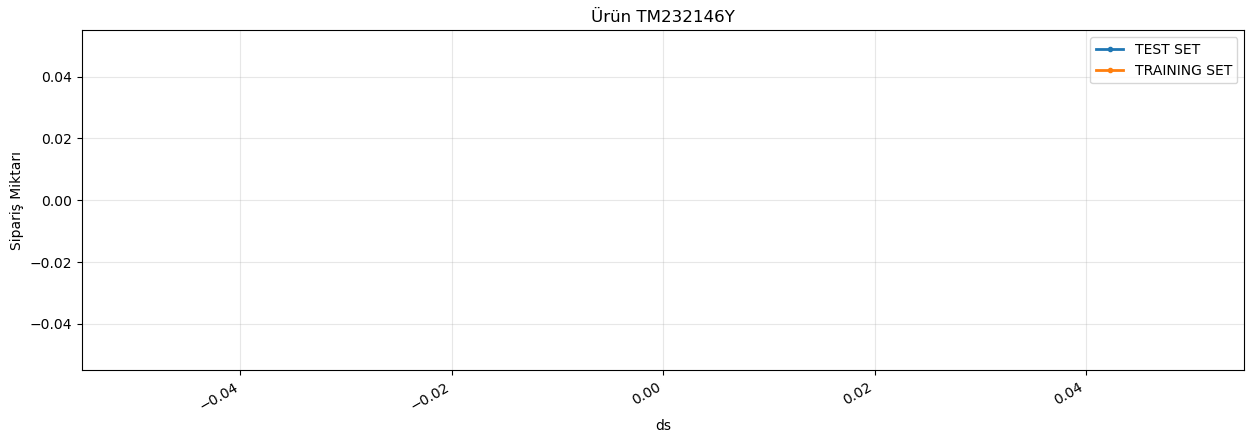

In [61]:
split_date = "2024-01-01"
train = df_monthly_yaygın_filtered.loc[df_monthly_yaygın_filtered["ds"] <= split_date].copy()
test  = df_monthly_yaygın_filtered.loc[df_monthly_yaygın_filtered["ds"] >  split_date].copy()

train["y"] = train["y"].fillna(0)
test["y"]  = test["y"].fillna(0)
ax = (
    test.set_index("ds").rename(columns={"y": "TEST SET"})
        .join(
            train.set_index("ds").rename(columns={"y": "TRAINING SET"}),
            how="outer"
        )
        .sort_index()
        .plot(figsize=(15,5), title=f"Ürün {urun_kodu}", style='.-', linewidth=2, markersize=6)
)
ax.set_ylabel("Sipariş Miktarı")
ax.grid(True, alpha=0.3)


In [174]:
df_monthly_yaygın_filtered["y"].value_counts()

y
2.000     9
7.000     9
6.000     8
3.000     7
11.000    6
5.000     6
1.000     6
4.000     5
9.000     5
0.001     5
8.000     4
12.000    3
10.000    2
16.000    2
23.000    1
14.000    1
29.000    1
22.000    1
28.000    1
27.000    1
21.000    1
Name: count, dtype: int64

In [491]:
siparis_ort = df_monthly_yaygın["y"].mean()
siparis_sapma = df_monthly_yaygın["y"].std()
siparis_sikligi = (df_monthly_yaygın["y"] > 0.001).sum()

print("Ürün Kodu:", urun_kodu)
print("Sipariş Miktarı Ort:", siparis_ort)
print("Sipariş Miktarı Sapma:", siparis_sapma)
print("Sipariş Miktarı Sıklığı:", siparis_sikligi)



Ürün Kodu: 504056152
Sipariş Miktarı Ort: 17.226190476190474
Sipariş Miktarı Sapma: 15.615370239681086
Sipariş Miktarı Sıklığı: 84


Exception: Seasonality must be added prior to model fitting.

In [495]:
from prophet import Prophet

model = Prophet(
    interval_width=0.0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="additive"
)



# Train set ile eğit
model.fit(train)



18:51:37 - cmdstanpy - INFO - Chain [1] start processing
18:51:37 - cmdstanpy - INFO - Chain [1] done processing


In [496]:
forecast = model.predict(test)
forecast["yhat"] = forecast["yhat"].clip(lower=0)
forecast["yhat_lower"] = forecast["yhat_lower"].clip(lower=0)

In [494]:
from prophet import Prophet


df_malzeme = df_yaygın_merged[df_yaygın_merged["Malzeme"] == urun_kodu][["Yaratma tarihi","Sipariş miktarı"]].copy()
df_malzeme = df_malzeme.rename(columns={"Yaratma tarihi":"ds","Sipariş miktarı":"y"})


m = Prophet(
    seasonality_mode="additive",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False
)


m.add_seasonality(name="monthly", period=30.5, fourier_order=5) 
m.add_seasonality(name="quarterly", period=90, fourier_order=5)
m.add_seasonality(name="semiannual", period=180, fourier_order=5)
m.add_seasonality(name="yearly", period=365, fourier_order=10)


m.fit(df_malzeme)


future = m.make_future_dataframe(periods=12, freq="M")
forecast = m.predict(future)


monthly_strength   = forecast["monthly"].abs().mean() / forecast["yhat"].abs().mean()
quarterly_strength = forecast["quarterly"].abs().mean() / forecast["yhat"].abs().mean()
semi_strength      = forecast["semiannual"].abs().mean() / forecast["yhat"].abs().mean()
yearly_strength    = forecast["yearly"].abs().mean() / forecast["yhat"].abs().mean()


strengths = {
    "Monthly (1M)": monthly_strength,
    "Quarterly (3M)": quarterly_strength,
    "Semiannual (6M)": semi_strength,
    "Yearly (12M)": yearly_strength
}
best_cycle = max(strengths, key=strengths.get)
best_strength = strengths[best_cycle]

ç
result = {
    "Malzeme": urun_kodu,
    "Monthly_Str": monthly_strength,
    "Quarterly_Str": quarterly_strength,
    "Semiannual_Str": semi_strength,
    "Yearly_Str": yearly_strength,
    "Best_Cycle": best_cycle,
    "Best_Strength": best_strength
}




18:51:34 - cmdstanpy - INFO - Chain [1] start processing
18:51:34 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [331]:
result

{'Malzeme': 'D1699168Y',
 'Monthly_Str': np.float64(0.14011005010036237),
 'Quarterly_Str': np.float64(0.1084508251050581),
 'Semiannual_Str': np.float64(0.175146202548413),
 'Yearly_Str': np.float64(0.2518242789206604),
 'Best_Cycle': 'Yearly (12M)',
 'Best_Strength': np.float64(0.2518242789206604)}

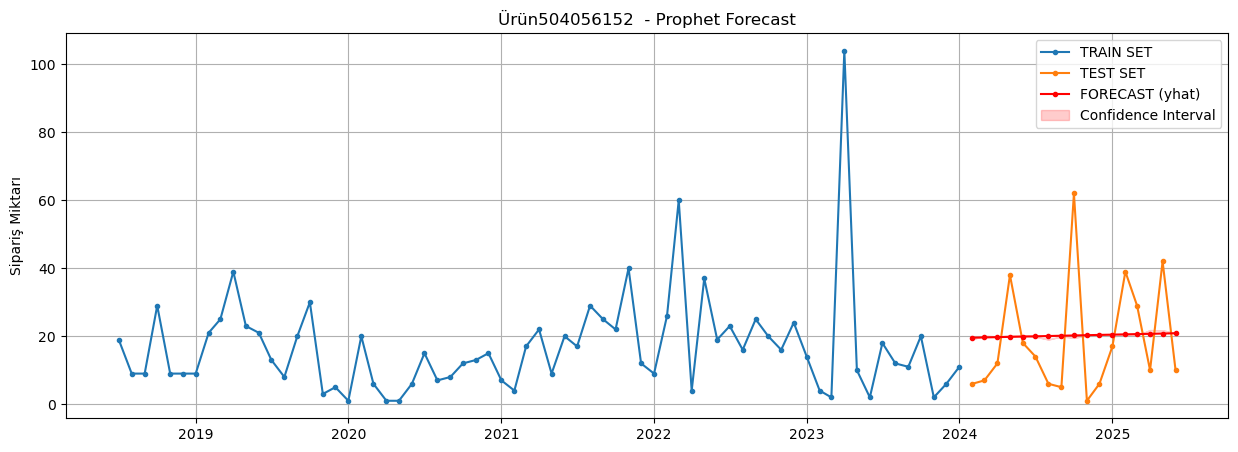

In [497]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(train["ds"], train["y"], ".-", label="TRAIN SET")
plt.plot(test["ds"], test["y"], ".-", label="TEST SET")
plt.plot(test["ds"], forecast["yhat"], "r.-", label="FORECAST (yhat)")  # tahmin
plt.fill_between(test["ds"], forecast["yhat_lower"], forecast["yhat_upper"], 
                 color="r", alpha=0.2, label="Confidence Interval")
plt.title(f"Ürün{urun_kodu}  - Prophet Forecast")
plt.ylabel("Sipariş Miktarı")
plt.legend()
plt.grid(True)
plt.show()

In [178]:
train.count()

ds    52
y     52
dtype: int64

In [179]:
test.count()

ds    17
y     17
dtype: int64

In [204]:
train

,ds,y
0,2018-07-01,51.0
1,2018-08-01,70.0
2,2018-09-01,65.0
3,2018-10-01,74.0
4,2018-11-01,55.0
5,2018-12-01,51.0
6,2019-01-01,27.0
7,2019-02-01,36.0
8,2019-03-01,33.0
9,2019-04-01,53.0


In [498]:
merged = (
    test[["ds","y"]]
    .merge(forecast[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)
merged = merged[merged["y"] > 0]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

y_true = merged["y"].astype(float).values
y_pred = merged["yhat"].astype(float).values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

def smape(a, f):
    return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

def wape(a, f):
    return np.sum(np.abs(f-a)) / np.sum(np.abs(a)) * 100

print("MAE  :", mae)
print("RMSE :", rmse)
print("MAPE :", mape)
print("SMAPE:", smape(y_true, y_pred))
print("WAPE :", wape(y_true, y_pred))


MAE  : 13.984660543770334
RMSE : 16.50505771549965
MAPE : 218.20065400832328
SMAPE: 76.47185390519982
WAPE : 73.83205877145829


In [336]:
print(m.extra_regressors.keys())
print(m.params["beta"])


odict_keys([])
[[ 9.33816e-04 -1.26613e-02  3.62888e-03  2.25566e-03 -4.85632e-03
  -2.30973e-03 -3.21023e-03 -6.02778e-03 -4.61779e-03 -1.12529e-03
   3.80682e-03  6.90496e-03 -3.99168e-04  9.16357e-04 -3.82413e-03
  -5.03676e-03 -6.31305e-03 -4.18410e-03  2.77736e-03 -1.37346e-03
  -1.38671e-02  1.20843e-02  3.80682e-03  6.90496e-03 -4.08136e-03
  -5.81004e-03 -3.99168e-04  9.16357e-04  3.84007e-03  8.15148e-03
   3.95918e-03  1.46135e-02  1.14857e-03  1.26249e-02 -4.05830e-03
  -4.91018e-03 -2.02230e-02 -1.73891e-03 -4.59670e-03  1.30580e-02
  -5.59388e-05  1.11401e-02 -2.62326e-03 -2.15545e-03 -2.33028e-03
  -8.83206e-04 -9.23273e-03  5.41518e-03 -2.63997e-03  1.25627e-03]]


In [499]:


# Aylık sapma yüzdesi (MAPE mantığı ama her gözlem için)
merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

# Sonuçları görmek için
print(merged[["ds","y","yhat","sapma_%"]])

           ds     y       yhat      sapma_%
0  2024-02-01   6.0  19.567482   226.124696
1  2024-03-01   7.0  19.645233   180.646180
2  2024-04-01  12.0  19.728346    64.402879
3  2024-05-01  38.0  19.808777   -47.871638
4  2024-06-01  18.0  19.891890    10.510502
5  2024-07-01  14.0  19.972322    42.659445
6  2024-08-01   6.0  20.055435   234.257254
7  2024-09-01   5.0  20.138548   302.770963
8  2024-10-01  62.0  20.218980   -67.388742
9  2024-11-01   1.0  20.302093  1930.209302
10 2024-12-01   6.0  20.382525   239.708748
11 2025-01-01  17.0  20.465638    20.386105
12 2025-02-01  39.0  20.548751   -47.310895
13 2025-03-01  29.0  20.623821   -28.883377
14 2025-04-01  10.0  20.706934   107.069335
15 2025-05-01  42.0  20.787365   -50.506273
16 2025-06-01  10.0  20.870478   108.704784


In [500]:
sapma = np.array([merged["sapma_%"]
])
abs_mean = np.mean(np.abs(sapma))
print("Mutlak Ortalama Sapma (%):", abs_mean)

Mutlak Ortalama Sapma (%): 218.20065400832323


### Extra Regressor(Tahminde Ekstra Değişken)

In [501]:
urun_kodu = "504056152"
urun_df = df_yaygın_merged[df_yaygın_merged["Malzeme"] == urun_kodu].copy()

df_monthly_yaygın = (
    urun_df
      .groupby(urun_df["Yaratma tarihi"].dt.to_period("M"))["Sipariş miktarı"]  
      .sum()
      .to_timestamp()       # period[M] -> ay başı Timestamp
      .reset_index()
      .rename(columns={"Yaratma tarihi": "ds", "Sipariş miktarı": "y"})  # Prophet uyumlu isimler
)

df_monthly_yaygın = (
    df_monthly_yaygın
      .set_index("ds")
      .asfreq("MS", fill_value=0.1)   # "MS" = Month Start
      .reset_index()
)


In [502]:

df_monthly_yaygın_filtered = df_monthly_yaygın[
    (df_monthly_yaygın["y"] >= 0) & (df_monthly_yaygın["y"] <= 800)
].copy()

print("Orijinal gözlem sayısı:", len(df_monthly_yaygın))
print("Filtrelenmiş gözlem sayısı:", len(df_monthly_yaygın_filtered))

Orijinal gözlem sayısı: 84
Filtrelenmiş gözlem sayısı: 84


### Tüfe

In [503]:
df_tüfe = tüfe.copy()

# Tarih
df_tüfe["ds"] = pd.to_datetime(df_tüfe["ds"], dayfirst=True, errors="coerce")


# Float'a çevir
df_tüfe["tüfe yıllık"] = pd.to_numeric(df_tüfe["tüfe yıllık"], errors="coerce")



In [504]:
df_prophet_2 = df_monthly_yaygın_filtered.merge(df_tüfe, on="ds", how="left")
df_prophet_2


,ds,y,tüfe yıllık
0,2018-07-01,19.0,15.85
1,2018-08-01,9.0,17.90
2,2018-09-01,9.0,24.52
3,2018-10-01,29.0,25.24
4,2018-11-01,9.0,21.62
...,...,...,...
79,2025-02-01,39.0,39.05
80,2025-03-01,29.0,38.10
81,2025-04-01,10.0,37.86
82,2025-05-01,42.0,35.41


In [505]:
df_prophet_2["tüfe yıllık"] = df_prophet_2["tüfe yıllık"].fillna(method="ffill")

C:\Users\Asus\AppData\Local\Temp\ipykernel_23604\4277085473.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_prophet_2["tüfe yıllık"] = df_prophet_2["tüfe yıllık"].fillna(method="ffill")


### Holiday(kampanya)

In [362]:
otob_kampanya["Malzeme"].value_counts()

Malzeme
QC000001        69
ML242294Y       64
TM181148        62
ML242294        61
0821 302 080    60
                ..
NK550197Y        1
NK550196Y        1
NK550130Y        1
NK316108Y        1
NK275110Y        1
Name: count, Length: 4783, dtype: int64

In [66]:
kampanya_dict = {}

for urun_kodu in urun_listesi:
    # 1) İlgili ürünün kampanya kayıtlarını al
    kampanya_urun = otob_kampanya[otob_kampanya["Malzeme"] == urun_kodu].copy()

    if kampanya_urun.empty:
        print(f"{urun_kodu} → kampanya bulunamadı")
        kampanya_dict[urun_kodu] = pd.DataFrame(columns=["ds", "kampanya"])
        continue

    # 2) Başlangıç tarihini ayın ilk gününe çek
    kampanya_urun["ds"] = pd.to_datetime(kampanya_urun["Bşl.tarihi"]).dt.to_period("M").dt.to_timestamp()

    # 3) Tekilleştir ve flag ekle
    kampanya_df = kampanya_urun[["ds"]].drop_duplicates().copy()
    kampanya_df["kampanya"] = 1

    # 4) Sözlüğe kaydet
    kampanya_dict[urun_kodu] = kampanya_df
    print(f"{urun_kodu} → {len(kampanya_df)} kampanya ayı bulundu")


NameError: name 'urun_listesi' is not defined

In [506]:

kampanya_urun = otob_kampanya[otob_kampanya["Malzeme"] == urun_kodu].copy()
kampanya_urun


,Müşteri,KşTü,Koşul türü,Unnamed: 3,Unnamed: 4,Malzeme,Malzeme.1,Tutar,Birim,Brm.,ÖB,Bşl.tarihi,Gçrl.sonu,Müşteri adı


In [454]:
kampanya_urun["ds"] = (
    pd.to_datetime(kampanya_urun["Bşl.tarihi"])
    .dt.to_period("M")
    .dt.to_timestamp()
)


kampanya_df = kampanya_urun[["ds"]].drop_duplicates().copy()
kampanya_df["kampanya"] = 1

df_prophet_2 = df_prophet_2.merge(kampanya_df, on="ds", how="left")
df_prophet_2["kampanya"] = df_prophet_2["kampanya"].fillna(0).astype(int)




In [406]:
df_prophet_2["kampanya"].value_counts()

kampanya
0    61
1    23
Name: count, dtype: int64

### Dolar 

In [508]:
df_fin = dolar.copy()

# Tarih
df_fin["ds"] = pd.to_datetime(df_fin["Tarih"], dayfirst=True, errors="coerce")

# "Şimdi" kolonunu stringe çevir → virgül ve noktaları düzelt
df_fin["simdi"] = (
    df_fin["Şimdi"]
    .astype(str)
    .str.replace(".", "", regex=False)   # binlik ayırıcı noktaları sil
    .str.replace(",", ".", regex=False)  # ondalık virgülü noktaya çevir
)

# Float'a çevir
df_fin["simdi"] = pd.to_numeric(df_fin["simdi"], errors="coerce")

# Sadece gerekli kolonlar
df_fin = df_fin[["ds", "simdi"]]
df_fin

,ds,simdi
0,2025-08-25,40.9970
1,2025-08-24,40.9597
2,2025-08-22,40.9357
3,2025-08-21,40.9340
4,2025-08-20,40.9277
...,...,...
1975,2018-01-31,3.7543
1976,2018-01-30,3.7800
1977,2018-01-29,3.7924
1978,2018-01-26,3.7520


In [509]:
df_prophet_2["ds"] = pd.to_datetime(df_prophet_2["ds"])
df_fin["ds"] = pd.to_datetime(df_fin["ds"])


df_fin["ds"] = df_fin["ds"].dt.to_period("M").dt.to_timestamp()


df_fin = df_fin.groupby("ds", as_index=False).mean()


df_prophet_2 = df_prophet_2.merge(df_fin, on="ds", how="left")


In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
split_date = "2024-01-01"


train = df_prophet_2[df_prophet_2["ds"] <= split_date].copy()
test  = df_prophet_2[df_prophet_2["ds"] >  split_date].copy()




print(train.tail(), "\n\n", test.head())


           ds     y  tüfe yıllık      simdi
62 2023-09-01  11.0        61.53  26.954248
63 2023-10-01  20.0        61.36  27.849973
64 2023-11-01   2.0        61.98  28.620441
65 2023-12-01   6.0        64.77  29.060114
66 2024-01-01  11.0        64.86  30.035504 

            ds     y  tüfe yıllık      simdi
67 2024-02-01   6.0        67.07  30.750438
68 2024-03-01   7.0        68.50  32.002076
69 2024-04-01  12.0        69.80  32.299227
70 2024-05-01  38.0        75.45  32.226878
71 2024-06-01  18.0        71.60  32.542965


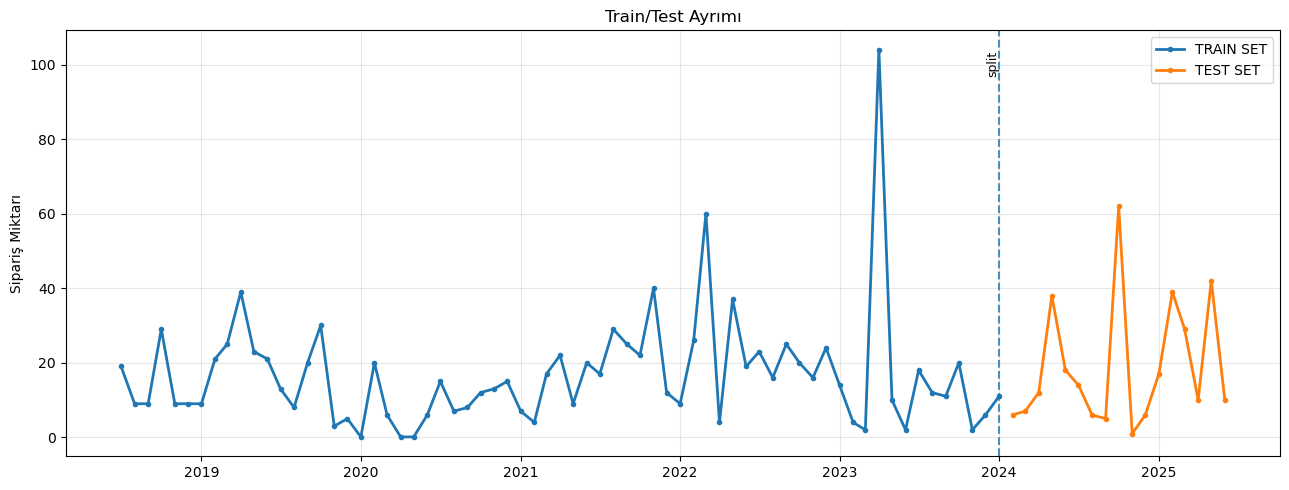

In [511]:
import pandas as pd
import matplotlib.pyplot as plt


train = train.copy().sort_values("ds")
test  = test.copy().sort_values("ds")
train["ds"] = pd.to_datetime(train["ds"])
test["ds"]  = pd.to_datetime(test["ds"])

plt.figure(figsize=(13,5))


plt.plot(train["ds"], train["y"], ".-", linewidth=2, markersize=6, label="TRAIN SET")


plt.plot(test["ds"],  test["y"],  ".-", linewidth=2, markersize=6, label="TEST SET")


split_dt = pd.to_datetime(split_date)
plt.axvline(x=split_dt, linestyle="--", linewidth=1.5, alpha=0.8)
plt.text(split_dt, plt.ylim()[1]*0.95, "split", rotation=90, va="top", ha="right", fontsize=9)

plt.title("Train/Test Ayrımı")
plt.ylabel("Sipariş Miktarı")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [322]:
test_ort = test["y"].mean()

print("Ürün Kodu:", urun_kodu)
print("Sipariş Miktarı Ort:", test_ort)



Ürün Kodu: NK253111Y
Sipariş Miktarı Ort: 7.933333333333334


In [371]:
test.count()

ds             17
y              17
tüfe yıllık    17
kampanya       17
simdi          17
dtype: int64

In [372]:
train

,ds,y,tüfe yıllık,kampanya,simdi
0,2018-07-01,65.0,15.85,1,4.774873
1,2018-08-01,141.0,17.90,1,5.921517
2,2018-09-01,134.0,24.52,0,6.305245
3,2018-10-01,53.0,25.24,1,5.806583
4,2018-11-01,90.0,21.62,0,5.345095
...,...,...,...,...,...
62,2023-09-01,40.0,61.53,0,26.954248
63,2023-10-01,4.0,61.36,0,27.849973
64,2023-11-01,7.0,61.98,0,28.620441
65,2023-12-01,66.0,64.77,1,29.060114


In [380]:
merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)


print(merged[["ds","y","yhat","sapma_%"]])


           ds      y       yhat      sapma_%
0  2024-02-01   20.0  49.529142   147.645708
1  2024-03-01   15.0  41.200311   174.668737
2  2024-04-01   35.0   0.000000  -100.000000
3  2024-05-01  100.0   5.900647   -94.099353
4  2024-06-01   15.0  17.993598    19.957322
5  2024-07-01   60.0   7.013209   -88.311318
6  2024-08-01   29.0  36.603335    26.218398
7  2024-09-01   20.0  17.677009   -11.614955
8  2024-10-01   79.0   7.452572   -90.566365
9  2024-11-01    0.1   8.678514  8578.514219
10 2024-12-01   60.0   0.000000  -100.000000
11 2025-01-01    5.0   0.000000  -100.000000
12 2025-02-01  168.0   1.466815   -99.126896
13 2025-03-01   25.0  13.360078   -46.559688
14 2025-04-01   11.0   0.000000  -100.000000
15 2025-05-01   15.0   0.000000  -100.000000
16 2025-06-01   12.0   0.000000  -100.000000


In [391]:
merged

,ds,y,yhat
0,2024-02-01,20.0,49.529142
1,2024-03-01,15.0,41.200311
2,2024-04-01,35.0,0.000000
3,2024-05-01,100.0,5.900647
4,2024-06-01,15.0,17.993598
5,2024-07-01,60.0,7.013209
6,2024-08-01,29.0,36.603335
7,2024-09-01,20.0,17.677009
8,2024-10-01,79.0,7.452572
10,2024-12-01,60.0,0.000000


In [392]:
test

,ds,y,tüfe yıllık,kampanya,simdi
67,2024-02-01,20.0,67.07,0,30.750438
68,2024-03-01,15.0,68.50,0,32.002076
69,2024-04-01,35.0,69.80,0,32.299227
70,2024-05-01,100.0,75.45,0,32.226878
71,2024-06-01,15.0,71.60,0,32.542965
72,2024-07-01,60.0,61.78,0,32.863609
73,2024-08-01,29.0,51.97,0,33.654159
74,2024-09-01,20.0,49.38,0,34.026419
75,2024-10-01,79.0,48.58,1,34.199817
76,2024-11-01,0.1,47.09,0,34.419686


In [429]:
y_true

array([2.00e+01, 1.50e+01, 3.50e+01, 1.00e+02, 1.50e+01, 6.00e+01,
       2.90e+01, 2.00e+01, 7.90e+01, 1.00e-01, 6.00e+01, 5.00e+00,
       1.68e+02, 2.50e+01, 1.10e+01, 1.50e+01, 1.20e+01])

In [437]:
merged

,ds,y,yhat,sapma_%
0,2024-02-01,20.0,46.954092,134.770461
1,2024-03-01,15.0,54.892622,265.950815
2,2024-04-01,35.0,0.000000,-100.000000
3,2024-05-01,100.0,0.000000,-100.000000
4,2024-06-01,15.0,16.528996,10.193304
5,2024-07-01,60.0,0.000000,-100.000000
6,2024-08-01,29.0,40.557186,39.852365
7,2024-09-01,20.0,14.963014,-25.184931
8,2024-10-01,79.0,0.000000,-100.000000
9,2024-11-01,0.1,9.426315,9326.314676


In [479]:
test

,ds,y,tüfe yıllık,kampanya,simdi
67,2024-02-01,20.0,67.07,0,30.750438
68,2024-03-01,15.0,68.50,0,32.002076
69,2024-04-01,35.0,69.80,0,32.299227
70,2024-05-01,100.0,75.45,0,32.226878
71,2024-06-01,15.0,71.60,0,32.542965
72,2024-07-01,60.0,61.78,0,32.863609
73,2024-08-01,29.0,51.97,0,33.654159
74,2024-09-01,20.0,49.38,0,34.026419
75,2024-10-01,79.0,48.58,1,34.199817
76,2024-11-01,0.1,47.09,0,34.419686


In [481]:
merged

,ds,y,yhat
0,2024-02-01,20.0,46.954092
1,2024-03-01,15.0,54.892622
2,2024-04-01,35.0,0.000000
3,2024-05-01,100.0,0.000000
4,2024-06-01,15.0,16.528996
5,2024-07-01,60.0,0.000000
6,2024-08-01,29.0,40.557186
7,2024-09-01,20.0,14.963014
8,2024-10-01,79.0,0.000000
9,2024-11-01,0.1,9.426315


In [512]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
import pandas as pd

# Ölçüm fonksiyonları
def smape(a, f):
    return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

def wape(a, f):
    return np.sum(np.abs(f-a)) / np.sum(np.abs(a)) * 100

# Prophet + hata hesaplama fonksiyonu
def run_prophet(urun_kodu, regressors, train, test, df_prophet_2):
    m = Prophet(
        interval_width=0.0,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive"
    )

    for r in regressors:
        m.add_regressor(r)

    train_cols = ["ds","y"] + regressors
    m.fit(train[train_cols])

    future_test = test[["ds"]].merge(
        df_prophet_2[["ds"] + regressors], on="ds", how="left"
    )

    forecast_test = m.predict(future_test)[["ds","yhat"]]
    forecast_test["yhat"] = forecast_test["yhat"].clip(lower=0)

    merged = (
        test[["ds","y"]]
        .merge(forecast_test, on="ds", how="inner")
        .dropna(subset=["y","yhat"])
    )
    merged = merged[merged["y"] > 0]
    merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

    y_true = merged["y"].astype(float).values
    y_pred = merged["yhat"].astype(float).values

    metrics = {
        "Malzeme": urun_kodu,
        "Senaryo": "+".join(regressors) if regressors else "Yalnızca Temel",
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred) * 100,
        "SMAPE": smape(y_true, y_pred),
        "WAPE": wape(y_true, y_pred),
    }

    return metrics, merged

# Senaryolar
regressor_sets = [
    ["simdi"],
    ["tüfe yıllık"],
    ["simdi","tüfe yıllık"],
    ["kampanya"],
    ["simdi","kampanya"],
    ["tüfe yıllık","kampanya"],
    ["simdi","tüfe yıllık","kampanya"]
]



results = []
for regs in regressor_sets:
    res = run_prophet(urun_kodu, regs, train, test, df_prophet_2)
    results.append(res)

df_results = pd.DataFrame(results)

# Excel'e kaydet
df_results.to_excel("degerlendirme_sonuclari.xlsx", index=False)

print(df_results)






18:54:41 - cmdstanpy - INFO - Chain [1] start processing
18:54:41 - cmdstanpy - INFO - Chain [1] done processing
18:54:41 - cmdstanpy - INFO - Chain [1] start processing
18:54:41 - cmdstanpy - INFO - Chain [1] done processing
18:54:41 - cmdstanpy - INFO - Chain [1] start processing
18:54:41 - cmdstanpy - INFO - Chain [1] done processing


KeyError: "['kampanya'] not in index"

In [240]:
from prophet import Prophet

### sadece dolar
m = Prophet(yearly_seasonality=False, seasonality_mode="additive")
m.add_regressor("simdi")


m.seasonalities.clear()


train_cols = ["ds","y","simdi"]
m.fit(train[train_cols])


future_test = test[["ds"]].merge(
    df_prophet_2[["ds","simdi"]], 
    on="ds", how="left"
)


forecast_test = m.predict(future_test)[["ds","yhat","yhat_lower","yhat_upper"]]


forecast_test[["yhat","yhat_lower","yhat_upper"]] = (
    forecast_test[["yhat","yhat_lower","yhat_upper"]].clip(lower=0)
)

print(forecast_test.head(17))



12:12:59 - cmdstanpy - INFO - Chain [1] start processing
12:12:59 - cmdstanpy - INFO - Chain [1] done processing


           ds       yhat  yhat_lower  yhat_upper
0  2024-02-01  22.036547   13.747504   29.986398
1  2024-03-01  23.708135   15.281186   31.690941
2  2024-04-01  23.574231   15.519599   32.209295
3  2024-05-01  22.780436   14.458839   30.632925
4  2024-06-01  22.681478   14.272544   30.742573
5  2024-07-01  22.612938   14.459172   30.637056
6  2024-08-01  23.389586   15.547376   31.523472
7  2024-09-01  23.394292   14.988044   31.862621
8  2024-10-01  23.054016   15.043487   31.174292
9  2024-11-01  22.777490   14.244425   30.880003
10 2024-12-01  23.121156   14.623945   31.270425
11 2025-01-01  23.427984   15.144120   31.764913
12 2025-02-01  23.991727   15.741417   32.243330
13 2025-03-01  24.976793   17.103789   34.138505
14 2025-04-01  26.213083   18.641366   35.233269
15 2025-05-01  26.886893   18.130931   35.380139
16 2025-06-01  27.400212   19.412954   35.843490


In [471]:
merged

,ds,y,yhat
0,2024-02-01,20.0,46.954092
1,2024-03-01,15.0,54.892622
2,2024-04-01,35.0,0.000000
3,2024-05-01,100.0,0.000000
4,2024-06-01,15.0,16.528996
5,2024-07-01,60.0,0.000000
6,2024-08-01,29.0,40.557186
7,2024-09-01,20.0,14.963014
8,2024-10-01,79.0,0.000000
9,2024-11-01,0.1,9.426315


In [470]:
test

,ds,y,tüfe yıllık,kampanya,simdi
67,2024-02-01,20.0,67.07,0,30.750438
68,2024-03-01,15.0,68.50,0,32.002076
69,2024-04-01,35.0,69.80,0,32.299227
70,2024-05-01,100.0,75.45,0,32.226878
71,2024-06-01,15.0,71.60,0,32.542965
72,2024-07-01,60.0,61.78,0,32.863609
73,2024-08-01,29.0,51.97,0,33.654159
74,2024-09-01,20.0,49.38,0,34.026419
75,2024-10-01,79.0,48.58,1,34.199817
76,2024-11-01,0.1,47.09,0,34.419686


In [243]:

merged = (
    test[["ds","y"]]
    .merge(forecast_test[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)



from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

y_true = merged["y"].astype(float).values
y_pred = merged["yhat"].astype(float).values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

def smape(a, f):
    return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

print("MAE :", mae)
print("yüzde MAE :", mae/test["y"].mean())
print("RMSE:", rmse)
print("MAPE:", mape)
print("SMAPE:", smape(y_true, y_pred))


MAE : 13.472176297751448
yüzde MAE : 1.2939378365072012
RMSE: 15.316522896273169
MAPE: 288.987441925818
SMAPE: 86.99400268415981


In [383]:
# Aylık sapma yüzdesi (MAPE mantığı ama her gözlem için)
merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

# Sonuçları görmek için
print(merged[["ds","y","yhat","sapma_%"]])

           ds      y       yhat      sapma_%
0  2024-02-01   20.0  49.529142   147.645708
1  2024-03-01   15.0  41.200311   174.668737
2  2024-04-01   35.0   0.000000  -100.000000
3  2024-05-01  100.0   5.900647   -94.099353
4  2024-06-01   15.0  17.993598    19.957322
5  2024-07-01   60.0   7.013209   -88.311318
6  2024-08-01   29.0  36.603335    26.218398
7  2024-09-01   20.0  17.677009   -11.614955
8  2024-10-01   79.0   7.452572   -90.566365
9  2024-11-01    0.1   8.678514  8578.514219
10 2024-12-01   60.0   0.000000  -100.000000
11 2025-01-01    5.0   0.000000  -100.000000
12 2025-02-01  168.0   1.466815   -99.126896
13 2025-03-01   25.0  13.360078   -46.559688
14 2025-04-01   11.0   0.000000  -100.000000
15 2025-05-01   15.0   0.000000  -100.000000
16 2025-06-01   12.0   0.000000  -100.000000


In [459]:
###tüfe +kampanya
m = Prophet(yearly_seasonality=True, seasonality_mode="additive")



m.add_regressor("tüfe yıllık")
m.add_regressor("kampanya")



train_cols = ["ds","y","kampanya","tüfe yıllık"]
m.fit(train[train_cols])



future_test = test[["ds"]].merge(df_prophet_2[["ds","tüfe yıllık","kampanya"]], on="ds", how="left")


forecast_test = m.predict(future_test)[["ds","yhat","yhat_lower","yhat_upper"]]


forecast_test[["yhat","yhat_lower","yhat_upper"]] = (
    forecast_test[["yhat","yhat_lower","yhat_upper"]].clip(lower=0)
)

18:43:27 - cmdstanpy - INFO - Chain [1] start processing
18:43:27 - cmdstanpy - INFO - Chain [1] done processing


In [420]:
print(test["y"].dtype)


float64


In [467]:

merged = (
    test[["ds","y"]]
    .merge(forecast_test[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)

merged=merged[merged["y"]>0]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

y_true = merged["y"].astype(float).values
y_pred = merged["yhat"].astype(float).values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

def smape(a, f):
    return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

print("MAE :", mae)
print("yüzde MAE :", mae/test["y"].mean())
print("RMSE:", rmse)
print("MAPE:", mape)
print("SMAPE:", smape(y_true, y_pred))

MAE : 39.07624686488356
yüzde MAE : 0.992820500228696
RMSE: 57.699119240906
MAPE: 641.3097971365613
SMAPE: 156.60077824846664


In [460]:
###tüfe 
m = Prophet(yearly_seasonality=True, seasonality_mode="additive")



m.add_regressor("tüfe yıllık")




train_cols = ["ds","y","tüfe yıllık"]
m.fit(train[train_cols])


future_test = test[["ds"]].merge(df_prophet_2[["ds","tüfe yıllık"]], on="ds", how="left")


forecast_test = m.predict(future_test)[["ds","yhat","yhat_lower","yhat_upper"]]


forecast_test[["yhat","yhat_lower","yhat_upper"]] = (
    forecast_test[["yhat","yhat_lower","yhat_upper"]].clip(lower=0))

18:43:44 - cmdstanpy - INFO - Chain [1] start processing
18:43:45 - cmdstanpy - INFO - Chain [1] done processing


In [167]:
from prophet import Prophet

### sadece dolar + kampanya
m_dolar_kampanya = Prophet(interval_width=0.0,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive")


m_dolar_kampanya.add_regressor("simdi")
m_dolar_kampanya.add_regressor("kampanya")




train_cols_dolar_kampanya = ["ds","y","simdi","kampanya"]
m_dolar_kampanya.fit(train[train_cols_dolar_kampanya])


future_test_dolar_kampanya = test[["ds"]].merge(
    df_prophet_2[["ds","simdi","kampanya"]],
    on="ds", how="left"
)


forecast_test = m_dolar_kampanya.predict(future_test_dolar_kampanya)[["ds","yhat","yhat_lower","yhat_upper"]]


forecast_test[["yhat","yhat_lower","yhat_upper"]] = (
    forecast_test[["yhat","yhat_lower","yhat_upper"]].clip(lower=0)
)

print(forecast_test.head())

11:57:42 - cmdstanpy - INFO - Chain [1] start processing
11:57:42 - cmdstanpy - INFO - Chain [1] done processing


          ds       yhat  yhat_lower  yhat_upper
0 2024-02-01  33.468461   33.158311   33.158311
1 2024-03-01  35.165856   35.639893   35.639893
2 2024-04-01  34.849955   34.474980   34.474980
3 2024-05-01  33.807559   33.249736   33.249736
4 2024-06-01  33.530416   33.439004   33.439004


In [417]:

merged = (
    test[["ds","y"]]
    .merge(forecast_test[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)

merged=merged[merged["y"]>0]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

y_true = merged["y"].astype(float).values
y_pred = merged["yhat"].astype(float).values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

def smape(a, f):
    return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

print("MAE :", mae)
print("yüzde MAE :", mae/test["y"].mean())
print("RMSE:", rmse)
print("MAPE:", mape)
print("SMAPE:", smape(y_true, y_pred))


MAE : 39.07624686488356
yüzde MAE : 0.992820500228696
RMSE: 57.699119240906
MAPE: 641.3097971365613
SMAPE: 156.60077824846664


In [418]:
merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)


print(merged[["ds","y","yhat","sapma_%"]])

           ds      y       yhat      sapma_%
0  2024-02-01   20.0  46.954092   134.770461
1  2024-03-01   15.0  54.892622   265.950815
2  2024-04-01   35.0   0.000000  -100.000000
3  2024-05-01  100.0   0.000000  -100.000000
4  2024-06-01   15.0  16.528996    10.193304
5  2024-07-01   60.0   0.000000  -100.000000
6  2024-08-01   29.0  40.557186    39.852365
7  2024-09-01   20.0  14.963014   -25.184931
8  2024-10-01   79.0   0.000000  -100.000000
9  2024-11-01    0.1   9.426315  9326.314676
10 2024-12-01   60.0   0.000000  -100.000000
11 2025-01-01    5.0   0.000000  -100.000000
12 2025-02-01  168.0   0.000000  -100.000000
13 2025-03-01   25.0   0.000000  -100.000000
14 2025-04-01   11.0   0.000000  -100.000000
15 2025-05-01   15.0   0.000000  -100.000000
16 2025-06-01   12.0   0.000000  -100.000000


In [140]:
import pandas as pd


df_results = pd.DataFrame(results)
df_results = df_results[["MAE","RMSE","MAPE","SMAPE","WAPE"]]


with pd.ExcelWriter("degerlendirme.xlsx", engine="xlsxwriter") as writer:
    df_results.to_excel(writer, sheet_name="Sonuçlar", index=False, startrow=2)

    # Workbook ve worksheet al
    workbook  = writer.book
    worksheet = writer.sheets["Sonuçlar"]

    # Başlık ekle (merge)
    worksheet.merge_range("A1:E1", "DEĞERLENDİRME", 
                          workbook.add_format({"bold": True, "align": "center", "valign": "vcenter", "fg_color": "#FF0000", "font_color":"#FFFFFF"}))

    # Sütun başlıklarına renk
    header_formats = {
        "MAE":   workbook.add_format({"bg_color": "#FF6666", "align": "center", "bold": True}),
        "RMSE":  workbook.add_format({"bg_color": "#FFFF66", "align": "center", "bold": True}),
        "MAPE":  workbook.add_format({"bg_color": "#6666FF", "align": "center", "bold": True, "font_color":"#FFFFFF"}),
        "SMAPE": workbook.add_format({"bg_color": "#66FF66", "align": "center", "bold": True}),
        "WAPE":  workbook.add_format({"bg_color": "#66FF99", "align": "center", "bold": True}),
    }

    for col_num, col_name in enumerate(df_results.columns):
        worksheet.write(2, col_num, col_name, header_formats[col_name])

    # Hücre genişliklerini ayarla
    worksheet.set_column("A:E", 12)


In [143]:
test.count()

ds             17
y              17
tüfe yıllık    17
kampanya       17
simdi          17
dtype: int64

In [218]:

m = Prophet(yearly_seasonality=True, seasonality_mode="additive")

m.add_regressor("simdi")
m.add_regressor("tüfe yıllık")
m.add_regressor("kampanya")



train_cols = ["ds","y","simdi","tüfe yıllık","kampanya"]
m.fit(train[train_cols])


future_test = test[["ds"]].merge(df_prophet_2[["ds","simdi","tüfe yıllık","kampanya"]], on="ds", how="left")



forecast_test = m.predict(future_test)[["ds","yhat","yhat_lower","yhat_upper"]]

forecast_test[["yhat","yhat_lower","yhat_upper"]] = (
    forecast_test[["yhat","yhat_lower","yhat_upper"]].clip(lower=0)
)


04:33:24 - cmdstanpy - INFO - Chain [1] start processing
04:33:24 - cmdstanpy - INFO - Chain [1] done processing


In [235]:
### hepsi birden
m = Prophet(yearly_seasonality=True, seasonality_mode="additive")


m.add_regressor("simdi")
m.add_regressor("tüfe yıllık")
m.add_regressor("kampanya")



train_cols = ["ds","y","simdi","tüfe yıllık","kampanya"]
m.fit(train[train_cols])



future_test = test[["ds"]].merge(df_prophet_2[["ds","simdi","tüfe yıllık","kampanya"]], on="ds", how="left")


forecast_test_2 = m.predict(future_test)[["ds","yhat","yhat_lower","yhat_upper"]]


forecast_test[["yhat","yhat_lower","yhat_upper"]] = (
    forecast_test[["yhat","yhat_lower","yhat_upper"]].clip(lower=0)
)

04:33:45 - cmdstanpy - INFO - Chain [1] start processing
04:33:45 - cmdstanpy - INFO - Chain [1] done processing


In [416]:

merged = (
    test[["ds","y"]]
    .merge(forecast_test_2[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)



from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

y_true = merged["y"].astype(float).values
y_pred = merged["yhat"].astype(float).values

mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

def smape(a, f):
    return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

print("MAE :", mae)
print("yüzde MAE :", mae/test["y"].mean())
print("RMSE:", rmse)
print("MAPE:", mape)
print("SMAPE:", smape(y_true, y_pred))



NameError: name 'forecast_test_2' is not defined

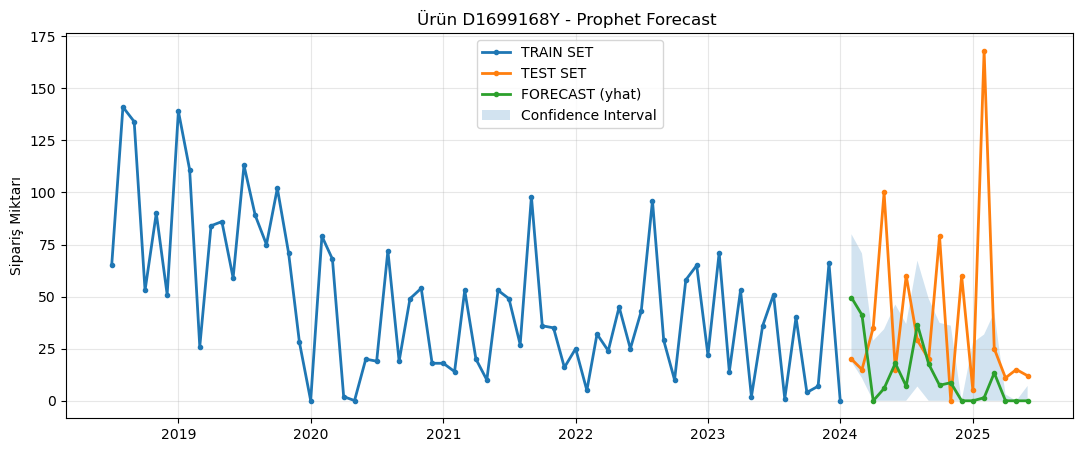

In [378]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))


plt.plot(train["ds"], train["y"], ".-", linewidth=2, markersize=6, label="TRAIN SET")


plt.plot(test["ds"], test["y"], ".-", linewidth=2, markersize=6, label="TEST SET")


plt.plot(forecast_test["ds"], forecast_test["yhat"], ".-", linewidth=2, markersize=6, label="FORECAST (yhat)")

# Confidence Interval
plt.fill_between(
    forecast_test["ds"],
    forecast_test["yhat_lower"],
    forecast_test["yhat_upper"],
    alpha=0.2, label="Confidence Interval"
)

plt.title(f"Ürün {urun_kodu} - Prophet Forecast ")
plt.ylabel("Sipariş Miktarı")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



### Her Ayın Bireysel Sapması

In [30]:
tufe yıllık

SyntaxError: invalid syntax (4003592702.py, line 1)

In [56]:

merged = (
    test[["ds","y"]]
    .merge(forecast_test[["ds","yhat"]], on="ds", how="inner")
    .dropna(subset=["y","yhat"])
)

# Aylık sapma yüzdesi (MAPE mantığı ama her gözlem için)
merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

# Sonuçları görmek için
print(merged[["ds","y","yhat","sapma_%"]])


           ds      y        yhat    sapma_%
0  2024-02-01  247.0  289.784505  17.321662
1  2024-03-01  260.0  313.664435  20.640167
2  2024-04-01  490.0  221.051929 -54.887361
3  2024-05-01  375.0  289.219366 -22.874836
4  2024-06-01  390.0  302.540848 -22.425423
5  2024-07-01  307.0  330.562715   7.675152
6  2024-08-01  330.0  250.657941 -24.043048
7  2024-09-01  584.0  256.080115 -56.150665
8  2024-10-01  267.0  247.252857  -7.395934
9  2024-11-01  220.0  277.661832  26.209924
10 2024-12-01  368.0  405.176531  10.102318
11 2025-01-01  334.0  230.809725 -30.895292
12 2025-02-01  408.0  296.272550 -27.384179
13 2025-03-01  203.0  277.034457  36.470176
14 2025-04-01  362.0  303.537397 -16.149890
15 2025-05-01  341.0  338.757554  -0.657609
16 2025-06-01  433.0  341.275822 -21.183413


# Birden fazla malzeme

### Hiper parametreler
büyüme lineer ya da logistic olabilir,lineer  düz artan büyümeyken logistic doygunluk noktasına sahip bir büyüme tarzıü
trend etkisi çok düşük growth, changepoint_prior_scale, n_changepoints, changepoint_range, changepoints ile oynama çok bir şey ifade etmiyor


In [86]:
def trend_strength_top20(df):
    results = []
    top20 = df["Malzeme"].value_counts().index[0:1000]

    for urun in top20:
        df_malz = df[df["Malzeme"] == urun][["Yaratma tarihi", "Sipariş miktarı"]].copy()
        df_malz = df_malz.rename(columns={"Yaratma tarihi":"ds","Sipariş miktarı":"y"})
        df_malz["ds"] = pd.to_datetime(df_malz["ds"])

        if len(df_malz) < 10:
            continue

        m = Prophet(yearly_seasonality=False,
                    weekly_seasonality=False,
                    daily_seasonality=False)
        m.fit(df_malz)

        forecast = m.predict(df_malz[["ds"]])

        # Gerçek & trendi ds üzerinden birleştir
        merged = df_malz.merge(forecast[["ds","trend"]], on="ds", how="left")

        y = merged["y"].values
        trend = merged["trend"].values
        resid = y - trend

        # Trend gücü (0–1 arası)
        strength = 1 - np.var(resid) / np.var(y)

        results.append({"Malzeme": urun, "Trend Gücü": strength})

    return pd.DataFrame(results).sort_values("Trend Gücü", ascending=False).reset_index(drop=True)


In [87]:
trend_df = trend_strength_top20(df)

00:31:48 - cmdstanpy - INFO - Chain [1] start processing
00:31:48 - cmdstanpy - INFO - Chain [1] done processing
00:31:48 - cmdstanpy - INFO - Chain [1] start processing
00:31:48 - cmdstanpy - INFO - Chain [1] done processing
00:31:49 - cmdstanpy - INFO - Chain [1] start processing
00:31:49 - cmdstanpy - INFO - Chain [1] done processing
00:31:49 - cmdstanpy - INFO - Chain [1] start processing
00:31:49 - cmdstanpy - INFO - Chain [1] done processing
00:31:50 - cmdstanpy - INFO - Chain [1] start processing
00:31:50 - cmdstanpy - INFO - Chain [1] done processing
00:31:50 - cmdstanpy - INFO - Chain [1] start processing
00:31:50 - cmdstanpy - INFO - Chain [1] done processing
00:31:50 - cmdstanpy - INFO - Chain [1] start processing
00:31:50 - cmdstanpy - INFO - Chain [1] done processing
00:31:51 - cmdstanpy - INFO - Chain [1] start processing
00:31:51 - cmdstanpy - INFO - Chain [1] done processing
00:31:51 - cmdstanpy - INFO - Chain [1] start processing
00:31:51 - cmdstanpy - INFO - Chain [1]

In [91]:
trend_df.sort_values(by="Trend Gücü",ascending=False).iloc[0:20]

,Malzeme,Trend Gücü
0,MK403591Y,0.457113
1,MF453093Y,0.387927
2,MC398917Y,0.356936
3,0501-221-397Y,0.349457
4,499518500,0.331922
5,1669789Y,0.282810
6,D1243070,0.274371
7,BKM-PRSTJ-E6-STD2,0.248719
8,LF16015VEY,0.245093
9,HD114114Y,0.242987


In [38]:
df["Yaratma tarihi"] = pd.to_datetime(df["Yaratma tarihi"])


In [67]:
#lineer
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

def prophet_with_regressors(urun_kodu, 
                            df, 
                            tüfe, 
                            otob_kampanya, 
                            dolar,
                            servis,
                            dolar_col="Şimdi"):   

    urun_df = df[df["Malzeme"] == urun_kodu].copy()
    df_monthly = (
        urun_df.groupby(urun_df["Yaratma tarihi"].dt.to_period("M"))["Sipariş miktarı"]
        .sum()
        .to_timestamp()
        .reset_index()
        .rename(columns={"Yaratma tarihi":"ds", "Sipariş miktarı":"y"})
    )

    df_monthly = (
        df_monthly.set_index("ds")
        .asfreq("MS", fill_value=1) 
        .reset_index()
    )

    # -----------------------------
    # 2) TÜFE 
    df_tufe_ = tüfe.copy()
    df_tufe_["ds"] = pd.to_datetime(df_tufe_["ds"], dayfirst=True, errors="coerce")
    df_tufe_["tüfe yıllık"] = pd.to_numeric(df_tufe_["tüfe yıllık"], errors="coerce")
    df_prophet = df_monthly.merge(df_tufe_[["ds","tüfe yıllık"]], on="ds", how="left")
    df_prophet["tüfe yıllık"] = df_prophet["tüfe yıllık"].ffill()

    # -----------------------------
    # 3) Kampanya 
    kampanya_urun = otob_kampanya[otob_kampanya["Malzeme"] == urun_kodu].copy()
    kampanya_urun["ds"] = pd.to_datetime(kampanya_urun["Bşl.tarihi"]).dt.to_period("M").dt.to_timestamp()
    kampanya_df = kampanya_urun[["ds"]].drop_duplicates().copy()
    kampanya_df["kampanya"] = 1
    df_prophet = df_prophet.merge(kampanya_df, on="ds", how="left")
    df_prophet["kampanya"] = df_prophet["kampanya"].fillna(0).astype(int)

    # -----------------------------
    # 4) Dolar
    df_fin = dolar.copy()
    df_fin["ds"] = pd.to_datetime(df_fin["Tarih"], dayfirst=True, errors="coerce")

    if dolar_col not in df_fin.columns:
        raise KeyError(f"Dolar dataframe içinde '{dolar_col}' kolonu yok. Mevcut kolonlar: {df_fin.columns}")

    df_fin[dolar_col] = (df_fin[dolar_col].astype(str)
                         .str.replace(".", "", regex=False)
                         .str.replace(",", ".", regex=False))
    df_fin[dolar_col] = pd.to_numeric(df_fin[dolar_col], errors="coerce")
    df_fin["ds"] = df_fin["ds"].dt.to_period("M").dt.to_timestamp()
    df_fin = df_fin.groupby("ds", as_index=False)[dolar_col].mean()
    df_prophet = df_prophet.merge(df_fin, on="ds", how="left")

    # -----------------------------
    # 6) Servis verisi
    df_servis_filtered = servis[servis["Parça Kodu"] == urun_kodu].copy()
    df_servis_filtered["Çıkış Tarihi"] = pd.to_datetime(df_servis_filtered["Çıkış Tarihi"], dayfirst=True)
    df_servis_monthly = (
        df_servis_filtered.groupby(df_servis_filtered["Çıkış Tarihi"].dt.to_period("M"))["Verilen Miktar"]
        .sum()
        .to_timestamp()
        .reset_index()
        .rename(columns={"Çıkış Tarihi":"ds", "Verilen Miktar":"servis_parca_toplam"})
    )
    df_prophet = df_prophet.merge(df_servis_monthly, on="ds", how="left")
    df_prophet["servis_parca_toplam"] = df_prophet["servis_parca_toplam"].fillna(0)

    # ----------------
    # Motorin
    df_motorin = df_motorin_monthly.copy()
    df_prophet = df_prophet.merge(df_motorin, on="ds", how="left")

    # -----------------------------
    # 7) Train / Test 
    split_index = int(len(df_prophet) * 0.8)
    train = df_prophet.iloc[:split_index].copy()
    test  = df_prophet.iloc[split_index:].copy()

    # NaN doldur
    train = train.fillna(0)
    test  = test.fillna(0)

    # -----------------------------
    # 8) Regresör kombinasyonları
    regressor_sets = [
        [],   
        ["Şimdi"],
        ["motorin_aylik"],
        ["tüfe yıllık"],
        ["kampanya"],
        ["servis_parca_toplam"],
        ["Şimdi","tüfe yıllık"],
        ["Şimdi","kampanya"],
        ["Şimdi","servis_parca_toplam"],
        ["Şimdi","motorin_aylik"],
        ["tüfe yıllık","kampanya"],
        ["Şimdi","tüfe yıllık","kampanya"],
        ["Şimdi","tüfe yıllık","kampanya","servis_parca_toplam","motorin_aylik"]
    ]

    results = []
    for regs in regressor_sets:
        m = Prophet(
            interval_width=0.0,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode="additive"
        )
        
        regressor_scales = {
            "Şimdi": 10,
            "motorin_aylik": 10,
            "tüfe yıllık": 10,
            "kampanya": 10,
            "servis_parca_toplam": 10
        }
     
        regressor_modes = {
            "Şimdi": "additive",           
            "motorin_aylik": "additive",
            "tüfe yıllık": "additive",
            "kampanya": "additive",  
            "servis_parca_toplam": "additive"
         }
         
        for r in regs:
         scale = regressor_scales.get(r, 10)
         mode  = regressor_modes.get(r, "additive")  
         m.add_regressor(r, prior_scale=scale, mode=mode)
         
        train_cols = ["ds","y"] + regs
        if train["y"].notna().sum() < 2:
            results.append({
                "Malzeme": urun_kodu,
                "Regressors": ",".join(regs) if regs else "Yalnızca Temel",
                "MAE": None,
                "RMSE": None,
                "MAPE": None,
                "SMAPE": None,
                "WAPE": None,
                "SİPARİŞ MİKTARI ORT": df_prophet["y"].mean(),
                "SİPARİŞ MİKTARI SAPMA": df_prophet["y"].std(),
                "SİPARİŞ MİKTARI SIKLIĞI": (df_prophet["y"] > 0).sum() / len(df_prophet),
                "Kampanyalı Ay Sayısı": (df_prophet["kampanya"] == 1).sum()
            })
            continue

        # Prophet eğit
        m.fit(train[train_cols])

        # Test verisi hazırla
        future_test = test[["ds"]].merge(df_prophet[["ds"] + regs], on="ds", how="left")

        if future_test.empty:
            results.append({
                "Malzeme": urun_kodu,
                "Regressors": ",".join(regs) if regs else "Yalnızca Temel",
                "MAE": None,
                "RMSE": None,
                "MAPE": None,
                "SMAPE": None,
                "WAPE": None,
                "SİPARİŞ MİKTARI ORT": df_prophet["y"].mean(),
                "SİPARİŞ MİKTARI SAPMA": df_prophet["y"].std(),
                "SİPARİŞ MİKTARI SIKLIĞI": (df_prophet["y"] > 0).sum() / len(df_prophet),
                "Kampanyalı Ay Sayısı": (df_prophet["kampanya"] == 1).sum()
            })
            continue  

        forecast_test = m.predict(future_test)[["ds","yhat"]]
        forecast_test["yhat"] = forecast_test["yhat"].clip(lower=0)

        merged = test[["ds","y"]].merge(forecast_test, on="ds", how="inner").dropna()

        y_true = merged["y"].astype(float).values
        y_pred = merged["yhat"].astype(float).values

        mae  = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mape = mean_absolute_percentage_error(y_true, y_pred) * 100

        def smape(a, f): return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))
        def wape(a, f):  return np.sum(np.abs(f-a)) / np.sum(np.abs(a)) * 100

        smape_val = smape(y_true, y_pred)
        wape_val  = wape(y_true, y_pred)
        params_summary = f"growth={m.growth}, cps={m.changepoint_prior_scale}, " \
                 f"seasonality_mode={m.seasonality_mode}, interval={m.interval_width}, " \
                 f"regressors={','.join(regs) if regs else 'Yalnızca Temel'}"

        siparis_ort = df_monthly["y"].mean()
        siparis_sapma = df_monthly["y"].std()
        siparis_sikligi = (df_monthly["y"] > 0.1).sum()
        kampanya_sayisi = (df_prophet["kampanya"] == 1).sum()

        merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)
        results.append({
            "Malzeme": urun_kodu,
            "Regressors": ",".join(regs) if regs else "Yalnızca Temel",
            "MAE": mae,
            "RMSE": rmse,
            "MAPE": mape,
            "SMAPE": smape_val,
            "WAPE": wape_val,
            "SİPARİŞ MİKTARI ORT": df_monthly["y"].mean(),
            "SİPARİŞ MİKTARI SAPMA": df_monthly["y"].std(),
            "SİPARİŞ MİKTARI SIKLIĞI": (df_monthly["y"] > 0.1).sum(),
            "Kampanyalı Ay Sayısı": (df_prophet["kampanya"] == 1).sum(),
            "ds": merged["ds"].reset_index(drop=True),
            "y": merged["y"].reset_index(drop=True),
            "yhat": merged["yhat"].reset_index(drop=True),
            "sapma_%": merged["sapma_%"].reset_index(drop=True),
            "Parametreler": params_summary
        })

    return pd.DataFrame(results)


In [61]:
#logistic(hızlanarak büyüme ve doygunluğa ulaşma)
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

def prophet_with_regressors(urun_kodu, 
                            df, 
                            tüfe, 
                            otob_kampanya, 
                            dolar,
                            servis,
                            dolar_col="Şimdi"):   

    urun_df = df[df["Malzeme"] == urun_kodu].copy()
    df_monthly = (
        urun_df.groupby(urun_df["Yaratma tarihi"].dt.to_period("M"))["Sipariş miktarı"]
        .sum()
        .to_timestamp()
        .reset_index()
        .rename(columns={"Yaratma tarihi":"ds", "Sipariş miktarı":"y"})
    )

    df_monthly = (
        df_monthly.set_index("ds")
        .asfreq("MS", fill_value=1) 
        .reset_index()
    )

    # -----------------------------
    # 2) TÜFE 
    df_tufe_ = tüfe.copy()
    df_tufe_["ds"] = pd.to_datetime(df_tufe_["ds"], dayfirst=True, errors="coerce")
    df_tufe_["tüfe yıllık"] = pd.to_numeric(df_tufe_["tüfe yıllık"], errors="coerce")
    df_prophet = df_monthly.merge(df_tufe_[["ds","tüfe yıllık"]], on="ds", how="left")
    df_prophet["tüfe yıllık"] = df_prophet["tüfe yıllık"].ffill()

    # -----------------------------
    # 3) Kampanya 
    kampanya_urun = otob_kampanya[otob_kampanya["Malzeme"] == urun_kodu].copy()
    kampanya_urun["ds"] = pd.to_datetime(kampanya_urun["Bşl.tarihi"]).dt.to_period("M").dt.to_timestamp()
    kampanya_df = kampanya_urun[["ds"]].drop_duplicates().copy()
    kampanya_df["kampanya"] = 1
    df_prophet = df_prophet.merge(kampanya_df, on="ds", how="left")
    df_prophet["kampanya"] = df_prophet["kampanya"].fillna(0).astype(int)

    # -----------------------------
    # 4) Dolar
    df_fin = dolar.copy()
    df_fin["ds"] = pd.to_datetime(df_fin["Tarih"], dayfirst=True, errors="coerce")

    if dolar_col not in df_fin.columns:
        raise KeyError(f"Dolar dataframe içinde '{dolar_col}' kolonu yok. Mevcut kolonlar: {df_fin.columns}")

    df_fin[dolar_col] = (df_fin[dolar_col].astype(str)
                         .str.replace(".", "", regex=False)
                         .str.replace(",", ".", regex=False))
    df_fin[dolar_col] = pd.to_numeric(df_fin[dolar_col], errors="coerce")
    df_fin["ds"] = df_fin["ds"].dt.to_period("M").dt.to_timestamp()
    df_fin = df_fin.groupby("ds", as_index=False)[dolar_col].mean()
    df_prophet = df_prophet.merge(df_fin, on="ds", how="left")

    # -----------------------------
    # 6) Servis verisi
    df_servis_filtered = servis[servis["Parça Kodu"] == urun_kodu].copy()
    df_servis_filtered["Çıkış Tarihi"] = pd.to_datetime(df_servis_filtered["Çıkış Tarihi"], dayfirst=True)
    df_servis_monthly = (
        df_servis_filtered.groupby(df_servis_filtered["Çıkış Tarihi"].dt.to_period("M"))["Verilen Miktar"]
           .sum()
           .to_timestamp()
           .reset_index()
           .rename(columns={"Çıkış Tarihi":"ds", "Verilen Miktar":"servis_parca_toplam"})
    )
    df_prophet = df_prophet.merge(df_servis_monthly, on="ds", how="left")
    df_prophet["servis_parca_toplam"] = df_prophet["servis_parca_toplam"].fillna(0)

    # ----------------
    # Motorin
    df_motorin = df_motorin_monthly.copy()
    df_prophet = df_prophet.merge(df_motorin, on="ds", how="left")

    # -----------------------------
    # 7) Train / Test 
    split_index = int(len(df_prophet) * 0.8)
    train = df_prophet.iloc[:split_index].copy()
    test  = df_prophet.iloc[split_index:].copy()

    # NaN doldur
    train = train.fillna(0)
    test  = test.fillna(0)

    # -----------------------------
    # Logistic parametreler için cap/floor
    cap_value = df_prophet["y"].max() * 1.2
    floor_value = 0
    df_prophet["cap"] = cap_value
    df_prophet["floor"] = floor_value
    train["cap"] = cap_value
    train["floor"] = floor_value
    test["cap"] = cap_value
    test["floor"] = floor_value

    # -----------------------------
    # 8) Regresör kombinasyonları
    regressor_sets = [
        [],   
        ["Şimdi"],
        ["motorin_aylik"],
        ["tüfe yıllık"],
        ["kampanya"],
        ["servis_parca_toplam"],
        ["Şimdi","tüfe yıllık"],
        ["Şimdi","kampanya"],
        ["Şimdi","servis_parca_toplam"],
        ["Şimdi","motorin_aylik"],
        ["tüfe yıllık","kampanya"],
        ["Şimdi","tüfe yıllık","kampanya"],
        ["Şimdi","tüfe yıllık","kampanya","servis_parca_toplam","motorin_aylik"]
    ]

    results = []
    for regs in regressor_sets:
        m = Prophet(
            growth="logistic",
            interval_width=0.8,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode="additive"
        )
        
        for r in regs:
            m.add_regressor(r)

        train_cols = ["ds","y","cap","floor"] + regs

        if train["y"].notna().sum() < 2:
            results.append({
                "Malzeme": urun_kodu,
                "Regressors": ",".join(regs) if regs else "Yalnızca Temel",
                "MAE": None,
                "RMSE": None,
                "MAPE": None,
                "SMAPE": None,
                "WAPE": None,
                "SİPARİŞ MİKTARI ORT": df_prophet["y"].mean(),
                "SİPARİŞ MİKTARI SAPMA": df_prophet["y"].std(),
                "SİPARİŞ MİKTARI SIKLIĞI": (df_prophet["y"] > 0).sum() / len(df_prophet),
                "Kampanyalı Ay Sayısı": (df_prophet["kampanya"] == 1).sum()
            })
            continue

        m.fit(train[train_cols])

        future_test = test[["ds","cap","floor"]].merge(df_prophet[["ds"] + regs], on="ds", how="left")
        
        if future_test.empty:
            results.append({
                "Malzeme": urun_kodu,
                "Regressors": ",".join(regs) if regs else "Yalnızca Temel",
                "MAE": None,
                "RMSE": None,
                "MAPE": None,
                "SMAPE": None,
                "WAPE": None,
                "SİPARİŞ MİKTARI ORT": df_prophet["y"].mean(),
                "SİPARİŞ MİKTARI SAPMA": df_prophet["y"].std(),
                "SİPARİŞ MİKTARI SIKLIĞI": (df_prophet["y"] > 0).sum() / len(df_prophet),
                "Kampanyalı Ay Sayısı": (df_prophet["kampanya"] == 1).sum()
            })
            continue  

        forecast_test = m.predict(future_test)[["ds","yhat"]]
        forecast_test["yhat"] = forecast_test["yhat"].clip(lower=0)

        merged = test[["ds","y"]].merge(forecast_test, on="ds", how="inner").dropna()
        y_true = merged["y"].astype(float).values
        y_pred = merged["yhat"].astype(float).values

        # metrikler
        mae  = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mape = mean_absolute_percentage_error(y_true, y_pred) * 100

        def smape(a, f):
            return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

        def wape(a, f):
            return np.sum(np.abs(f-a)) / np.sum(np.abs(a)) * 100

        smape_val = smape(y_true, y_pred)
        wape_val  = wape(y_true, y_pred)

        siparis_ort = df_monthly["y"].mean()
        siparis_sapma = df_monthly["y"].std()
        siparis_sikligi = (df_monthly["y"] > 0.1).sum()
        kampanya_sayisi = (df_prophet["kampanya"] == 1).sum()

        merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

        results.append({
            "Malzeme": urun_kodu,
            "Regressors": ",".join(regs) if regs else "Yalnızca Temel",
            "MAE": mae,
            "RMSE": rmse,
            "MAPE": mape,
            "SMAPE": smape_val,
            "WAPE": wape_val,
            "SİPARİŞ MİKTARI ORT": siparis_ort,
            "SİPARİŞ MİKTARI SAPMA": siparis_sapma,
            "SİPARİŞ MİKTARI SIKLIĞI": siparis_sikligi,
            "Kampanyalı Ay Sayısı": kampanya_sayisi,
            "ds": merged["ds"].reset_index(drop=True),
            "y": merged["y"].reset_index(drop=True),
            "yhat": merged["yhat"].reset_index(drop=True),
            "sapma_%": merged["sapma_%"].reset_index(drop=True),
        })

    return pd.DataFrame(results)




### Sezonsallık etkisi

In [122]:
from prophet import Prophet
import pandas as pd

def cycle_strengths_for_all(df):
    results = []
    malzeme = df["Malzeme"].value_counts().index[1000:1010]
    for urun_kodu in malzeme:
        df_malzeme = df[df["Malzeme"] == urun_kodu][["Yaratma tarihi", "Sipariş miktarı"]].copy()
        df_malzeme = df_malzeme.rename(columns={"Yaratma tarihi":"ds","Sipariş miktarı":"y"})

        # Eğer 2’den az veri varsa Prophet eğitilemez → atla
        if len(df_malzeme) < 2:
            continue

        # Prophet modeli
        m = Prophet(
            seasonality_mode="additive",
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False
        )
        # Sezonsallıklar
        m.add_seasonality(name="monthly", period=30.5, fourier_order=5) 
        m.add_seasonality(name="quarterly", period=90, fourier_order=5)
        m.add_seasonality(name="semiannual", period=180, fourier_order=5)
        m.add_seasonality(name="yearly", period=365, fourier_order=10)

        try:
            # Fit
            m.fit(df_malzeme)

            # Tahmin
            future = m.make_future_dataframe(periods=12, freq="M")
            forecast = m.predict(future)

            # Sezonsallık güçleri
            monthly_strength   = forecast["monthly"].abs().mean() / forecast["yhat"].abs().mean()
            quarterly_strength = forecast["quarterly"].abs().mean() / forecast["yhat"].abs().mean()
            semi_strength      = forecast["semiannual"].abs().mean() / forecast["yhat"].abs().mean()
            yearly_strength    = forecast["yearly"].abs().mean() / forecast["yhat"].abs().mean()

            strengths = {
                "Monthly (1M)": monthly_strength,
                "Quarterly (3M)": quarterly_strength,
                "Semiannual (6M)": semi_strength,
                "Yearly (12M)": yearly_strength
            }
            best_cycle = max(strengths, key=strengths.get)
            best_strength = strengths[best_cycle]

            results.append({
                "Malzeme": urun_kodu,
                "Monthly_Str": monthly_strength,
                "Quarterly_Str": quarterly_strength,
                "Semiannual_Str": semi_strength,
                "Yearly_Str": yearly_strength,
                "Best_Cycle": best_cycle,
                "Best_Strength": best_strength
            })
        
        except Exception as e:
            print(f"{urun_kodu} için hata: {e}")
            continue
    
    return pd.DataFrame(results)

# Kullanım
cycle_results = cycle_strengths_for_all(df)

16:51:26 - cmdstanpy - INFO - Chain [1] start processing
16:51:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
16:51:26 - cmdstanpy - INFO - Chain [1] start processing
16:51:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
16:51:49 - cmdstanpy - INFO - Chain [1] start processing
16:51:49 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Asus\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
16:51:49 - cmdstanpy - INFO - Chain [1] start processing
16:51:49 - cmdstanpy -

In [47]:
cycle_results

NameError: name 'cycle_results' is not defined

In [76]:
mask = (df["Yaratma tarihi"].dt.year >= 2022) & (df["Yaratma tarihi"].dt.year <= 2026)


df_filtered = df.loc[mask]


siparis_sayilari = df_filtered.groupby("Malzeme").size()

gecerli_malzemeler = siparis_sayilari[siparis_sayilari > 6].index

malzemeler_2025 = df[df["Yaratma tarihi"].dt.year == 2025]["Malzeme"].unique()

gecerli_malzemeler = [m for m in gecerli_malzemeler if m in malzemeler_2025]

malzeme = df_filtered["Malzeme"].value_counts().loc[gecerli_malzemeler].index



In [68]:
malzeme = df["Malzeme"].value_counts().index
malzeme



Index(['ML242294Y', 'QC000001', 'ML239124Y', 'ML242294', 'ML239124',
       '5801686484', 'MX008916', '5803305796', '5802009660', '5802122595',
       ...
       '9460-335Y', '7116-1471Y', '7157-7812Y', '7123-1424-40Y', '9460-164Y',
       '9432-25Y', '5350-APA-01Y', 'MS996027Y', 'TY301212X', 'SB268143Y'],
      dtype='object', name='Malzeme', length=25867)

In [124]:
son_yil = df.groupby("Malzeme")["Yaratma tarihi"].max().dt.year

gecerli_malzemeler = son_yil[son_yil > 2023].index

malzeme = df["Malzeme"].value_counts().loc[gecerli_malzemeler].index


In [69]:


urun_listesi = malzeme[0:10]

all_results = []
for urun in urun_listesi:
    df_res = prophet_with_regressors(
        urun, 
        df, 
        tüfe, 
        otob_kampanya, 
        dolar,
        servis,
        dolar_col="Şimdi"
    )
    all_results.append(df_res)

final_results = pd.concat(all_results, ignore_index=True)


final_results.to_excel("veri.xlsx", index=False
                      )


14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1]

In [38]:
final_results.iloc[0:50]

,Malzeme,Regressors,MAE,RMSE,MAPE,SMAPE,WAPE,SİPARİŞ MİKTARI ORT,SİPARİŞ MİKTARI SAPMA,SİPARİŞ MİKTARI SIKLIĞI,Kampanyalı Ay Sayısı
0,ML242294Y,Yalnızca Temel,152.456485,182.766957,41.730676,33.240869,34.309773,498.190476,182.659501,84,35
1,ML242294Y,Şimdi,142.581124,202.537020,26.550710,32.042741,32.087359,498.190476,182.659501,84,35
2,ML242294Y,motorin_aylik,128.154472,182.130264,26.503628,28.196424,28.840694,498.190476,182.659501,84,35
3,ML242294Y,tüfe yıllık,183.489632,220.118539,52.197316,38.241448,41.293669,498.190476,182.659501,84,35
4,ML242294Y,kampanya,168.499290,200.050030,46.594585,35.858381,37.920147,498.190476,182.659501,84,35
5,ML242294Y,servis_parca_toplam,198.271390,229.968468,56.534092,40.680098,44.620249,498.190476,182.659501,84,35
6,ML242294Y,"Şimdi,tüfe yıllık",140.281365,199.238399,26.340013,31.390848,31.569807,498.190476,182.659501,84,35
7,ML242294Y,"Şimdi,kampanya",129.552336,187.843596,24.565193,28.486974,29.155278,498.190476,182.659501,84,35
8,ML242294Y,"Şimdi,servis_parca_toplam",138.566684,197.195534,26.083098,30.908847,31.183924,498.190476,182.659501,84,35
9,ML242294Y,"Şimdi,motorin_aylik",138.323475,198.237142,25.998219,30.774281,31.129191,498.190476,182.659501,84,35


In [50]:
final_results.iloc[5:18]

,Malzeme,Regressors,MAE,RMSE,MAPE,SMAPE,WAPE,SİPARİŞ MİKTARI ORT,SİPARİŞ MİKTARI SAPMA,SİPARİŞ MİKTARI SIKLIĞI,Kampanyalı Ay Sayısı
5,ML242294Y,"Şimdi,kampanya",67.554297,79.969553,33.406745,26.538569,26.076448,329.089744,109.821956,78,32
6,ML242294Y,"tüfe yıllık,kampanya",78.765681,90.899089,39.730308,30.139866,30.404123,329.089744,109.821956,78,32
7,ML242294Y,"Şimdi,tüfe yıllık,kampanya",63.588493,74.031461,29.406988,25.296888,24.545618,329.089744,109.821956,78,32
8,QC000001,Yalnızca Temel,105.395001,114.155346,41.770707,54.066786,43.687047,211.655128,85.145508,77,27
9,QC000001,Şimdi,43.178172,50.450081,17.573600,18.330975,17.897688,211.655128,85.145508,77,27
10,QC000001,tüfe yıllık,88.761417,98.935922,34.543988,43.077008,36.792297,211.655128,85.145508,77,27
11,QC000001,kampanya,94.560316,104.726110,36.973746,46.836221,39.195986,211.655128,85.145508,77,27
12,QC000001,"Şimdi,tüfe yıllık",41.672415,50.307714,19.071652,17.328525,17.273540,211.655128,85.145508,77,27
13,QC000001,"Şimdi,kampanya",40.472295,48.951005,17.150192,17.096453,16.776081,211.655128,85.145508,77,27
14,QC000001,"tüfe yıllık,kampanya",82.879605,94.453424,31.920293,39.561670,34.354240,211.655128,85.145508,77,27


In [119]:
dolar


,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,2025-08-25,"40,9970","40,9307","41,0135","40,9530",NaN,"0,09%"
1,2025-08-24,"40,9597","40,9307","40,9945","40,9086",NaN,"0,06%"
2,2025-08-22,"40,9357","40,9343","41,1373","40,7506",NaN,"0,00%"
3,2025-08-21,"40,9340","40,9280","41,0336","40,8092",NaN,"0,02%"
4,2025-08-20,"40,9277","40,8934","40,9706","40,7595",NaN,"0,08%"
...,...,...,...,...,...,...,...
1975,2018-01-31,"3,7543","3,7809","3,7853","3,7445",NaN,"-0,68%"
1976,2018-01-30,"3,7800","3,7934","3,8020","3,7602",NaN,"-0,33%"
1977,2018-01-29,"3,7924","3,7539","3,7983","3,7415",NaN,"1,08%"
1978,2018-01-26,"3,7520","3,7522","3,7654","3,7255",NaN,"0,01%"


In [122]:
df_prophet


,ds,y,tüfe yıllık,kampanya,servis_parca_toplam
0,2019-01-01,194.0,20.35,1,NaN
1,2019-02-01,260.0,19.67,1,NaN
2,2019-03-01,360.0,19.71,1,NaN
3,2019-04-01,390.0,19.50,0,NaN
4,2019-05-01,250.0,18.71,1,NaN
...,...,...,...,...,...
73,2025-02-01,170.0,39.05,1,17036.7
74,2025-03-01,235.0,38.10,0,12.0
75,2025-04-01,280.0,37.86,1,NaN
76,2025-05-01,240.0,35.41,1,NaN


In [26]:
df["Malzeme"].value_counts()

Malzeme
ML242294Y        2323
QC000001         1885
ML239124Y        1719
ML242294         1465
TE017246Y        1462
                 ... 
ME195049            1
ME012386            1
MS996007-13Y        1
BAYRAK-7            1
0501-219-617Y       1
Name: count, Length: 4948, dtype: int64

In [62]:
df_motorin_monthly

,ds,motorin_aylik
0,2017-09-01,4.643333
1,2017-10-01,4.780000
2,2017-11-01,4.985000
3,2017-12-01,5.040000
4,2018-01-01,5.095714
...,...,...
91,2025-04-01,45.003000
92,2025-05-01,45.206667
93,2025-06-01,49.270000
94,2025-07-01,52.826667


13:14:09 - cmdstanpy - INFO - Chain [1] start processing
13:14:09 - cmdstanpy - INFO - Chain [1] done processing


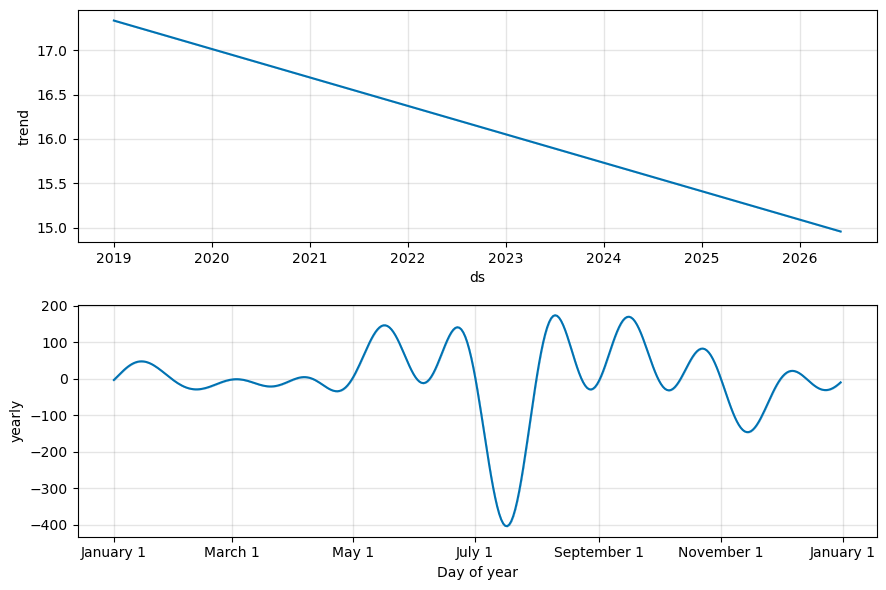

In [88]:
from prophet import Prophet
import matplotlib.pyplot as plt

m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(df_monthly.rename(columns={"ds":"ds","y":"y"}))


future = m.make_future_dataframe(periods=12, freq="MS")
forecast = m.predict(future)


fig = m.plot_components(forecast)
plt.show()


In [70]:
df

,Üretim yeri,Satış belgesi,Yaratma tarihi,İki basamaklı no.,Saat,Satış organizasyonu,Dağıtım kanalı,Bölüm,Kalem,Müşteri,Ad,Malzeme,Malzeme kısa metni,İlk Malzeme,Kaç defa değişti?,Fiyat grubu,Sipariş miktarı,Teyit edilen küm.mkt,Durum,Geliş Trh,Tahsis Tarihi,Tahsis Saati,İlk Dönem,Son Dönem,Unnamed: 24,Orta. Bul,Genel Bul.,Servis Drc,Son Tahsis Tarihi,Hesap Tarihi,Hesap Saati,Hesap Miktari,Satış belgesi türü,Sipariş nedeni,Ret nedeni,Araç tipi,Tedarik yeri,Sipariş Kriteri,Plnl.tsl.süresi,Tedarik Türü,Kayar ortalama fiyat,ÜY'ye özgü mlz.drm.,Sonraki SD belgesi,GuncelMalzeme
233788,4000,1107963417,2021-01-03,1,22:07:17,MA00,YS,PY,10,600998,GÜNERİ OTOMOTİV TURZ.İNŞ.SAN.TİC.LT,ME011867KP,KRANK ARKA KECESI,NaN,0,10.0,2.0,2.0,Normal,2021-01-04,2021-01-03,22:07:18,6.2018,6.2025,0,1.0,1.0,1.0,2021-01-03,2021-01-03,22:07:18,2.0,YPSP,(BAYİ) Normal Sipariş,NaN,PRESTIJ E2,SKT,H,0,Y,0,NaN,NaN,ME011867KP
233789,4000,1107963416,2021-01-03,1,22:06:55,MA00,YS,PY,30,600100,ŞEREF OTO İNŞ. NAK. PET. TUR. SAN.,MK667789KP,KAYIS,NaN,0,10.0,3.0,3.0,Normal,2021-01-04,2021-01-03,22:06:56,6.2018,6.2025,0,1.0,1.0,1.0,2021-01-03,2021-01-03,22:06:56,3.0,YPSP,(BAYİ) Normal Sipariş,NaN,PRESTIJ E6,AKBİLYA,H,0,Y,0,NaN,NaN,MK667789KP
233790,4000,1107963416,2021-01-03,1,22:06:55,MA00,YS,PY,20,600100,ŞEREF OTO İNŞ. NAK. PET. TUR. SAN.,MK666977,"HALKA,YAĞ DOLDURMA",NaN,0,10.0,5.0,5.0,Normal,2021-01-04,2021-01-03,22:06:56,6.2018,6.2025,0,1.0,1.0,1.0,2021-01-03,2021-01-03,22:06:56,5.0,YPSP,(BAYİ) Normal Sipariş,NaN,PRESTIJ E6,MFTBC,X,0,I,0,NaN,NaN,MK666977
233791,4000,1107963416,2021-01-03,1,22:06:55,MA00,YS,PY,10,600100,ŞEREF OTO İNŞ. NAK. PET. TUR. SAN.,500395378,"KAPAK,VALF DISLI TRANSMANI",NaN,0,10.0,64.0,64.0,Normal,2021-01-04,2021-01-03,22:06:56,6.2018,6.2025,0,1.0,1.0,1.0,2021-01-03,2021-01-03,22:06:56,64.0,YPSP,(BAYİ) Normal Sipariş,NaN,CANTER S-E,FPT,H,0,I,0,NaN,NaN,"['MK667086AG', '500395378']"
233792,4000,1107963415,2021-01-03,1,22:06:31,MA00,YS,PY,10,600103,TEKBAŞ TİCARİ ARAÇLAR PAZARLAMA,QC000384,"SOGUTUCU,EGR",NaN,0,10.0,1.0,1.0,Normal,2021-01-04,2021-01-03,22:06:33,6.2018,6.2025,0,1.0,1.0,1.0,2021-01-03,2021-01-03,22:06:33,1.0,YPSP,(BAYİ) Normal Sipariş,NaN,CANTER S-E,MFTBC,K,0,I,0,NaN,NaN,QC000384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629538,5000,1106065475,2025-06-30,6,08:14:22,OTOB,XD,OY,90,238,TFR SAS,1627-LPE-01Y,"BRAKET, AVARE KASNAK",NaN,0,10.0,1.0,1.0,Normal,2025-06-30,2025-06-30,08:15:42,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,08:15:42,1.0,ZIHY,(BAYİ) Normal Sipariş,NaN,AVENUE E6,TURKERLER,X,0,Y,0,NaN,NaN,1627-LPE-01Y
629539,5000,1106065475,2025-06-30,6,08:14:22,OTOB,XD,OY,101,238,TFR SAS,275531-10580,"DEGISTIRME KABLOSU,L 10580mm",NaN,0,10.0,1.0,0.0,Normal,2025-06-30,2025-06-30,08:15:42,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,08:15:42,0.0,ZIHY,(BAYİ) Normal Sipariş,NaN,TOURMA E5C,KONGSBERG,K,0,I,0,NaN,NaN,275531-10580
629540,5000,1106065475,2025-06-30,6,08:14:22,OTOB,XD,OY,111,238,TFR SAS,3503-ANE-01Y,"KÖRÜK,ARKA FREN, (23.216.16.14)",NaN,0,10.0,1.0,0.0,Normal,2025-06-30,2025-06-30,08:15:42,6.2018,6.2025,0,0.0,0.0,0.0,NaN,2025-06-30,08:15:42,0.0,ZIHY,(BAYİ) Normal Sipariş,NaN,MD 7 E6C,ARFESAN,Y,0,Y,0,NaN,NaN,3503-ANE-01Y
629541,5000,1106065475,2025-06-30,6,08:14:22,OTOB,XD,OY,120,238,TFR SAS,3724-ANH-01Y,"DIREKSIYON CEKME KOLU,ON AKS",NaN,0,10.0,2.0,2.0,Normal,2025-06-30,2025-06-30,08:15:42,6.2018,6.2025,0,1.0,1.0,1.0,2025-06-30,2025-06-30,08:15:42,2.0,ZIHY,(BAYİ) Normal Sipariş,NaN,MD 7 E6FPT,DITAS,K,0,Y,0,NaN,NaN,3724-ANH-01Y


In [75]:
urun_kodu="ML242294Y"
dolar_col="Şimdi"
urun_df = df[df["Malzeme"] == urun_kodu].copy()
df_monthly = (
    urun_df.groupby(urun_df["Yaratma tarihi"].dt.to_period("M"))["Sipariş miktarı"]
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={"Yaratma tarihi":"ds", "Sipariş miktarı":"y"})
)
df_monthly = (
    df_monthly.set_index("ds")
    .asfreq("MS", fill_value=1)  # aylık seriye oturt
    .reset_index()
)

# -----------------------------
# 2) TÜFE ekle
df_tufe_ = tüfe.copy()
df_tufe_["ds"] = pd.to_datetime(df_tufe_["ds"], dayfirst=True, errors="coerce")
df_tufe_["tüfe yıllık"] = pd.to_numeric(df_tufe_["tüfe yıllık"], errors="coerce")
df_prophet = df_monthly.merge(df_tufe_[["ds","tüfe yıllık"]], on="ds", how="left")
df_prophet["tüfe yıllık"] = df_prophet["tüfe yıllık"].ffill()

# -----------------------------
# 3) Kampanya ekle
kampanya_urun = otob_kampanya[otob_kampanya["Malzeme"] == urun_kodu].copy()
kampanya_urun["ds"] = pd.to_datetime(kampanya_urun["Bşl.tarihi"]).dt.to_period("M").dt.to_timestamp()
kampanya_df = kampanya_urun[["ds"]].drop_duplicates().copy()
kampanya_df["kampanya"] = 1
df_prophet = df_prophet.merge(kampanya_df, on="ds", how="left")
df_prophet["kampanya"] = df_prophet["kampanya"].fillna(0).astype(int)

# -----------------------------
# 4) Dolar ekle
df_fin = dolar.copy()
df_fin["ds"] = pd.to_datetime(df_fin["Tarih"], dayfirst=True, errors="coerce")

if dolar_col not in df_fin.columns:
    raise KeyError(f"Dolar dataframe içinde '{dolar_col}' kolonu yok. Mevcut kolonlar: {df_fin.columns}")

df_fin[dolar_col] = (df_fin[dolar_col].astype(str)
                     .str.replace(".", "", regex=False)
                     .str.replace(",", ".", regex=False))
df_fin[dolar_col] = pd.to_numeric(df_fin[dolar_col], errors="coerce")
df_fin["ds"] = df_fin["ds"].dt.to_period("M").dt.to_timestamp()
df_fin = df_fin.groupby("ds", as_index=False)[dolar_col].mean()
#holiday-pandemi
pandemi = pd.DataFrame({
        "holiday": "pandemi",
        "ds": pd.date_range("2020-01-01", "2022-06-01", freq="MS"),  # her ayın başı
        "lower_window": 0,
        "upper_window": 30   # ay boyunca etki sürsün
    })

# servis
df_servis_filtered = servis[servis["Parça Kodu"] == urun_kodu].copy()
df_servis_filtered["Çıkış Tarihi"] = pd.to_datetime(df_servis_filtered["Çıkış Tarihi"], dayfirst=True)
df_servis_monthly = (
    df_servis_filtered.groupby(df_servis_filtered["Çıkış Tarihi"].dt.to_period("M"))["Verilen Miktar"]
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={"Çıkış Tarihi":"ds", "Verilen Miktar":"servis_parca_toplam"})
)
# motorin 
df_motorin=df_motorin_monthly.copy()
df_prophet = df_prophet.merge(df_motorin, on="ds", how="left")


df_prophet = df_prophet.merge(df_fin, on="ds", how="left")
df_prophet = df_prophet.merge(df_servis_monthly, on="ds", how="left")
df_prophet["servis_parca_toplam"] = df_prophet["servis_parca_toplam"].fillna(0)
# -----------------------------
# 5) Train / Test ayır
split_index = int(len(df_prophet) * 0.8)
train = df_prophet.iloc[:split_index].copy()
test  = df_prophet.iloc[split_index:].copy()

# NaN doldur
train = train.fillna(0)
test  = test.fillna(0)

# -----------------------------
# 6) Model ve regresör setlerini dene
regressor_sets = [
    [],   
    ["Şimdi"],
    ["motorin_aylik"],
    ["Şimdi","servis_parca_toplam"],
    ["Şimdi","motorin_aylik"],
    ["servis_parca_toplam"],
    ["tüfe yıllık"],
    ["kampanya"],
    ["Şimdi","tüfe yıllık"],
    ["Şimdi","kampanya"],
    ["tüfe yıllık","kampanya"],
    ["Şimdi","tüfe yıllık","kampanya","servis_parca_toplam"]
]

results = []
for regs in regressor_sets:
    m = Prophet(
        interval_width=0.0,
        changepoint_prior_scale=0.05,   # trend esnekliği
        seasonality_prior_scale=10.0,   # sezon etkisinin gücü
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        holidays=pandemi
    )
    # m.add_seasonality(name="6_month", period=30.5, fourier_order=10)


   # m.add_seasonality(name="quarterly", period=91.25, fourier_order=3)
    for r in regs:
        m.add_regressor(r)

    train_cols = ["ds","y"] + regs

    # Minimum satır sayısı kontrolü
    if train["y"].notna().sum() < 2:
        results.append({
            "Malzeme": urun_kodu,
            "Regressors": ",".join(regs) if regs else "Yalnızca Temel",
            "MAE": None,
            "RMSE": None,
            "MAPE": None,
            "SMAPE": None,
            "WAPE": None,
            "SİPARİŞ MİKTARI ORT": df_prophet["y"].mean(),
            "SİPARİŞ MİKTARI SAPMA": df_prophet["y"].std(),
            "SİPARİŞ MİKTARI SIKLIĞI": (df_prophet["y"] > 0).sum() / len(df_prophet),
            "Kampanyalı Ay Sayısı": (df_prophet["kampanya"] == 1).sum()
        })
        continue

    # Prophet eğit
    m.fit(train[train_cols])

    # Test verisi hazırla
    future_test = test[["ds"]].merge(df_prophet[["ds"] + regs], on="ds", how="left")
    forecast_test = m.predict(future_test)[["ds","yhat"]]
    forecast_test["yhat"] = forecast_test["yhat"].clip(lower=0)

    # Gerçek vs tahmin
    merged = test[["ds","y"]].merge(forecast_test, on="ds", how="inner").dropna()
    y_true = merged["y"].astype(float).values
    y_pred = merged["yhat"].astype(float).values

    # metrikler
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    def smape(a, f):
        return 100 * np.mean(2*np.abs(f-a) / (np.abs(a)+np.abs(f)+1e-8))

    def wape(a, f):
        return np.sum(np.abs(f-a)) / np.sum(np.abs(a)) * 100

    smape_val = smape(y_true, y_pred)
    wape_val  = wape(y_true, y_pred)

    # sipariş istatistikleri (tüm dönemde)
    siparis_ort = df_monthly["y"].mean()
    siparis_sapma = df_monthly["y"].std()
    siparis_sikligi = (df_monthly["y"] > 1).sum()
    kampanya_sayisi = (df_prophet["kampanya"] == 1).sum()

    merged = test[["ds","y"]].merge(forecast_test, on="ds", how="inner").dropna()
    merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

    ds = merged["ds"].reset_index(drop=True)
    y = merged["y"].reset_index(drop=True)
    yhat = merged["yhat"].reset_index(drop=True)
    sapma = merged["sapma_%"].reset_index(drop=True)
  
    results.append({
        "Malzeme": urun_kodu,
        "Regressors": ",".join(regs) if regs else "Yalnızca Temel",
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "SMAPE": smape_val,
        "WAPE": wape_val,
        "SİPARİŞ MİKTARI ORT": siparis_ort,
        "SİPARİŞ MİKTARI SAPMA": siparis_sapma,
        "SİPARİŞ MİKTARI SIKLIĞI": siparis_sikligi,
        "Kampanyalı Ay Sayısı": kampanya_sayisi,
        "ds":ds,
        "y":y,
        "yhat":yhat,
        "sapma_%":sapma,
        
    })
    

# -----------------------------
# Sonuç DataFrame
df_sonuc = pd.DataFrame(results)
df_sonuc


14:24:42 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing
14:24:42 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing
14:24:42 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing
14:24:42 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:44 - cmdstanpy - INFO - Chain [1]

,Malzeme,Regressors,MAE,RMSE,MAPE,SMAPE,WAPE,SİPARİŞ MİKTARI ORT,SİPARİŞ MİKTARI SAPMA,SİPARİŞ MİKTARI SIKLIĞI,Kampanyalı Ay Sayısı,ds,y,yhat,sapma_%
0,ML242294Y,Yalnızca Temel,116.986137,145.410002,28.630918,28.024647,28.394693,500.740741,182.656827,54,17,"0 2024-08-01 1 2024-09-01 2 2024-10-01 3 2024-11-01 4 2024-12-01 5 2025-01-01 6 2025-02-01 7 2025-03-01 8 2025-04-01 9 2025-05-01 10 2025-06-01 Name: ds, dtype: datetime64[ns]","0 532.0 1 234.0 2 314.0 3 561.0 4 713.0 5 287.0 6 367.0 7 375.0 8 333.0 9 543.0 10 273.0 Name: y, dtype: float64","0 412.128316 1 407.018956 2 402.074415 3 396.965056 4 392.020515 5 386.911156 6 381.801797 7 377.186892 8 372.077533 9 367.132992 10 362.023632 Name: yhat, dtype: float64","0 -22.532272 1 73.939725 2 28.049177 3 -29.239740 4 -45.018161 5 34.812249 6 4.033187 7 0.583171 8 11.734995 9 -32.388031 10 32.609389 Name: sapma_%, dtype: float64"
1,ML242294Y,Şimdi,126.472602,142.602538,33.115361,30.456406,30.697234,500.740741,182.656827,54,17,"0 2024-08-01 1 2024-09-01 2 2024-10-01 3 2024-11-01 4 2024-12-01 5 2025-01-01 6 2025-02-01 7 2025-03-01 8 2025-04-01 9 2025-05-01 10 2025-06-01 Name: ds, dtype: datetime64[ns]","0 532.0 1 234.0 2 314.0 3 561.0 4 713.0 5 287.0 6 367.0 7 375.0 8 333.0 9 543.0 10 273.0 Name: y, dtype: float64","0 422.983446 1 423.064314 2 425.758767 3 427.973321 4 425.478786 5 423.267496 6 419.107023 7 411.738742 8 402.475740 9 397.476439 10 393.698535 Name: yhat, dtype: float64","0 -20.491833 1 80.796715 2 35.591964 3 -23.712420 4 -40.325556 5 47.479964 6 14.198099 7 9.796998 8 20.863586 9 -26.799919 10 44.211918 Name: sapma_%, dtype: float64"
2,ML242294Y,motorin_aylik,128.321882,142.752471,34.421327,30.885431,31.146088,500.740741,182.656827,54,17,"0 2024-08-01 1 2024-09-01 2 2024-10-01 3 2024-11-01 4 2024-12-01 5 2025-01-01 6 2025-02-01 7 2025-03-01 8 2025-04-01 9 2025-05-01 10 2025-06-01 Name: ds, dtype: datetime64[ns]","0 532.0 1 234.0 2 314.0 3 561.0 4 713.0 5 287.0 6 367.0 7 375.0 8 333.0 9 543.0 10 273.0 Name: y, dtype: float64","0 426.249132 1 435.473251 2 434.380336 3 433.780293 4 432.038141 5 420.017881 6 417.788854 7 422.527790 8 430.984552 9 431.444188 10 407.879791 Name: yhat, dtype: float64","0 -19.877983 1 86.099680 2 38.337687 3 -22.677310 4 -39.405590 5 46.347694 6 13.838925 7 12.674077 8 29.424790 9 -20.544348 10 49.406517 Name: sapma_%, dtype: float64"
3,ML242294Y,"Şimdi,servis_parca_toplam",153.939980,165.860426,44.693385,36.218305,37.364073,500.740741,182.656827,54,17,"0 2024-08-01 1 2024-09-01 2 2024-10-01 3 2024-11-01 4 2024-12-01 5 2025-01-01 6 2025-02-01 7 2025-03-01 8 2025-04-01 9 2025-05-01 10 2025-06-01 Name: ds, dtype: datetime64[ns]","0 532.0 1 234.0 2 314.0 3 561.0 4 713.0 5 287.0 6 367.0 7 375.0 8 333.0 9 543.0 10 273.0 Name: y, dtype: float64","0 451.021159 1 462.932785 2 461.881934 3 459.570098 4 473.085262 5 479.753830 6 488.299959 7 515.259118 8 505.267947 9 501.101320 10 498.722045 Name: yhat, dtype: float64","0 -15.221587 1 97.834523 2 47.096157 3 -18.080197 4 -33.648631 5 67.161613 6 33.051760 7 37.402431 8 51.732116 9 -7.716147 10 82.682068 Name: sapma_%, dtype: float64"
4,ML242294Y,"Şimdi,motorin_aylik",129.102188,142.953322,34.770060,31.069743,31.335483,500.740741,182.656827,54,17,"0 2024-08-01 1 2024-09-01 2 2024-10-01 3 2024-11-01 4 2024-12-01 5 2025-01-01 6 2025-02-01 7 2025-03-01 8 2025-04-01 9 2025-05-01 10 2025-06-01 Name: ds, dtype: datetime64[ns]","0 532.0 1 234.0 2 314.0 3 561.0 4 713.0 5 287.0 6 367.0 7 375.0 8 333.0 9 543.0 10 273.0 Name: y, dtype: float64","0 427.654972 1 436.500489 2 436.300793 3 436.487860 4 434.859464 5 423.871629 6 421.541720 7 425.043813 8 431.684736 9 431.671212 10 409.854395 Name: yhat, dtype: float64","0 -19.613727 1 86.538670 2 38.949297 3 -22.194677 4 -39.009893 5 47.690463 6 14.861504 7 13.345017 8 29.635056 9 -20.502539 10 50.129815 Name: sapma_%, dtype: float64"
5,ML242294Y,servis_parca_toplam,137.523345,150.562702,37.275929,32.961361,33.379453,500.740741,182.656827,54,17,"0 2024-08-01 1 2024-0

In [76]:
 merged = test[["ds","y"]].merge(forecast_test, on="ds", how="inner").dropna()
 merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

 print(merged[["ds","y","yhat","sapma_%"]])

           ds      y        yhat    sapma_%
0  2024-08-01  532.0  423.787842 -20.340631
1  2024-09-01  234.0  439.653860  87.886265
2  2024-10-01  314.0  433.496452  38.056195
3  2024-11-01  561.0  423.633557 -24.485997
4  2024-12-01  713.0  448.030848 -37.162574
5  2025-01-01  287.0  451.990438  57.487958
6  2025-02-01  367.0  467.153123  27.289679
7  2025-03-01  375.0  519.986953  38.663188
8  2025-04-01  333.0  505.565584  51.821497
9  2025-05-01  543.0  494.461847  -8.938886
10 2025-06-01  273.0  490.788238  79.775911


In [77]:
import matplotlib.pyplot as plt

def plot_forecast(train, test, forecast_test, urun_kodu, regs):
    plt.figure(figsize=(13,5))

    # TRAIN
    plt.plot(train["ds"], train["y"], ".-", linewidth=2, markersize=6, label="TRAIN SET")

    # TEST (gerçek)
    plt.plot(test["ds"], test["y"], ".-", linewidth=2, markersize=6, label="TEST SET")

    # FORECAST (sadece test dönemi)
    plt.plot(forecast_test["ds"], forecast_test["yhat"], ".-", linewidth=2, markersize=6, label="FORECAST (yhat)")

    # Confidence Interval (varsa)
    if "yhat_lower" in forecast_test and "yhat_upper" in forecast_test:
        plt.fill_between(
            forecast_test["ds"],
            forecast_test["yhat_lower"],
            forecast_test["yhat_upper"],
            alpha=0.2, label="Confidence Interval"
        )

    plt.title(f"Ürün {urun_kodu} - Prophet Forecast\nRegressors: {','.join(regs) if regs else 'Yok'}")
    plt.ylabel("Sipariş Miktarı")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


In [81]:
train

,ds,y,tüfe yıllık,kampanya,motorin_aylik,Şimdi,servis_parca_toplam
0,2021-01-01,439.0,14.97,1,6.580000,7.395690,0.0
1,2021-02-01,524.0,15.61,1,6.624444,7.091060,0.0
2,2021-03-01,743.0,16.19,1,6.509091,7.676813,0.0
3,2021-04-01,606.0,17.14,0,6.447500,8.158609,0.0
4,2021-05-01,512.0,16.59,0,6.881429,8.377124,0.0
5,2021-06-01,837.0,17.53,0,7.223333,8.621077,0.0
6,2021-07-01,420.0,18.95,0,7.230000,8.587773,0.0
7,2021-08-01,572.0,19.25,1,7.274000,8.463332,0.0
8,2021-09-01,639.0,19.58,1,7.285000,8.559264,0.0
9,2021-10-01,729.0,19.89,1,7.878333,9.211276,0.0


14:24:48 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] done processing


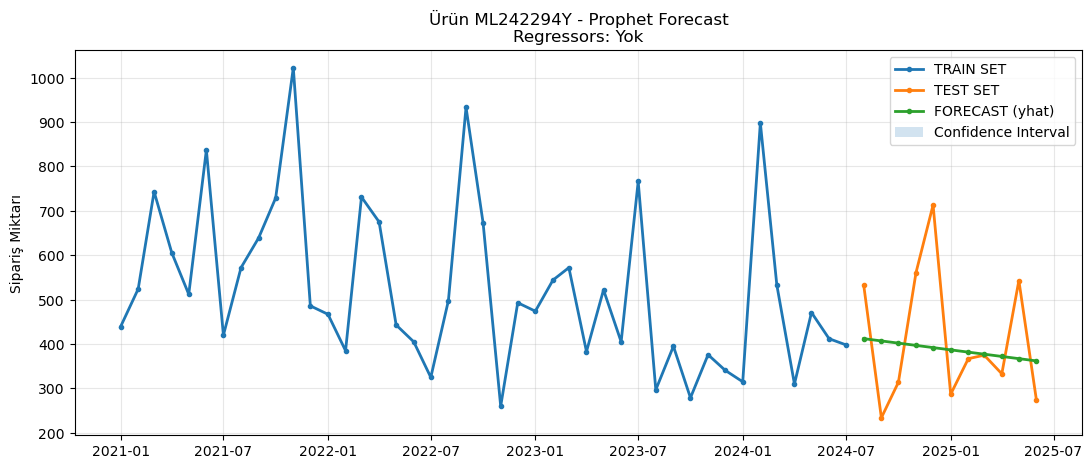

14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  412.128316 -22.532272
1  2024-09-01  234.0  407.018956  73.939725
2  2024-10-01  314.0  402.074415  28.049177
3  2024-11-01  561.0  396.965056 -29.239740
4  2024-12-01  713.0  392.020515 -45.018161
5  2025-01-01  287.0  386.911156  34.812249
6  2025-02-01  367.0  381.801797   4.033187
7  2025-03-01  375.0  377.186892   0.583171
8  2025-04-01  333.0  372.077533  11.734995
9  2025-05-01  543.0  367.132992 -32.388031
10 2025-06-01  273.0  362.023632  32.609389


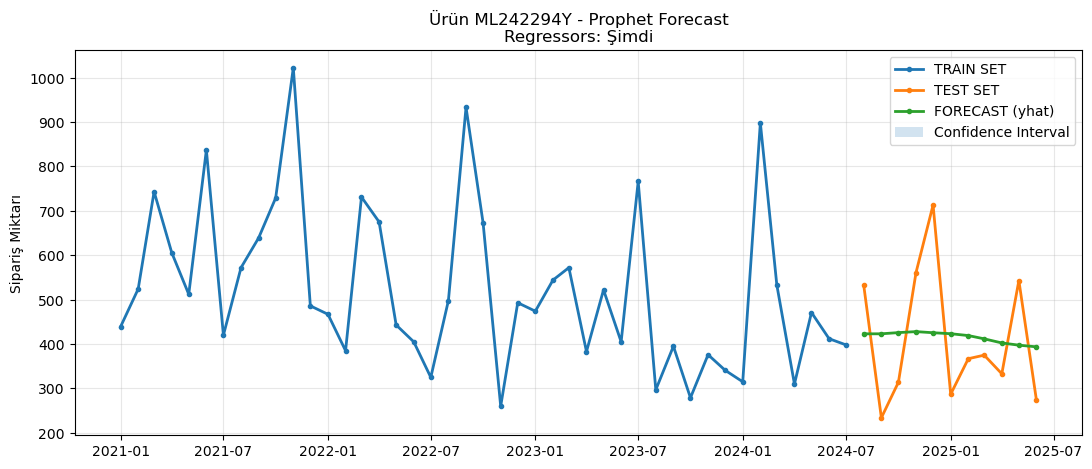

14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:49 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  422.983446 -20.491833
1  2024-09-01  234.0  423.064314  80.796715
2  2024-10-01  314.0  425.758767  35.591964
3  2024-11-01  561.0  427.973321 -23.712420
4  2024-12-01  713.0  425.478786 -40.325556
5  2025-01-01  287.0  423.267496  47.479964
6  2025-02-01  367.0  419.107023  14.198099
7  2025-03-01  375.0  411.738742   9.796998
8  2025-04-01  333.0  402.475740  20.863586
9  2025-05-01  543.0  397.476439 -26.799919
10 2025-06-01  273.0  393.698535  44.211918


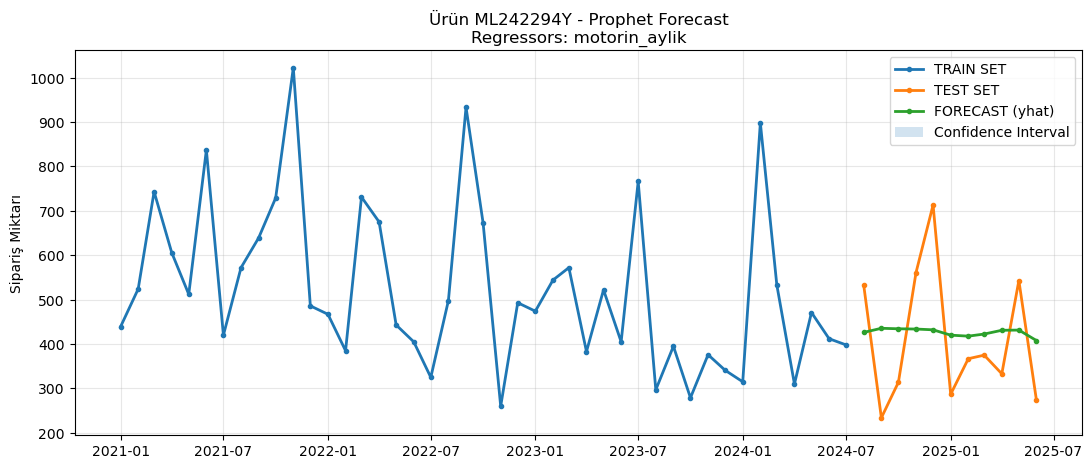

14:24:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:50 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  426.249132 -19.877983
1  2024-09-01  234.0  435.473251  86.099680
2  2024-10-01  314.0  434.380336  38.337687
3  2024-11-01  561.0  433.780293 -22.677310
4  2024-12-01  713.0  432.038141 -39.405590
5  2025-01-01  287.0  420.017881  46.347694
6  2025-02-01  367.0  417.788854  13.838925
7  2025-03-01  375.0  422.527790  12.674077
8  2025-04-01  333.0  430.984552  29.424790
9  2025-05-01  543.0  431.444188 -20.544348
10 2025-06-01  273.0  407.879791  49.406517


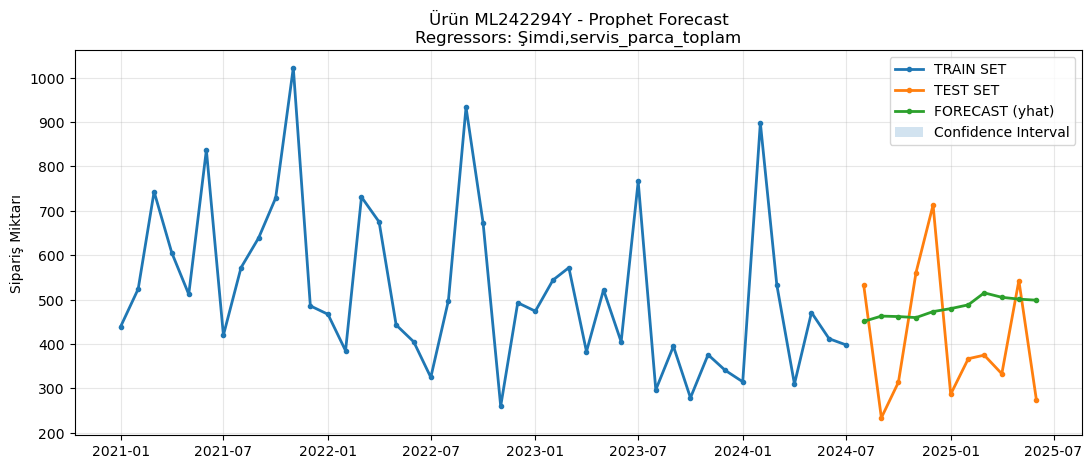

14:24:50 - cmdstanpy - INFO - Chain [1] start processing
14:24:50 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  451.021159 -15.221587
1  2024-09-01  234.0  462.932785  97.834523
2  2024-10-01  314.0  461.881934  47.096157
3  2024-11-01  561.0  459.570098 -18.080197
4  2024-12-01  713.0  473.085262 -33.648631
5  2025-01-01  287.0  479.753830  67.161613
6  2025-02-01  367.0  488.299959  33.051760
7  2025-03-01  375.0  515.259118  37.402431
8  2025-04-01  333.0  505.267947  51.732116
9  2025-05-01  543.0  501.101320  -7.716147
10 2025-06-01  273.0  498.722045  82.682068


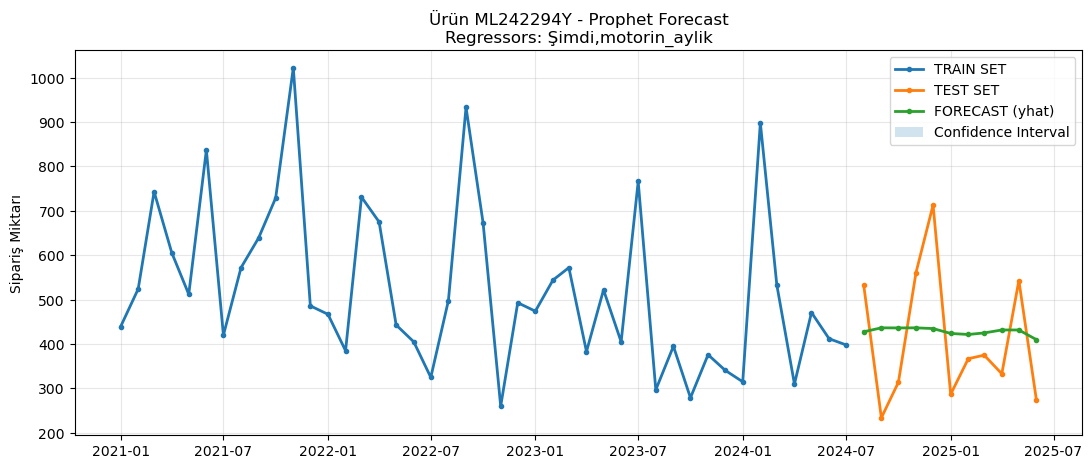

14:24:50 - cmdstanpy - INFO - Chain [1] start processing
14:24:50 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  427.654972 -19.613727
1  2024-09-01  234.0  436.500489  86.538670
2  2024-10-01  314.0  436.300793  38.949297
3  2024-11-01  561.0  436.487860 -22.194677
4  2024-12-01  713.0  434.859464 -39.009893
5  2025-01-01  287.0  423.871629  47.690463
6  2025-02-01  367.0  421.541720  14.861504
7  2025-03-01  375.0  425.043813  13.345017
8  2025-04-01  333.0  431.684736  29.635056
9  2025-05-01  543.0  431.671212 -20.502539
10 2025-06-01  273.0  409.854395  50.129815


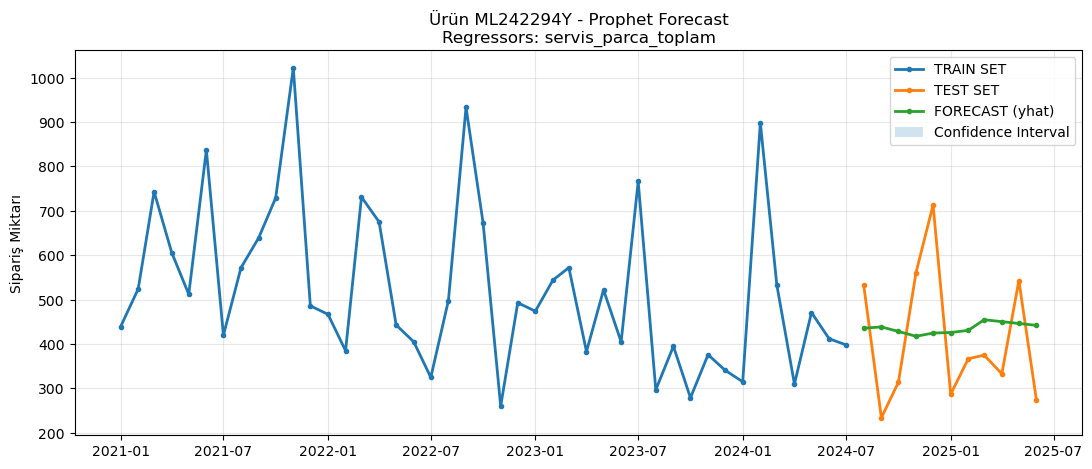

14:24:50 - cmdstanpy - INFO - Chain [1] start processing
14:24:50 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  435.683660 -18.104575
1  2024-09-01  234.0  438.567186  87.421875
2  2024-10-01  314.0  428.371280  36.423975
3  2024-11-01  561.0  417.486719 -25.581690
4  2024-12-01  713.0  424.730391 -40.430520
5  2025-01-01  287.0  425.961747  48.418727
6  2025-02-01  367.0  430.864593  17.401796
7  2025-03-01  375.0  454.722259  21.259269
8  2025-04-01  333.0  450.446380  35.269183
9  2025-05-01  543.0  446.308433 -17.806918
10 2025-06-01  273.0  442.032554  61.916686


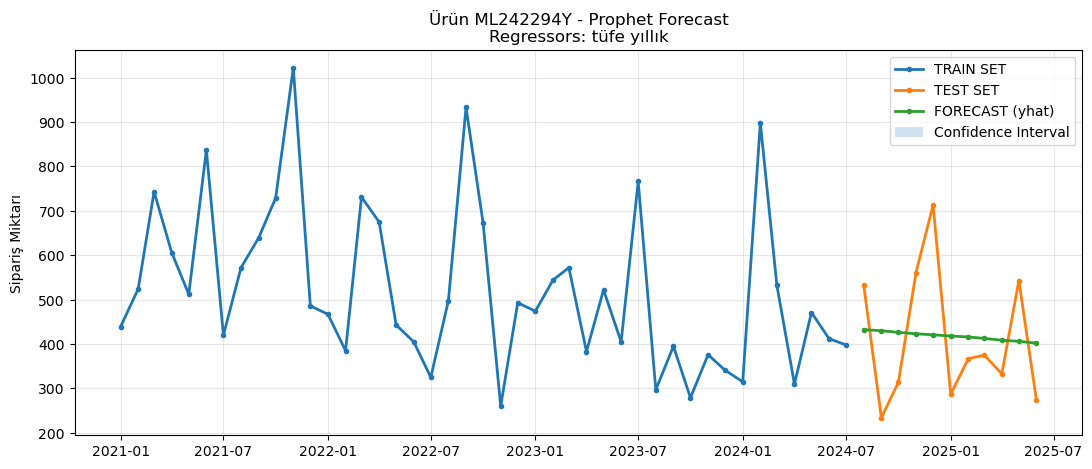

14:24:51 - cmdstanpy - INFO - Chain [1] start processing
14:24:51 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  432.459431 -18.710633
1  2024-09-01  234.0  429.980386  83.752302
2  2024-10-01  314.0  426.356939  35.782465
3  2024-11-01  561.0  423.088649 -24.583128
4  2024-12-01  713.0  420.835619 -40.976772
5  2025-01-01  287.0  418.119800  45.686341
6  2025-02-01  367.0  415.985153  13.347453
7  2025-03-01  375.0  412.749160  10.066443
8  2025-04-01  333.0  408.584001  22.697898
9  2025-05-01  543.0  406.144421 -25.203606
10 2025-06-01  273.0  402.065362  47.276689


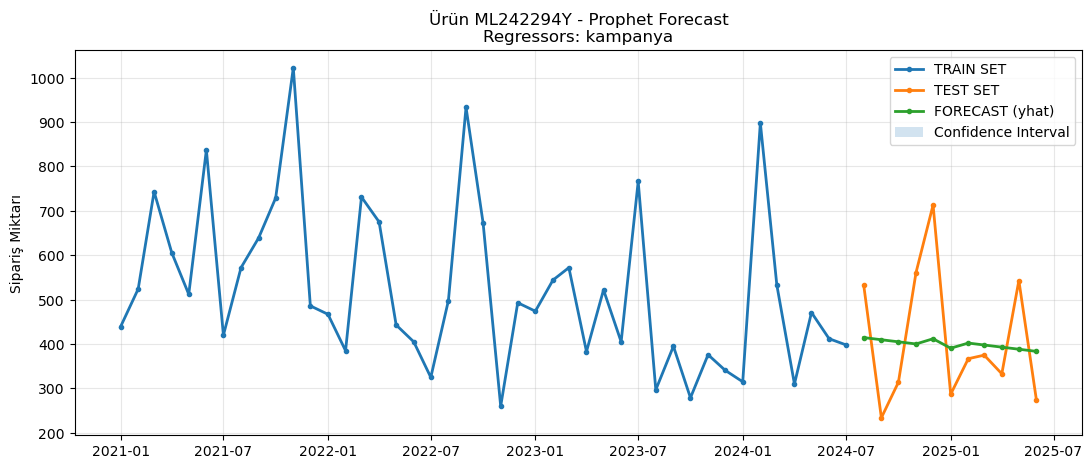

14:24:51 - cmdstanpy - INFO - Chain [1] start processing
14:24:51 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  414.542111 -22.078551
1  2024-09-01  234.0  409.707542  75.088693
2  2024-10-01  314.0  405.028927  28.990104
3  2024-11-01  561.0  400.194358 -28.664107
4  2024-12-01  713.0  411.883584 -42.232316
5  2025-01-01  287.0  390.681174  36.125845
6  2025-02-01  367.0  402.214446   9.595217
7  2025-03-01  375.0  397.847739   6.092730
8  2025-04-01  333.0  393.013170  18.021973
9  2025-05-01  543.0  388.334555 -28.483507
10 2025-06-01  273.0  383.499986  40.476185


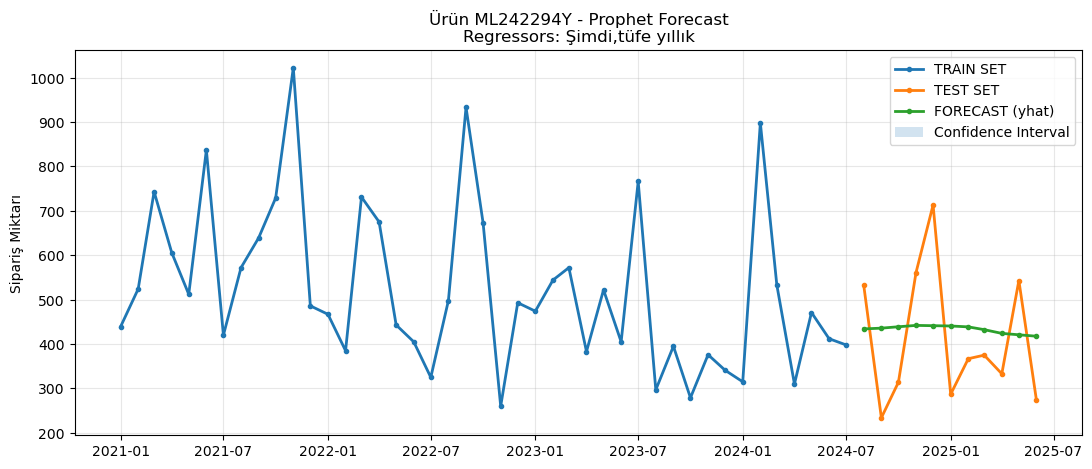

14:24:51 - cmdstanpy - INFO - Chain [1] start processing
14:24:51 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  434.112966 -18.399818
1  2024-09-01  234.0  435.796698  86.237905
2  2024-10-01  314.0  438.922871  39.784354
3  2024-11-01  561.0  441.991170 -21.213695
4  2024-12-01  713.0  441.320396 -38.103731
5  2025-01-01  287.0  440.667619  53.542724
6  2025-02-01  367.0  438.640536  19.520582
7  2025-03-01  375.0  432.397383  15.305969
8  2025-04-01  333.0  423.992077  27.324948
9  2025-05-01  543.0  420.824583 -22.500077
10 2025-06-01  273.0  417.634351  52.979616


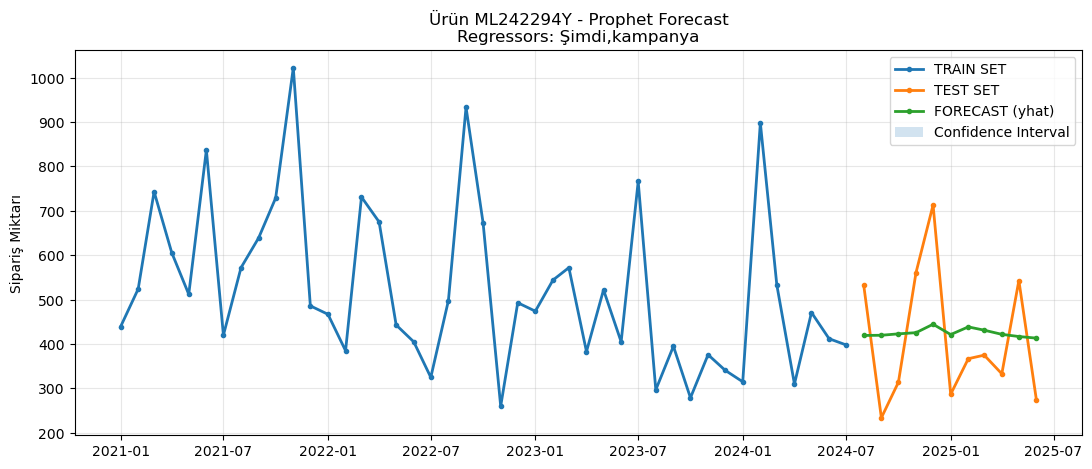

14:24:52 - cmdstanpy - INFO - Chain [1] start processing
14:24:52 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  419.345170 -21.175720
1  2024-09-01  234.0  419.783562  79.394685
2  2024-10-01  314.0  422.953286  34.698499
3  2024-11-01  561.0  425.630800 -24.129982
4  2024-12-01  713.0  444.595244 -37.644426
5  2025-01-01  287.0  421.388088  46.825118
6  2025-02-01  367.0  438.615675  19.513808
7  2025-03-01  375.0  431.202605  14.987361
8  2025-04-01  333.0  421.835399  26.677297
9  2025-05-01  543.0  416.931181 -23.217094
10 2025-06-01  273.0  413.320118  51.399311


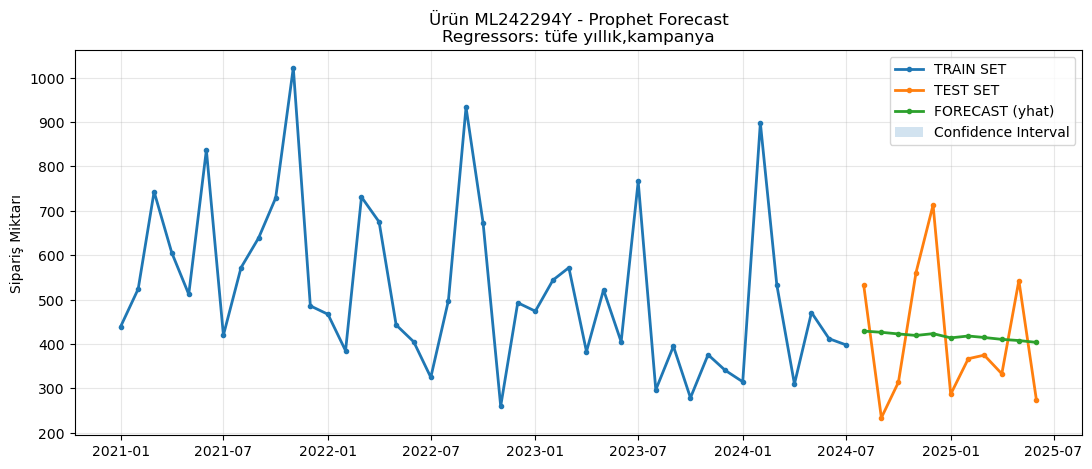

14:24:52 - cmdstanpy - INFO - Chain [1] start processing
14:24:52 - cmdstanpy - INFO - Chain [1] done processing


           ds      y        yhat    sapma_%
0  2024-08-01  532.0  429.181878 -19.326715
1  2024-09-01  234.0  426.476054  82.254724
2  2024-10-01  314.0  422.752368  34.634512
3  2024-11-01  561.0  419.334153 -25.252379
4  2024-12-01  713.0  423.427778 -40.613215
5  2025-01-01  287.0  413.927895  44.225747
6  2025-02-01  367.0  418.113273  13.927322
7  2025-03-01  375.0  414.769518  10.605205
8  2025-04-01  333.0  410.541767  23.285816
9  2025-05-01  543.0  407.886668 -24.882750
10 2025-06-01  273.0  403.736633  47.888877


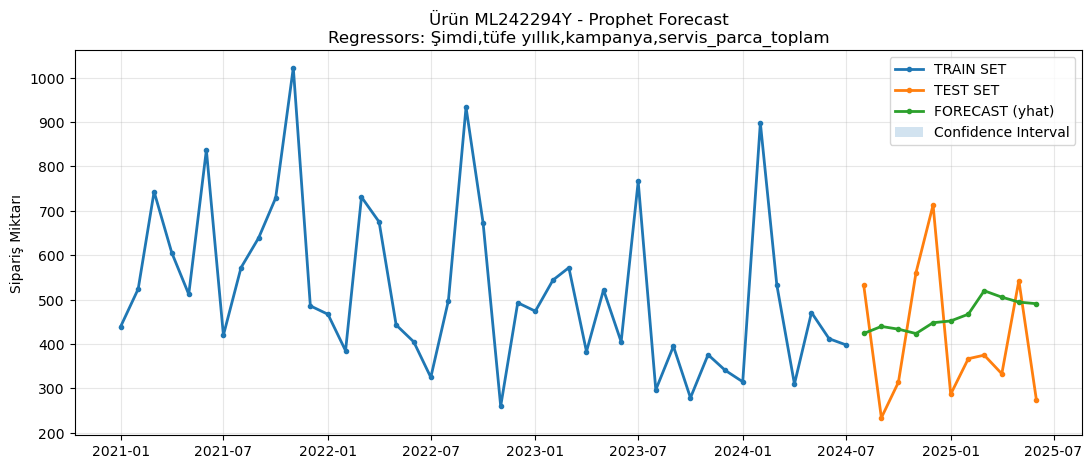

           ds      y        yhat    sapma_%
0  2024-08-01  532.0  423.787842 -20.340631
1  2024-09-01  234.0  439.653860  87.886265
2  2024-10-01  314.0  433.496452  38.056195
3  2024-11-01  561.0  423.633557 -24.485997
4  2024-12-01  713.0  448.030848 -37.162574
5  2025-01-01  287.0  451.990438  57.487958
6  2025-02-01  367.0  467.153123  27.289679
7  2025-03-01  375.0  519.986953  38.663188
8  2025-04-01  333.0  505.565584  51.821497
9  2025-05-01  543.0  494.461847  -8.938886
10 2025-06-01  273.0  490.788238  79.775911


In [78]:
for regs in regressor_sets:
    m = Prophet(
        interval_width=0.0,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="additive",
        holidays=pandemi
    )

    for r in regs:
        m.add_regressor(r)

    m.fit(train[["ds","y"] + regs])

   
    future_test = test[["ds"]].merge(df_prophet[["ds"] + regs], on="ds", how="left")
    forecast_test = m.predict(future_test)[["ds","yhat","yhat_lower","yhat_upper"]]

   
    plot_forecast(train, test, forecast_test, urun_kodu, regs)
    merged = test[["ds","y"]].merge(forecast_test, on="ds", how="inner").dropna()
    merged["sapma_%"] = 100 * (merged["yhat"] - merged["y"]) / merged["y"].replace(0, np.nan)

    print(merged[["ds","y","yhat","sapma_%"]])



In [228]:
df_sonuc

,Malzeme,Regressors,MAE,RMSE,MAPE,SMAPE,WAPE,SİPARİŞ MİKTARI ORT,SİPARİŞ MİKTARI SAPMA,SİPARİŞ MİKTARI SIKLIĞI,Kampanyalı Ay Sayısı
0,MK585740AY,Yalnızca Temel,83.331552,123.325408,172.494971,90.428321,96.489165,146.763636,116.399689,55,12
1,MK585740AY,Şimdi,87.897321,130.784137,187.661472,113.121983,101.775846,146.763636,116.399689,55,12
2,MK585740AY,"Şimdi,servis_parca_toplam",100.610392,139.509035,238.435932,105.881662,116.496243,146.763636,116.399689,55,12
3,MK585740AY,servis_parca_toplam,154.683677,174.068078,439.673322,121.764569,179.107415,146.763636,116.399689,55,12
4,MK585740AY,tüfe yıllık,253.499196,276.964120,756.068436,137.088137,293.525385,146.763636,116.399689,55,12
5,MK585740AY,kampanya,73.656497,124.513461,132.403392,80.401691,85.286470,146.763636,116.399689,55,12
6,MK585740AY,"Şimdi,tüfe yıllık",263.580427,288.421793,791.493570,138.161726,305.198389,146.763636,116.399689,55,12
7,MK585740AY,"Şimdi,kampanya",82.290886,129.274619,163.875848,109.293785,95.284184,146.763636,116.399689,55,12
8,MK585740AY,"tüfe yıllık,kampanya",222.821071,246.056728,656.212961,132.299609,258.003346,146.763636,116.399689,55,12
9,MK585740AY,"Şimdi,tüfe yıllık,kampanya,servis_parca_toplam",231.160767,255.012838,686.150995,133.552618,267.659836,146.763636,116.399689,55,12


In [82]:
train

,ds,y,tüfe yıllık,kampanya,motorin_aylik,Şimdi,servis_parca_toplam
0,2021-01-01,439.0,14.97,1,6.580000,7.395690,0.0
1,2021-02-01,524.0,15.61,1,6.624444,7.091060,0.0
2,2021-03-01,743.0,16.19,1,6.509091,7.676813,0.0
3,2021-04-01,606.0,17.14,0,6.447500,8.158609,0.0
4,2021-05-01,512.0,16.59,0,6.881429,8.377124,0.0
5,2021-06-01,837.0,17.53,0,7.223333,8.621077,0.0
6,2021-07-01,420.0,18.95,0,7.230000,8.587773,0.0
7,2021-08-01,572.0,19.25,1,7.274000,8.463332,0.0
8,2021-09-01,639.0,19.58,1,7.285000,8.559264,0.0
9,2021-10-01,729.0,19.89,1,7.878333,9.211276,0.0


In [71]:
otob_kampanya[otob_kampanya["Malzeme"]=="QC000330"].sort_values(by="Bşl.tarihi",ascending=False)

,Müşteri,KşTü,Koşul türü,Unnamed: 3,Unnamed: 4,Malzeme,Malzeme.1,Tutar,Birim,Brm.,ÖB,Bşl.tarihi,Gçrl.sonu,Müşteri adı
2680,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,-4.990,%,NaN,NaN,2025-06-26,2025-06-27 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
6249,600088.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,-4.990,%,NaN,NaN,2025-04-30,2025-05-05 00:00:00,ÖZ İKİZLER OTOMOTİV NAK.İNŞ.
2679,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,-4.999,%,NaN,NaN,2024-02-27,2024-02-28 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
3376,600030.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,0.000,%,NaN,NaN,2021-01-11,2021-01-11 00:00:00,BAYRAKTAR OTOMOTİV TİC VE SAN.LTD.
2678,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,-2.000,%,NaN,NaN,2020-09-18,2020-09-18 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
6248,600088.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,-4.000,%,NaN,NaN,2020-07-27,2020-07-27 00:00:00,ÖZ İKİZLER OTOMOTİV NAK.İNŞ.
2677,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,-5.000,%,NaN,NaN,2020-07-19,2020-07-19 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
2676,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,-4.000,%,NaN,NaN,2020-06-29,2020-06-29 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
2675,600023.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,0.000,%,NaN,NaN,2019-11-27,2019-11-27 00:00:00,ATASER OTOM.SAN.VE TİC.LTD.ŞTİ
5370,600072.0,ZKAM,Kamp Mlz İndirimi(%),NaN,NaN,QC000330,SU POMPASI,0.000,%,NaN,NaN,2019-11-15,2019-11-15 00:00:00,KIVANÇ OTOMOBİLCİLİK SAN.VE TİC.


In [81]:
df_monthly

,ds,y
0,2019-01-01,17.0
1,2019-02-01,19.0
2,2019-03-01,16.0
3,2019-04-01,10.0
4,2019-05-01,9.0
...,...,...
73,2025-02-01,6.0
74,2025-03-01,4.0
75,2025-04-01,3.0
76,2025-05-01,4.0
